## Covid 19 Case Data - United States (CA & IN focus)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import os
import csv
import gmaps
from us import states
import numpy as np
import requests
from config import gkey
from config import rapid_api_key
from config import rapidapi_host
from pprint import pprint
import datetime as dt
import time

# pd.options.display.max_rows = 4000
# pd.options.display.max_rows

In [2]:
#Import files to use with API's
county_path = 'Resources/us_counties_states.csv'
date_path = 'Resources/dates.csv'

In [3]:
us_counties_df = pd.read_csv(county_path)
date_df = pd.read_csv(date_path)

In [4]:
# mask1 = date_df['Date']<'2020-10-15'
# date_df=date_df[mask1]
# date_df.sort_values(by = 'Date', ascending=True, inplace = True)
# date_df

### API Calls to Pull Coronavirus Data by County

In [5]:
county_list = []
state_list = []
# map1 = us_counties_df['State']=='Nevada'
county_list = us_counties_df['County, State'].tolist()
date_list = date_df['Date'].tolist()
date_list = ['2020-11-23','2020-11-24','2020-11-25','2020-11-26','2020-11-27','2020-11-28','2020-11-29','2020-11-30']

# date_list = []
# rundate = dt.date.today() - dt.timedelta(days=1)
# rundate = f'{rundate.year}-{rundate.month}-{rundate.day}'
# date_list.append(rundate)
date_list

['2020-11-23',
 '2020-11-24',
 '2020-11-25',
 '2020-11-26',
 '2020-11-27',
 '2020-11-28',
 '2020-11-29',
 '2020-11-30']

In [6]:
# state='Texas'
# county='Dickens'
# date_val = '2020-11-09'
# country_state = "US " + state
# #  "city_name":county,

# url = "https://covid-19-statistics.p.rapidapi.com/reports"
# headers = {'x-rapidapi-host': rapidapi_host,'x-rapidapi-key': rapid_api_key}
# querystring = {"region_province":state,"iso":"USA","region_name":"US", "city_name":county, \
#                            "date":date_val,"q":country_state}   

# response = requests.request("GET", url, headers=headers, params=querystring).json()

# pprint(response)

In [7]:
# # Run API to collect county level data
url = "https://covid-19-statistics.p.rapidapi.com/reports"
headers = {'x-rapidapi-host': rapidapi_host,'x-rapidapi-key': rapid_api_key}

# Map County Lists
map_county_state_list = []
map_new_county_list = []
map_tot_county_cases = []
map_new_county_cases = []
map_tot_county_deaths = []
map_new_county_deaths = []
map_county_date = []
map_county_lat = []
map_county_lng = []

# County Lists
county_state_list = []
new_county_list = []
tot_county_cases = []
new_county_cases = []
tot_county_deaths = []
new_county_deaths = []
county_date = []
county_lat = []
county_lng = []

record_counter = 0
set_counter = 1

for date_val in date_list:    
    try:        
#         set_counter += 1

        for name in county_list:
            value = name.split(',')
            county = value[0]
            state = value[1]
            country_state = "US " + state
            record_counter +=1

            querystring = {"region_province":state,"iso":"USA","region_name":"US","city_name":county, \
                           "date":date_val,"q":country_state}   

            response = requests.request("GET", url, headers=headers, params=querystring).json()    
            
#             time.sleep(1)
            
            try:
                # Add Map information
                map_county_state_list.append(response['data'][0]['region']['province'])
                map_new_county_list.append(response['data'][0]['region']['cities'][0]['name'])
                map_tot_county_cases.append(response['data'][0]['region']['cities'][0]['confirmed'])
                map_new_county_cases.append(response['data'][0]['region']['cities'][0]['confirmed_diff'])
                map_tot_county_deaths.append(response['data'][0]['region']['cities'][0]['deaths'])
                map_new_county_deaths.append(response['data'][0]['region']['cities'][0]['deaths_diff'])
                map_county_date.append(response['data'][0]['region']['cities'][0]['date'])
                map_county_lat.append(response['data'][0]['region']['cities'][0]['lat'])
                map_county_lng.append(response['data'][0]['region']['cities'][0]['long'])

                # Add County information
                county_state_list.append(response['data'][0]['region']['province'])
                new_county_list.append(response['data'][0]['region']['cities'][0]['name'])
                tot_county_cases.append(response['data'][0]['region']['cities'][0]['confirmed'])
                new_county_cases.append(response['data'][0]['region']['cities'][0]['confirmed_diff'])
                tot_county_deaths.append(response['data'][0]['region']['cities'][0]['deaths'])
                new_county_deaths.append(response['data'][0]['region']['cities'][0]['deaths_diff'])
                county_date.append(response['data'][0]['region']['cities'][0]['date'])
                county_lat.append(response['data'][0]['region']['cities'][0]['lat'])
                county_lng.append(response['data'][0]['region']['cities'][0]['long'])

                if record_counter > len(county_list):
                    record_counter = 1
                    set_counter += 1

                print(f'Processing record {record_counter} of set {set_counter} | {county}, {state}, {date_val}.')

            except:
                record_counter -= 1
                print(f'Error: County: {county} and State:{state} not found for: {date_val}')

#         set_counter += 1
        
    except:
        
        print(f'Date Error: {date_val} was not processed for {county},{state}')
        
            
print(f'---------------------------------Process Completed----------------------------------------')


Processing record 1 of set 1 | Autauga, Alabama, 2020-11-23.
Processing record 2 of set 1 | Baldwin, Alabama, 2020-11-23.
Processing record 3 of set 1 | Barbour, Alabama, 2020-11-23.
Processing record 4 of set 1 | Bibb, Alabama, 2020-11-23.
Processing record 5 of set 1 | Blount, Alabama, 2020-11-23.
Processing record 6 of set 1 | Bullock, Alabama, 2020-11-23.
Processing record 7 of set 1 | Butler, Alabama, 2020-11-23.
Processing record 8 of set 1 | Calhoun, Alabama, 2020-11-23.
Processing record 9 of set 1 | Chambers, Alabama, 2020-11-23.
Processing record 10 of set 1 | Cherokee, Alabama, 2020-11-23.
Processing record 11 of set 1 | Chilton, Alabama, 2020-11-23.
Processing record 12 of set 1 | Choctaw, Alabama, 2020-11-23.
Processing record 13 of set 1 | Clarke, Alabama, 2020-11-23.
Processing record 14 of set 1 | Clay, Alabama, 2020-11-23.
Processing record 15 of set 1 | Cleburne, Alabama, 2020-11-23.
Processing record 16 of set 1 | Coffee, Alabama, 2020-11-23.
Processing record 17 of 

Processing record 111 of set 1 | Crittenden, Arkansas, 2020-11-23.
Processing record 112 of set 1 | Cross, Arkansas, 2020-11-23.
Processing record 113 of set 1 | Dallas, Arkansas, 2020-11-23.
Processing record 114 of set 1 | Desha, Arkansas, 2020-11-23.
Processing record 115 of set 1 | Drew, Arkansas, 2020-11-23.
Processing record 116 of set 1 | Faulkner, Arkansas, 2020-11-23.
Processing record 117 of set 1 | Franklin, Arkansas, 2020-11-23.
Processing record 118 of set 1 | Fulton, Arkansas, 2020-11-23.
Processing record 119 of set 1 | Garland, Arkansas, 2020-11-23.
Processing record 120 of set 1 | Grant, Arkansas, 2020-11-23.
Processing record 121 of set 1 | Greene, Arkansas, 2020-11-23.
Processing record 122 of set 1 | Hempstead, Arkansas, 2020-11-23.
Processing record 123 of set 1 | Hot Spring, Arkansas, 2020-11-23.
Processing record 124 of set 1 | Howard, Arkansas, 2020-11-23.
Processing record 125 of set 1 | Independence, Arkansas, 2020-11-23.
Processing record 126 of set 1 | Izard

Processing record 235 of set 1 | Clear Creek, Colorado, 2020-11-23.
Processing record 236 of set 1 | Conejos, Colorado, 2020-11-23.
Processing record 237 of set 1 | Costilla, Colorado, 2020-11-23.
Processing record 238 of set 1 | Crowley, Colorado, 2020-11-23.
Processing record 239 of set 1 | Custer, Colorado, 2020-11-23.
Processing record 240 of set 1 | Delta, Colorado, 2020-11-23.
Error: County: Denver and State: City and Co not found for: 2020-11-23
Processing record 241 of set 1 | Dolores, Colorado, 2020-11-23.
Processing record 242 of set 1 | Douglas, Colorado, 2020-11-23.
Processing record 243 of set 1 | Eagle, Colorado, 2020-11-23.
Processing record 244 of set 1 | Elbert, Colorado, 2020-11-23.
Processing record 245 of set 1 | El Paso, Colorado, 2020-11-23.
Processing record 246 of set 1 | Fremont, Colorado, 2020-11-23.
Processing record 247 of set 1 | Garfield, Colorado, 2020-11-23.
Processing record 248 of set 1 | Gilpin, Colorado, 2020-11-23.
Processing record 249 of set 1 | G

Processing record 362 of set 1 | Volusia, Florida, 2020-11-23.
Processing record 363 of set 1 | Wakulla, Florida, 2020-11-23.
Processing record 364 of set 1 | Walton, Florida, 2020-11-23.
Processing record 365 of set 1 | Washington, Florida, 2020-11-23.
Processing record 366 of set 1 | Appling, Georgia, 2020-11-23.
Processing record 367 of set 1 | Atkinson, Georgia, 2020-11-23.
Processing record 368 of set 1 | Bacon, Georgia, 2020-11-23.
Processing record 369 of set 1 | Baker, Georgia, 2020-11-23.
Processing record 370 of set 1 | Baldwin, Georgia, 2020-11-23.
Processing record 371 of set 1 | Banks, Georgia, 2020-11-23.
Processing record 372 of set 1 | Barrow, Georgia, 2020-11-23.
Processing record 373 of set 1 | Bartow, Georgia, 2020-11-23.
Processing record 374 of set 1 | Ben Hill, Georgia, 2020-11-23.
Processing record 375 of set 1 | Berrien, Georgia, 2020-11-23.
Processing record 376 of set 1 | Bibb, Georgia, 2020-11-23.
Processing record 377 of set 1 | Bleckley, Georgia, 2020-11-23

Processing record 493 of set 1 | Stewart, Georgia, 2020-11-23.
Processing record 494 of set 1 | Sumter, Georgia, 2020-11-23.
Processing record 495 of set 1 | Talbot, Georgia, 2020-11-23.
Processing record 496 of set 1 | Taliaferro, Georgia, 2020-11-23.
Processing record 497 of set 1 | Tattnall, Georgia, 2020-11-23.
Processing record 498 of set 1 | Taylor, Georgia, 2020-11-23.
Processing record 499 of set 1 | Telfair, Georgia, 2020-11-23.
Processing record 500 of set 1 | Terrell, Georgia, 2020-11-23.
Processing record 501 of set 1 | Thomas, Georgia, 2020-11-23.
Processing record 502 of set 1 | Tift, Georgia, 2020-11-23.
Processing record 503 of set 1 | Toombs, Georgia, 2020-11-23.
Processing record 504 of set 1 | Towns, Georgia, 2020-11-23.
Processing record 505 of set 1 | Treutlen, Georgia, 2020-11-23.
Processing record 506 of set 1 | Troup, Georgia, 2020-11-23.
Processing record 507 of set 1 | Turner, Georgia, 2020-11-23.
Processing record 508 of set 1 | Twiggs, Georgia, 2020-11-23.
P

Processing record 620 of set 1 | Lee, Illinois, 2020-11-23.
Processing record 621 of set 1 | Livingston, Illinois, 2020-11-23.
Processing record 622 of set 1 | Logan, Illinois, 2020-11-23.
Processing record 623 of set 1 | McDonough, Illinois, 2020-11-23.
Processing record 624 of set 1 | McHenry, Illinois, 2020-11-23.
Processing record 625 of set 1 | McLean, Illinois, 2020-11-23.
Processing record 626 of set 1 | Macon, Illinois, 2020-11-23.
Processing record 627 of set 1 | Macoupin, Illinois, 2020-11-23.
Processing record 628 of set 1 | Madison, Illinois, 2020-11-23.
Processing record 629 of set 1 | Marion, Illinois, 2020-11-23.
Processing record 630 of set 1 | Marshall, Illinois, 2020-11-23.
Processing record 631 of set 1 | Mason, Illinois, 2020-11-23.
Processing record 632 of set 1 | Massac, Illinois, 2020-11-23.
Processing record 633 of set 1 | Menard, Illinois, 2020-11-23.
Processing record 634 of set 1 | Mercer, Illinois, 2020-11-23.
Processing record 635 of set 1 | Monroe, Illinoi

Processing record 750 of set 1 | Tipton, Indiana, 2020-11-23.
Processing record 751 of set 1 | Union, Indiana, 2020-11-23.
Processing record 752 of set 1 | Vanderburgh, Indiana, 2020-11-23.
Processing record 753 of set 1 | Vermillion, Indiana, 2020-11-23.
Processing record 754 of set 1 | Vigo, Indiana, 2020-11-23.
Processing record 755 of set 1 | Wabash, Indiana, 2020-11-23.
Processing record 756 of set 1 | Warren, Indiana, 2020-11-23.
Processing record 757 of set 1 | Warrick, Indiana, 2020-11-23.
Processing record 758 of set 1 | Washington, Indiana, 2020-11-23.
Processing record 759 of set 1 | Wayne, Indiana, 2020-11-23.
Processing record 760 of set 1 | Wells, Indiana, 2020-11-23.
Processing record 761 of set 1 | White, Indiana, 2020-11-23.
Processing record 762 of set 1 | Whitley, Indiana, 2020-11-23.
Processing record 763 of set 1 | Adair, Iowa, 2020-11-23.
Processing record 764 of set 1 | Adams, Iowa, 2020-11-23.
Processing record 765 of set 1 | Allamakee, Iowa, 2020-11-23.
Process

Processing record 886 of set 1 | Elk, Kansas, 2020-11-23.
Processing record 887 of set 1 | Ellis, Kansas, 2020-11-23.
Processing record 888 of set 1 | Ellsworth, Kansas, 2020-11-23.
Processing record 889 of set 1 | Finney, Kansas, 2020-11-23.
Processing record 890 of set 1 | Ford, Kansas, 2020-11-23.
Processing record 891 of set 1 | Franklin, Kansas, 2020-11-23.
Processing record 892 of set 1 | Geary, Kansas, 2020-11-23.
Processing record 893 of set 1 | Gove, Kansas, 2020-11-23.
Processing record 894 of set 1 | Graham, Kansas, 2020-11-23.
Processing record 895 of set 1 | Grant, Kansas, 2020-11-23.
Processing record 896 of set 1 | Gray, Kansas, 2020-11-23.
Processing record 897 of set 1 | Greeley, Kansas, 2020-11-23.
Processing record 898 of set 1 | Greenwood, Kansas, 2020-11-23.
Processing record 899 of set 1 | Hamilton, Kansas, 2020-11-23.
Processing record 900 of set 1 | Harper, Kansas, 2020-11-23.
Processing record 901 of set 1 | Harvey, Kansas, 2020-11-23.
Processing record 902 of 

Processing record 1018 of set 1 | Henry, Kentucky, 2020-11-23.
Processing record 1019 of set 1 | Hickman, Kentucky, 2020-11-23.
Processing record 1020 of set 1 | Hopkins, Kentucky, 2020-11-23.
Processing record 1021 of set 1 | Jackson, Kentucky, 2020-11-23.
Processing record 1022 of set 1 | Jefferson, Kentucky, 2020-11-23.
Processing record 1023 of set 1 | Jessamine, Kentucky, 2020-11-23.
Processing record 1024 of set 1 | Johnson, Kentucky, 2020-11-23.
Processing record 1025 of set 1 | Kenton, Kentucky, 2020-11-23.
Processing record 1026 of set 1 | Knott, Kentucky, 2020-11-23.
Processing record 1027 of set 1 | Knox, Kentucky, 2020-11-23.
Processing record 1028 of set 1 | Larue, Kentucky, 2020-11-23.
Processing record 1029 of set 1 | Laurel, Kentucky, 2020-11-23.
Processing record 1030 of set 1 | Lawrence, Kentucky, 2020-11-23.
Processing record 1031 of set 1 | Lee, Kentucky, 2020-11-23.
Processing record 1032 of set 1 | Leslie, Kentucky, 2020-11-23.
Processing record 1033 of set 1 | Le

Processing record 1142 of set 1 | Union, Louisiana, 2020-11-23.
Processing record 1143 of set 1 | Vermilion, Louisiana, 2020-11-23.
Processing record 1144 of set 1 | Vernon, Louisiana, 2020-11-23.
Processing record 1145 of set 1 | Washington, Louisiana, 2020-11-23.
Processing record 1146 of set 1 | Webster, Louisiana, 2020-11-23.
Processing record 1147 of set 1 | West Baton Rouge, Louisiana, 2020-11-23.
Processing record 1148 of set 1 | West Carroll, Louisiana, 2020-11-23.
Processing record 1149 of set 1 | West Feliciana, Louisiana, 2020-11-23.
Processing record 1150 of set 1 | Winn, Louisiana, 2020-11-23.
Processing record 1151 of set 1 | Androscoggin, Maine, 2020-11-23.
Processing record 1152 of set 1 | Aroostook, Maine, 2020-11-23.
Processing record 1153 of set 1 | Cumberland, Maine, 2020-11-23.
Processing record 1154 of set 1 | Franklin, Maine, 2020-11-23.
Processing record 1155 of set 1 | Hancock, Maine, 2020-11-23.
Processing record 1156 of set 1 | Kennebec, Maine, 2020-11-23.
Pr

Processing record 1265 of set 1 | Oakland, Michigan, 2020-11-23.
Processing record 1266 of set 1 | Oceana, Michigan, 2020-11-23.
Processing record 1267 of set 1 | Ogemaw, Michigan, 2020-11-23.
Processing record 1268 of set 1 | Ontonagon, Michigan, 2020-11-23.
Processing record 1269 of set 1 | Osceola, Michigan, 2020-11-23.
Processing record 1270 of set 1 | Oscoda, Michigan, 2020-11-23.
Processing record 1271 of set 1 | Otsego, Michigan, 2020-11-23.
Processing record 1272 of set 1 | Ottawa, Michigan, 2020-11-23.
Processing record 1273 of set 1 | Presque Isle, Michigan, 2020-11-23.
Processing record 1274 of set 1 | Roscommon, Michigan, 2020-11-23.
Processing record 1275 of set 1 | Saginaw, Michigan, 2020-11-23.
Processing record 1276 of set 1 | St. Clair, Michigan, 2020-11-23.
Processing record 1277 of set 1 | St. Joseph, Michigan, 2020-11-23.
Processing record 1278 of set 1 | Sanilac, Michigan, 2020-11-23.
Processing record 1279 of set 1 | Schoolcraft, Michigan, 2020-11-23.
Processing r

Processing record 1389 of set 1 | DeSoto, Mississippi, 2020-11-23.
Processing record 1390 of set 1 | Forrest, Mississippi, 2020-11-23.
Processing record 1391 of set 1 | Franklin, Mississippi, 2020-11-23.
Processing record 1392 of set 1 | George, Mississippi, 2020-11-23.
Processing record 1393 of set 1 | Greene, Mississippi, 2020-11-23.
Processing record 1394 of set 1 | Grenada, Mississippi, 2020-11-23.
Processing record 1395 of set 1 | Hancock, Mississippi, 2020-11-23.
Processing record 1396 of set 1 | Harrison, Mississippi, 2020-11-23.
Processing record 1397 of set 1 | Hinds, Mississippi, 2020-11-23.
Processing record 1398 of set 1 | Holmes, Mississippi, 2020-11-23.
Processing record 1399 of set 1 | Humphreys, Mississippi, 2020-11-23.
Processing record 1400 of set 1 | Issaquena, Mississippi, 2020-11-23.
Processing record 1401 of set 1 | Itawamba, Mississippi, 2020-11-23.
Processing record 1402 of set 1 | Jackson, Mississippi, 2020-11-23.
Processing record 1403 of set 1 | Jasper, Missi

Processing record 1513 of set 1 | Livingston, Missouri, 2020-11-23.
Processing record 1514 of set 1 | McDonald, Missouri, 2020-11-23.
Processing record 1515 of set 1 | Macon, Missouri, 2020-11-23.
Processing record 1516 of set 1 | Madison, Missouri, 2020-11-23.
Processing record 1517 of set 1 | Maries, Missouri, 2020-11-23.
Processing record 1518 of set 1 | Marion, Missouri, 2020-11-23.
Processing record 1519 of set 1 | Mercer, Missouri, 2020-11-23.
Processing record 1520 of set 1 | Miller, Missouri, 2020-11-23.
Processing record 1521 of set 1 | Mississippi, Missouri, 2020-11-23.
Processing record 1522 of set 1 | Moniteau, Missouri, 2020-11-23.
Processing record 1523 of set 1 | Monroe, Missouri, 2020-11-23.
Processing record 1524 of set 1 | Montgomery, Missouri, 2020-11-23.
Processing record 1525 of set 1 | Morgan, Missouri, 2020-11-23.
Processing record 1526 of set 1 | New Madrid, Missouri, 2020-11-23.
Processing record 1527 of set 1 | Newton, Missouri, 2020-11-23.
Processing record 1

Processing record 1640 of set 1 | Chase, Nebraska, 2020-11-23.
Processing record 1641 of set 1 | Cherry, Nebraska, 2020-11-23.
Processing record 1642 of set 1 | Cheyenne, Nebraska, 2020-11-23.
Processing record 1643 of set 1 | Clay, Nebraska, 2020-11-23.
Processing record 1644 of set 1 | Colfax, Nebraska, 2020-11-23.
Processing record 1645 of set 1 | Cuming, Nebraska, 2020-11-23.
Processing record 1646 of set 1 | Custer, Nebraska, 2020-11-23.
Processing record 1647 of set 1 | Dakota, Nebraska, 2020-11-23.
Processing record 1648 of set 1 | Dawes, Nebraska, 2020-11-23.
Processing record 1649 of set 1 | Dawson, Nebraska, 2020-11-23.
Processing record 1650 of set 1 | Deuel, Nebraska, 2020-11-23.
Processing record 1651 of set 1 | Dixon, Nebraska, 2020-11-23.
Processing record 1652 of set 1 | Dodge, Nebraska, 2020-11-23.
Processing record 1653 of set 1 | Douglas, Nebraska, 2020-11-23.
Processing record 1654 of set 1 | Dundy, Nebraska, 2020-11-23.
Processing record 1655 of set 1 | Fillmore, N

Processing record 1765 of set 1 | Warren, New Jersey, 2020-11-23.
Processing record 1766 of set 1 | Bernalillo, New Mexico, 2020-11-23.
Processing record 1767 of set 1 | Catron, New Mexico, 2020-11-23.
Processing record 1768 of set 1 | Chaves, New Mexico, 2020-11-23.
Processing record 1769 of set 1 | Cibola, New Mexico, 2020-11-23.
Processing record 1770 of set 1 | Colfax, New Mexico, 2020-11-23.
Processing record 1771 of set 1 | Curry, New Mexico, 2020-11-23.
Processing record 1772 of set 1 | De Baca, New Mexico, 2020-11-23.
Processing record 1773 of set 1 | Doña Ana, New Mexico, 2020-11-23.
Processing record 1774 of set 1 | Eddy, New Mexico, 2020-11-23.
Processing record 1775 of set 1 | Grant, New Mexico, 2020-11-23.
Processing record 1776 of set 1 | Guadalupe, New Mexico, 2020-11-23.
Processing record 1777 of set 1 | Harding, New Mexico, 2020-11-23.
Processing record 1778 of set 1 | Hidalgo, New Mexico, 2020-11-23.
Processing record 1779 of set 1 | Lea, New Mexico, 2020-11-23.
Proce

Processing record 1888 of set 1 | Dare, North Carolina, 2020-11-23.
Processing record 1889 of set 1 | Davidson, North Carolina, 2020-11-23.
Processing record 1890 of set 1 | Davie, North Carolina, 2020-11-23.
Processing record 1891 of set 1 | Duplin, North Carolina, 2020-11-23.
Processing record 1892 of set 1 | Durham, North Carolina, 2020-11-23.
Processing record 1893 of set 1 | Edgecombe, North Carolina, 2020-11-23.
Processing record 1894 of set 1 | Forsyth, North Carolina, 2020-11-23.
Processing record 1895 of set 1 | Franklin, North Carolina, 2020-11-23.
Processing record 1896 of set 1 | Gaston, North Carolina, 2020-11-23.
Processing record 1897 of set 1 | Gates, North Carolina, 2020-11-23.
Processing record 1898 of set 1 | Graham, North Carolina, 2020-11-23.
Processing record 1899 of set 1 | Granville, North Carolina, 2020-11-23.
Processing record 1900 of set 1 | Greene, North Carolina, 2020-11-23.
Processing record 1901 of set 1 | Guilford, North Carolina, 2020-11-23.
Processing 

Processing record 2006 of set 1 | Steele, North Dakota, 2020-11-23.
Processing record 2007 of set 1 | Stutsman, North Dakota, 2020-11-23.
Processing record 2008 of set 1 | Towner, North Dakota, 2020-11-23.
Processing record 2009 of set 1 | Traill, North Dakota, 2020-11-23.
Processing record 2010 of set 1 | Walsh, North Dakota, 2020-11-23.
Processing record 2011 of set 1 | Ward, North Dakota, 2020-11-23.
Processing record 2012 of set 1 | Wells, North Dakota, 2020-11-23.
Processing record 2013 of set 1 | Williams, North Dakota, 2020-11-23.
Processing record 2014 of set 1 | Adams, Ohio, 2020-11-23.
Processing record 2015 of set 1 | Allen, Ohio, 2020-11-23.
Processing record 2016 of set 1 | Ashland, Ohio, 2020-11-23.
Processing record 2017 of set 1 | Ashtabula, Ohio, 2020-11-23.
Processing record 2018 of set 1 | Athens, Ohio, 2020-11-23.
Processing record 2019 of set 1 | Auglaize, Ohio, 2020-11-23.
Processing record 2020 of set 1 | Belmont, Ohio, 2020-11-23.
Processing record 2021 of set 1

Processing record 2138 of set 1 | Kingfisher, Oklahoma, 2020-11-23.
Processing record 2139 of set 1 | Kiowa, Oklahoma, 2020-11-23.
Processing record 2140 of set 1 | Latimer, Oklahoma, 2020-11-23.
Processing record 2141 of set 1 | Le Flore, Oklahoma, 2020-11-23.
Processing record 2142 of set 1 | Lincoln, Oklahoma, 2020-11-23.
Processing record 2143 of set 1 | Logan, Oklahoma, 2020-11-23.
Processing record 2144 of set 1 | Love, Oklahoma, 2020-11-23.
Processing record 2145 of set 1 | McClain, Oklahoma, 2020-11-23.
Processing record 2146 of set 1 | McCurtain, Oklahoma, 2020-11-23.
Processing record 2147 of set 1 | McIntosh, Oklahoma, 2020-11-23.
Processing record 2148 of set 1 | Major, Oklahoma, 2020-11-23.
Processing record 2149 of set 1 | Marshall, Oklahoma, 2020-11-23.
Processing record 2150 of set 1 | Mayes, Oklahoma, 2020-11-23.
Processing record 2151 of set 1 | Murray, Oklahoma, 2020-11-23.
Processing record 2152 of set 1 | Muskogee, Oklahoma, 2020-11-23.
Processing record 2153 of se

Processing record 2263 of set 1 | Northumberland, Pennsylvania, 2020-11-23.
Processing record 2264 of set 1 | Perry, Pennsylvania, 2020-11-23.
Processing record 2265 of set 1 | Philadelphia, Pennsylvania, 2020-11-23.
Processing record 2266 of set 1 | Pike, Pennsylvania, 2020-11-23.
Processing record 2267 of set 1 | Potter, Pennsylvania, 2020-11-23.
Processing record 2268 of set 1 | Schuylkill, Pennsylvania, 2020-11-23.
Processing record 2269 of set 1 | Snyder, Pennsylvania, 2020-11-23.
Processing record 2270 of set 1 | Somerset, Pennsylvania, 2020-11-23.
Processing record 2271 of set 1 | Sullivan, Pennsylvania, 2020-11-23.
Processing record 2272 of set 1 | Susquehanna, Pennsylvania, 2020-11-23.
Processing record 2273 of set 1 | Tioga, Pennsylvania, 2020-11-23.
Processing record 2274 of set 1 | Union, Pennsylvania, 2020-11-23.
Processing record 2275 of set 1 | Venango, Pennsylvania, 2020-11-23.
Processing record 2276 of set 1 | Warren, Pennsylvania, 2020-11-23.
Processing record 2277 of

Processing record 2380 of set 1 | Miner, South Dakota, 2020-11-23.
Processing record 2381 of set 1 | Minnehaha, South Dakota, 2020-11-23.
Processing record 2382 of set 1 | Moody, South Dakota, 2020-11-23.
Processing record 2383 of set 1 | Pennington, South Dakota, 2020-11-23.
Processing record 2384 of set 1 | Perkins, South Dakota, 2020-11-23.
Processing record 2385 of set 1 | Potter, South Dakota, 2020-11-23.
Processing record 2386 of set 1 | Roberts, South Dakota, 2020-11-23.
Processing record 2387 of set 1 | Sanborn, South Dakota, 2020-11-23.
Error: County: Shannon and State:South Dakota not found for: 2020-11-23
Processing record 2388 of set 1 | Spink, South Dakota, 2020-11-23.
Processing record 2389 of set 1 | Stanley, South Dakota, 2020-11-23.
Processing record 2390 of set 1 | Sully, South Dakota, 2020-11-23.
Processing record 2391 of set 1 | Todd, South Dakota, 2020-11-23.
Processing record 2392 of set 1 | Tripp, South Dakota, 2020-11-23.
Processing record 2393 of set 1 | Turner

Processing record 2504 of set 1 | Baylor, Texas, 2020-11-23.
Processing record 2505 of set 1 | Bee, Texas, 2020-11-23.
Processing record 2506 of set 1 | Bell, Texas, 2020-11-23.
Processing record 2507 of set 1 | Bexar, Texas, 2020-11-23.
Processing record 2508 of set 1 | Blanco, Texas, 2020-11-23.
Processing record 2509 of set 1 | Borden, Texas, 2020-11-23.
Processing record 2510 of set 1 | Bosque, Texas, 2020-11-23.
Processing record 2511 of set 1 | Bowie, Texas, 2020-11-23.
Processing record 2512 of set 1 | Brazoria, Texas, 2020-11-23.
Processing record 2513 of set 1 | Brazos, Texas, 2020-11-23.
Processing record 2514 of set 1 | Brewster, Texas, 2020-11-23.
Processing record 2515 of set 1 | Briscoe, Texas, 2020-11-23.
Processing record 2516 of set 1 | Brooks, Texas, 2020-11-23.
Processing record 2517 of set 1 | Brown, Texas, 2020-11-23.
Processing record 2518 of set 1 | Burleson, Texas, 2020-11-23.
Processing record 2519 of set 1 | Burnet, Texas, 2020-11-23.
Processing record 2520 of

Processing record 2638 of set 1 | Liberty, Texas, 2020-11-23.
Processing record 2639 of set 1 | Limestone, Texas, 2020-11-23.
Processing record 2640 of set 1 | Lipscomb, Texas, 2020-11-23.
Processing record 2641 of set 1 | Live Oak, Texas, 2020-11-23.
Processing record 2642 of set 1 | Llano, Texas, 2020-11-23.
Processing record 2643 of set 1 | Loving, Texas, 2020-11-23.
Processing record 2644 of set 1 | Lubbock, Texas, 2020-11-23.
Processing record 2645 of set 1 | Lynn, Texas, 2020-11-23.
Processing record 2646 of set 1 | McCulloch, Texas, 2020-11-23.
Processing record 2647 of set 1 | McLennan, Texas, 2020-11-23.
Processing record 2648 of set 1 | McMullen, Texas, 2020-11-23.
Processing record 2649 of set 1 | Madison, Texas, 2020-11-23.
Processing record 2650 of set 1 | Marion, Texas, 2020-11-23.
Processing record 2651 of set 1 | Martin, Texas, 2020-11-23.
Processing record 2652 of set 1 | Mason, Texas, 2020-11-23.
Processing record 2653 of set 1 | Matagorda, Texas, 2020-11-23.
Processi

Processing record 2752 of set 1 | Utah, Utah, 2020-11-23.
Processing record 2753 of set 1 | Wasatch, Utah, 2020-11-23.
Error: County: Washington and State:Utah not found for: 2020-11-23
Error: County: Wayne and State:Utah not found for: 2020-11-23
Error: County: Weber and State:Utah not found for: 2020-11-23
Processing record 2754 of set 1 | Addison, Vermont, 2020-11-23.
Processing record 2755 of set 1 | Bennington, Vermont, 2020-11-23.
Processing record 2756 of set 1 | Caledonia, Vermont, 2020-11-23.
Processing record 2757 of set 1 | Chittenden, Vermont, 2020-11-23.
Processing record 2758 of set 1 | Essex, Vermont, 2020-11-23.
Processing record 2759 of set 1 | Franklin, Vermont, 2020-11-23.
Processing record 2760 of set 1 | Grand Isle, Vermont, 2020-11-23.
Processing record 2761 of set 1 | Lamoille, Vermont, 2020-11-23.
Processing record 2762 of set 1 | Orange, Vermont, 2020-11-23.
Processing record 2763 of set 1 | Orleans, Vermont, 2020-11-23.
Processing record 2764 of set 1 | Rutlan

Processing record 2873 of set 1 | Fairfax, Virginia, 2020-11-23.
Processing record 2874 of set 1 | Falls Church, Virginia, 2020-11-23.
Processing record 2875 of set 1 | Franklin, Virginia, 2020-11-23.
Processing record 2876 of set 1 | Fredericksburg, Virginia, 2020-11-23.
Processing record 2877 of set 1 | Galax, Virginia, 2020-11-23.
Processing record 2878 of set 1 | Hampton, Virginia, 2020-11-23.
Processing record 2879 of set 1 | Harrisonburg, Virginia, 2020-11-23.
Processing record 2880 of set 1 | Hopewell, Virginia, 2020-11-23.
Processing record 2881 of set 1 | Lexington, Virginia, 2020-11-23.
Processing record 2882 of set 1 | Lynchburg, Virginia, 2020-11-23.
Processing record 2883 of set 1 | Manassas, Virginia, 2020-11-23.
Processing record 2884 of set 1 | Manassas Park, Virginia, 2020-11-23.
Processing record 2885 of set 1 | Martinsville, Virginia, 2020-11-23.
Processing record 2886 of set 1 | Newport News, Virginia, 2020-11-23.
Processing record 2887 of set 1 | Norfolk, Virginia,

Processing record 2993 of set 1 | Wirt, West Virginia, 2020-11-23.
Processing record 2994 of set 1 | Wood, West Virginia, 2020-11-23.
Processing record 2995 of set 1 | Wyoming, West Virginia, 2020-11-23.
Processing record 2996 of set 1 | Adams, Wisconsin, 2020-11-23.
Processing record 2997 of set 1 | Ashland, Wisconsin, 2020-11-23.
Processing record 2998 of set 1 | Barron, Wisconsin, 2020-11-23.
Processing record 2999 of set 1 | Bayfield, Wisconsin, 2020-11-23.
Processing record 3000 of set 1 | Brown, Wisconsin, 2020-11-23.
Processing record 3001 of set 1 | Buffalo, Wisconsin, 2020-11-23.
Processing record 3002 of set 1 | Burnett, Wisconsin, 2020-11-23.
Processing record 3003 of set 1 | Calumet, Wisconsin, 2020-11-23.
Processing record 3004 of set 1 | Chippewa, Wisconsin, 2020-11-23.
Processing record 3005 of set 1 | Clark, Wisconsin, 2020-11-23.
Processing record 3006 of set 1 | Columbia, Wisconsin, 2020-11-23.
Processing record 3007 of set 1 | Crawford, Wisconsin, 2020-11-23.
Process

Processing record 3119 of set 1 | Fayette, Alabama, 2020-11-24.
Processing record 3120 of set 1 | Franklin, Alabama, 2020-11-24.
Processing record 3121 of set 1 | Geneva, Alabama, 2020-11-24.
Processing record 3122 of set 1 | Greene, Alabama, 2020-11-24.
Processing record 3123 of set 1 | Hale, Alabama, 2020-11-24.
Processing record 3124 of set 1 | Henry, Alabama, 2020-11-24.
Processing record 3125 of set 1 | Houston, Alabama, 2020-11-24.
Processing record 3126 of set 1 | Jackson, Alabama, 2020-11-24.
Processing record 3127 of set 1 | Jefferson, Alabama, 2020-11-24.
Processing record 3128 of set 1 | Lamar, Alabama, 2020-11-24.
Processing record 3129 of set 1 | Lauderdale, Alabama, 2020-11-24.
Processing record 3130 of set 1 | Lawrence, Alabama, 2020-11-24.
Processing record 3131 of set 1 | Lee, Alabama, 2020-11-24.
Processing record 3132 of set 1 | Limestone, Alabama, 2020-11-24.
Processing record 3133 of set 1 | Lowndes, Alabama, 2020-11-24.
Processing record 3134 of set 1 | Macon, Ala

Processing record 85 of set 2 | Marion, Arkansas, 2020-11-24.
Processing record 86 of set 2 | Miller, Arkansas, 2020-11-24.
Processing record 87 of set 2 | Mississippi, Arkansas, 2020-11-24.
Processing record 88 of set 2 | Monroe, Arkansas, 2020-11-24.
Processing record 89 of set 2 | Montgomery, Arkansas, 2020-11-24.
Processing record 90 of set 2 | Nevada, Arkansas, 2020-11-24.
Processing record 91 of set 2 | Newton, Arkansas, 2020-11-24.
Processing record 92 of set 2 | Ouachita, Arkansas, 2020-11-24.
Processing record 93 of set 2 | Perry, Arkansas, 2020-11-24.
Processing record 94 of set 2 | Phillips, Arkansas, 2020-11-24.
Processing record 95 of set 2 | Pike, Arkansas, 2020-11-24.
Processing record 96 of set 2 | Poinsett, Arkansas, 2020-11-24.
Processing record 97 of set 2 | Polk, Arkansas, 2020-11-24.
Processing record 98 of set 2 | Pope, Arkansas, 2020-11-24.
Processing record 99 of set 2 | Prairie, Arkansas, 2020-11-24.
Processing record 100 of set 2 | Pulaski, Arkansas, 2020-11-2

Processing record 208 of set 2 | Lincoln, Colorado, 2020-11-24.
Processing record 209 of set 2 | Logan, Colorado, 2020-11-24.
Processing record 210 of set 2 | Mesa, Colorado, 2020-11-24.
Processing record 211 of set 2 | Mineral, Colorado, 2020-11-24.
Processing record 212 of set 2 | Moffat, Colorado, 2020-11-24.
Processing record 213 of set 2 | Montezuma, Colorado, 2020-11-24.
Processing record 214 of set 2 | Montrose, Colorado, 2020-11-24.
Processing record 215 of set 2 | Morgan, Colorado, 2020-11-24.
Processing record 216 of set 2 | Otero, Colorado, 2020-11-24.
Processing record 217 of set 2 | Ouray, Colorado, 2020-11-24.
Processing record 218 of set 2 | Park, Colorado, 2020-11-24.
Processing record 219 of set 2 | Phillips, Colorado, 2020-11-24.
Processing record 220 of set 2 | Pitkin, Colorado, 2020-11-24.
Processing record 221 of set 2 | Prowers, Colorado, 2020-11-24.
Processing record 222 of set 2 | Pueblo, Colorado, 2020-11-24.
Processing record 223 of set 2 | Rio Blanco, Colorad

Processing record 336 of set 2 | Charlton, Georgia, 2020-11-24.
Processing record 337 of set 2 | Chatham, Georgia, 2020-11-24.
Processing record 338 of set 2 | Chattahoochee, Georgia, 2020-11-24.
Processing record 339 of set 2 | Chattooga, Georgia, 2020-11-24.
Processing record 340 of set 2 | Cherokee, Georgia, 2020-11-24.
Processing record 341 of set 2 | Clarke, Georgia, 2020-11-24.
Processing record 342 of set 2 | Clay, Georgia, 2020-11-24.
Processing record 343 of set 2 | Clayton, Georgia, 2020-11-24.
Processing record 344 of set 2 | Clinch, Georgia, 2020-11-24.
Processing record 345 of set 2 | Cobb, Georgia, 2020-11-24.
Processing record 346 of set 2 | Coffee, Georgia, 2020-11-24.
Processing record 347 of set 2 | Colquitt, Georgia, 2020-11-24.
Processing record 348 of set 2 | Columbia, Georgia, 2020-11-24.
Processing record 349 of set 2 | Cook, Georgia, 2020-11-24.
Processing record 350 of set 2 | Coweta, Georgia, 2020-11-24.
Processing record 351 of set 2 | Crawford, Georgia, 2020

Processing record 468 of set 2 | Wilcox, Georgia, 2020-11-24.
Processing record 469 of set 2 | Wilkes, Georgia, 2020-11-24.
Processing record 470 of set 2 | Wilkinson, Georgia, 2020-11-24.
Processing record 471 of set 2 | Worth, Georgia, 2020-11-24.
Error: County: Hawaii and State:Hawai?i not found for: 2020-11-24
Error: County: Honolulu and State: City and Co not found for: 2020-11-24
Error: County: Kalawao and State:Hawai?i not found for: 2020-11-24
Error: County: Kauai and State:Hawai?i not found for: 2020-11-24
Error: County: Maui and State:Hawai?i not found for: 2020-11-24
Processing record 472 of set 2 | Ada, Idaho, 2020-11-24.
Processing record 473 of set 2 | Adams, Idaho, 2020-11-24.
Processing record 474 of set 2 | Bannock, Idaho, 2020-11-24.
Processing record 475 of set 2 | Bear Lake, Idaho, 2020-11-24.
Processing record 476 of set 2 | Benewah, Idaho, 2020-11-24.
Processing record 477 of set 2 | Bingham, Idaho, 2020-11-24.
Processing record 478 of set 2 | Blaine, Idaho, 2020-

Processing record 594 of set 2 | Randolph, Illinois, 2020-11-24.
Processing record 595 of set 2 | Richland, Illinois, 2020-11-24.
Processing record 596 of set 2 | Rock Island, Illinois, 2020-11-24.
Processing record 597 of set 2 | St. Clair, Illinois, 2020-11-24.
Processing record 598 of set 2 | Saline, Illinois, 2020-11-24.
Processing record 599 of set 2 | Sangamon, Illinois, 2020-11-24.
Processing record 600 of set 2 | Schuyler, Illinois, 2020-11-24.
Processing record 601 of set 2 | Scott, Illinois, 2020-11-24.
Processing record 602 of set 2 | Shelby, Illinois, 2020-11-24.
Processing record 603 of set 2 | Stark, Illinois, 2020-11-24.
Processing record 604 of set 2 | Stephenson, Illinois, 2020-11-24.
Processing record 605 of set 2 | Tazewell, Illinois, 2020-11-24.
Processing record 606 of set 2 | Union, Illinois, 2020-11-24.
Processing record 607 of set 2 | Vermilion, Illinois, 2020-11-24.
Processing record 608 of set 2 | Wabash, Illinois, 2020-11-24.
Processing record 609 of set 2 | 

Processing record 725 of set 2 | Cedar, Iowa, 2020-11-24.
Processing record 726 of set 2 | Cerro Gordo, Iowa, 2020-11-24.
Processing record 727 of set 2 | Cherokee, Iowa, 2020-11-24.
Processing record 728 of set 2 | Chickasaw, Iowa, 2020-11-24.
Processing record 729 of set 2 | Clarke, Iowa, 2020-11-24.
Processing record 730 of set 2 | Clay, Iowa, 2020-11-24.
Processing record 731 of set 2 | Clayton, Iowa, 2020-11-24.
Processing record 732 of set 2 | Clinton, Iowa, 2020-11-24.
Processing record 733 of set 2 | Crawford, Iowa, 2020-11-24.
Processing record 734 of set 2 | Dallas, Iowa, 2020-11-24.
Processing record 735 of set 2 | Davis, Iowa, 2020-11-24.
Processing record 736 of set 2 | Decatur, Iowa, 2020-11-24.
Processing record 737 of set 2 | Delaware, Iowa, 2020-11-24.
Processing record 738 of set 2 | Des Moines, Iowa, 2020-11-24.
Processing record 739 of set 2 | Dickinson, Iowa, 2020-11-24.
Processing record 740 of set 2 | Dubuque, Iowa, 2020-11-24.
Processing record 741 of set 2 | Em

Processing record 861 of set 2 | Lincoln, Kansas, 2020-11-24.
Processing record 862 of set 2 | Linn, Kansas, 2020-11-24.
Processing record 863 of set 2 | Logan, Kansas, 2020-11-24.
Processing record 864 of set 2 | Lyon, Kansas, 2020-11-24.
Processing record 865 of set 2 | McPherson, Kansas, 2020-11-24.
Processing record 866 of set 2 | Marion, Kansas, 2020-11-24.
Processing record 867 of set 2 | Marshall, Kansas, 2020-11-24.
Processing record 868 of set 2 | Meade, Kansas, 2020-11-24.
Processing record 869 of set 2 | Miami, Kansas, 2020-11-24.
Processing record 870 of set 2 | Mitchell, Kansas, 2020-11-24.
Processing record 871 of set 2 | Montgomery, Kansas, 2020-11-24.
Processing record 872 of set 2 | Morris, Kansas, 2020-11-24.
Processing record 873 of set 2 | Morton, Kansas, 2020-11-24.
Processing record 874 of set 2 | Nemaha, Kansas, 2020-11-24.
Processing record 875 of set 2 | Neosho, Kansas, 2020-11-24.
Processing record 876 of set 2 | Ness, Kansas, 2020-11-24.
Processing record 877

Processing record 992 of set 2 | Marshall, Kentucky, 2020-11-24.
Processing record 993 of set 2 | Martin, Kentucky, 2020-11-24.
Processing record 994 of set 2 | Mason, Kentucky, 2020-11-24.
Processing record 995 of set 2 | Meade, Kentucky, 2020-11-24.
Processing record 996 of set 2 | Menifee, Kentucky, 2020-11-24.
Processing record 997 of set 2 | Mercer, Kentucky, 2020-11-24.
Processing record 998 of set 2 | Metcalfe, Kentucky, 2020-11-24.
Processing record 999 of set 2 | Monroe, Kentucky, 2020-11-24.
Processing record 1000 of set 2 | Montgomery, Kentucky, 2020-11-24.
Processing record 1001 of set 2 | Morgan, Kentucky, 2020-11-24.
Processing record 1002 of set 2 | Muhlenberg, Kentucky, 2020-11-24.
Processing record 1003 of set 2 | Nelson, Kentucky, 2020-11-24.
Processing record 1004 of set 2 | Nicholas, Kentucky, 2020-11-24.
Processing record 1005 of set 2 | Ohio, Kentucky, 2020-11-24.
Processing record 1006 of set 2 | Oldham, Kentucky, 2020-11-24.
Processing record 1007 of set 2 | Owe

Processing record 1116 of set 2 | Baltimore, Maryland, 2020-11-24.
Processing record 1117 of set 2 | Calvert, Maryland, 2020-11-24.
Processing record 1118 of set 2 | Caroline, Maryland, 2020-11-24.
Processing record 1119 of set 2 | Carroll, Maryland, 2020-11-24.
Processing record 1120 of set 2 | Cecil, Maryland, 2020-11-24.
Processing record 1121 of set 2 | Charles, Maryland, 2020-11-24.
Processing record 1122 of set 2 | Dorchester, Maryland, 2020-11-24.
Processing record 1123 of set 2 | Frederick, Maryland, 2020-11-24.
Processing record 1124 of set 2 | Garrett, Maryland, 2020-11-24.
Processing record 1125 of set 2 | Harford, Maryland, 2020-11-24.
Processing record 1126 of set 2 | Howard, Maryland, 2020-11-24.
Processing record 1127 of set 2 | Kent, Maryland, 2020-11-24.
Processing record 1128 of set 2 | Montgomery, Maryland, 2020-11-24.
Processing record 1129 of set 2 | Prince George's, Maryland, 2020-11-24.
Processing record 1130 of set 2 | Queen Anne's, Maryland, 2020-11-24.
Process

Processing record 1239 of set 2 | Blue Earth, Minnesota, 2020-11-24.
Processing record 1240 of set 2 | Brown, Minnesota, 2020-11-24.
Processing record 1241 of set 2 | Carlton, Minnesota, 2020-11-24.
Processing record 1242 of set 2 | Carver, Minnesota, 2020-11-24.
Processing record 1243 of set 2 | Cass, Minnesota, 2020-11-24.
Processing record 1244 of set 2 | Chippewa, Minnesota, 2020-11-24.
Processing record 1245 of set 2 | Chisago, Minnesota, 2020-11-24.
Processing record 1246 of set 2 | Clay, Minnesota, 2020-11-24.
Processing record 1247 of set 2 | Clearwater, Minnesota, 2020-11-24.
Processing record 1248 of set 2 | Cook, Minnesota, 2020-11-24.
Processing record 1249 of set 2 | Cottonwood, Minnesota, 2020-11-24.
Processing record 1250 of set 2 | Crow Wing, Minnesota, 2020-11-24.
Processing record 1251 of set 2 | Dakota, Minnesota, 2020-11-24.
Processing record 1252 of set 2 | Dodge, Minnesota, 2020-11-24.
Processing record 1253 of set 2 | Douglas, Minnesota, 2020-11-24.
Processing re

Processing record 1362 of set 2 | Lincoln, Mississippi, 2020-11-24.
Processing record 1363 of set 2 | Lowndes, Mississippi, 2020-11-24.
Processing record 1364 of set 2 | Madison, Mississippi, 2020-11-24.
Processing record 1365 of set 2 | Marion, Mississippi, 2020-11-24.
Processing record 1366 of set 2 | Marshall, Mississippi, 2020-11-24.
Processing record 1367 of set 2 | Monroe, Mississippi, 2020-11-24.
Processing record 1368 of set 2 | Montgomery, Mississippi, 2020-11-24.
Processing record 1369 of set 2 | Neshoba, Mississippi, 2020-11-24.
Processing record 1370 of set 2 | Newton, Mississippi, 2020-11-24.
Processing record 1371 of set 2 | Noxubee, Mississippi, 2020-11-24.
Processing record 1372 of set 2 | Oktibbeha, Mississippi, 2020-11-24.
Processing record 1373 of set 2 | Panola, Mississippi, 2020-11-24.
Processing record 1374 of set 2 | Pearl River, Mississippi, 2020-11-24.
Processing record 1375 of set 2 | Perry, Mississippi, 2020-11-24.
Processing record 1376 of set 2 | Pike, Miss

Processing record 1487 of set 2 | Putnam, Missouri, 2020-11-24.
Processing record 1488 of set 2 | Ralls, Missouri, 2020-11-24.
Processing record 1489 of set 2 | Randolph, Missouri, 2020-11-24.
Processing record 1490 of set 2 | Ray, Missouri, 2020-11-24.
Processing record 1491 of set 2 | Reynolds, Missouri, 2020-11-24.
Processing record 1492 of set 2 | Ripley, Missouri, 2020-11-24.
Processing record 1493 of set 2 | St. Charles, Missouri, 2020-11-24.
Processing record 1494 of set 2 | St. Clair, Missouri, 2020-11-24.
Processing record 1495 of set 2 | Ste. Genevieve, Missouri, 2020-11-24.
Processing record 1496 of set 2 | St. Francois, Missouri, 2020-11-24.
Processing record 1497 of set 2 | St. Louis, Missouri, 2020-11-24.
Processing record 1498 of set 2 | Saline, Missouri, 2020-11-24.
Processing record 1499 of set 2 | Schuyler, Missouri, 2020-11-24.
Processing record 1500 of set 2 | Scotland, Missouri, 2020-11-24.
Processing record 1501 of set 2 | Scott, Missouri, 2020-11-24.
Processing r

Processing record 1614 of set 2 | Harlan, Nebraska, 2020-11-24.
Processing record 1615 of set 2 | Hayes, Nebraska, 2020-11-24.
Processing record 1616 of set 2 | Hitchcock, Nebraska, 2020-11-24.
Processing record 1617 of set 2 | Holt, Nebraska, 2020-11-24.
Processing record 1618 of set 2 | Hooker, Nebraska, 2020-11-24.
Processing record 1619 of set 2 | Howard, Nebraska, 2020-11-24.
Processing record 1620 of set 2 | Jefferson, Nebraska, 2020-11-24.
Processing record 1621 of set 2 | Johnson, Nebraska, 2020-11-24.
Processing record 1622 of set 2 | Kearney, Nebraska, 2020-11-24.
Processing record 1623 of set 2 | Keith, Nebraska, 2020-11-24.
Processing record 1624 of set 2 | Keya Paha, Nebraska, 2020-11-24.
Processing record 1625 of set 2 | Kimball, Nebraska, 2020-11-24.
Processing record 1626 of set 2 | Knox, Nebraska, 2020-11-24.
Processing record 1627 of set 2 | Lancaster, Nebraska, 2020-11-24.
Processing record 1628 of set 2 | Lincoln, Nebraska, 2020-11-24.
Processing record 1629 of set 

Processing record 1738 of set 2 | San Miguel, New Mexico, 2020-11-24.
Processing record 1739 of set 2 | Santa Fe, New Mexico, 2020-11-24.
Processing record 1740 of set 2 | Sierra, New Mexico, 2020-11-24.
Processing record 1741 of set 2 | Socorro, New Mexico, 2020-11-24.
Processing record 1742 of set 2 | Taos, New Mexico, 2020-11-24.
Processing record 1743 of set 2 | Torrance, New Mexico, 2020-11-24.
Processing record 1744 of set 2 | Union, New Mexico, 2020-11-24.
Processing record 1745 of set 2 | Valencia, New Mexico, 2020-11-24.
Processing record 1746 of set 2 | Albany, New York, 2020-11-24.
Processing record 1747 of set 2 | Allegany, New York, 2020-11-24.
Processing record 1748 of set 2 | Bronx, New York, 2020-11-24.
Processing record 1749 of set 2 | Broome, New York, 2020-11-24.
Processing record 1750 of set 2 | Cattaraugus, New York, 2020-11-24.
Processing record 1751 of set 2 | Cayuga, New York, 2020-11-24.
Processing record 1752 of set 2 | Chautauqua, New York, 2020-11-24.
Proces

Processing record 1859 of set 2 | Jones, North Carolina, 2020-11-24.
Processing record 1860 of set 2 | Lee, North Carolina, 2020-11-24.
Processing record 1861 of set 2 | Lenoir, North Carolina, 2020-11-24.
Processing record 1862 of set 2 | Lincoln, North Carolina, 2020-11-24.
Processing record 1863 of set 2 | McDowell, North Carolina, 2020-11-24.
Processing record 1864 of set 2 | Macon, North Carolina, 2020-11-24.
Processing record 1865 of set 2 | Madison, North Carolina, 2020-11-24.
Processing record 1866 of set 2 | Martin, North Carolina, 2020-11-24.
Processing record 1867 of set 2 | Mecklenburg, North Carolina, 2020-11-24.
Processing record 1868 of set 2 | Mitchell, North Carolina, 2020-11-24.
Processing record 1869 of set 2 | Montgomery, North Carolina, 2020-11-24.
Processing record 1870 of set 2 | Moore, North Carolina, 2020-11-24.
Processing record 1871 of set 2 | Nash, North Carolina, 2020-11-24.
Processing record 1872 of set 2 | New Hanover, North Carolina, 2020-11-24.
Processi

Processing record 1979 of set 2 | Darke, Ohio, 2020-11-24.
Processing record 1980 of set 2 | Defiance, Ohio, 2020-11-24.
Processing record 1981 of set 2 | Delaware, Ohio, 2020-11-24.
Processing record 1982 of set 2 | Erie, Ohio, 2020-11-24.
Processing record 1983 of set 2 | Fairfield, Ohio, 2020-11-24.
Processing record 1984 of set 2 | Fayette, Ohio, 2020-11-24.
Processing record 1985 of set 2 | Franklin, Ohio, 2020-11-24.
Processing record 1986 of set 2 | Fulton, Ohio, 2020-11-24.
Processing record 1987 of set 2 | Gallia, Ohio, 2020-11-24.
Processing record 1988 of set 2 | Geauga, Ohio, 2020-11-24.
Processing record 1989 of set 2 | Greene, Ohio, 2020-11-24.
Processing record 1990 of set 2 | Guernsey, Ohio, 2020-11-24.
Processing record 1991 of set 2 | Hamilton, Ohio, 2020-11-24.
Processing record 1992 of set 2 | Hancock, Ohio, 2020-11-24.
Processing record 1993 of set 2 | Hardin, Ohio, 2020-11-24.
Processing record 1994 of set 2 | Harrison, Ohio, 2020-11-24.
Processing record 1995 of 

Processing record 2111 of set 2 | Pottawatomie, Oklahoma, 2020-11-24.
Processing record 2112 of set 2 | Pushmataha, Oklahoma, 2020-11-24.
Processing record 2113 of set 2 | Roger Mills, Oklahoma, 2020-11-24.
Processing record 2114 of set 2 | Rogers, Oklahoma, 2020-11-24.
Processing record 2115 of set 2 | Seminole, Oklahoma, 2020-11-24.
Processing record 2116 of set 2 | Sequoyah, Oklahoma, 2020-11-24.
Processing record 2117 of set 2 | Stephens, Oklahoma, 2020-11-24.
Processing record 2118 of set 2 | Texas, Oklahoma, 2020-11-24.
Processing record 2119 of set 2 | Tillman, Oklahoma, 2020-11-24.
Processing record 2120 of set 2 | Tulsa, Oklahoma, 2020-11-24.
Processing record 2121 of set 2 | Wagoner, Oklahoma, 2020-11-24.
Processing record 2122 of set 2 | Washington, Oklahoma, 2020-11-24.
Processing record 2123 of set 2 | Washita, Oklahoma, 2020-11-24.
Processing record 2124 of set 2 | Woods, Oklahoma, 2020-11-24.
Processing record 2125 of set 2 | Woodward, Oklahoma, 2020-11-24.
Processing re

Processing record 2234 of set 2 | Abbeville, South Carolina, 2020-11-24.
Processing record 2235 of set 2 | Aiken, South Carolina, 2020-11-24.
Processing record 2236 of set 2 | Allendale, South Carolina, 2020-11-24.
Processing record 2237 of set 2 | Anderson, South Carolina, 2020-11-24.
Processing record 2238 of set 2 | Bamberg, South Carolina, 2020-11-24.
Processing record 2239 of set 2 | Barnwell, South Carolina, 2020-11-24.
Processing record 2240 of set 2 | Beaufort, South Carolina, 2020-11-24.
Processing record 2241 of set 2 | Berkeley, South Carolina, 2020-11-24.
Processing record 2242 of set 2 | Calhoun, South Carolina, 2020-11-24.
Processing record 2243 of set 2 | Charleston, South Carolina, 2020-11-24.
Processing record 2244 of set 2 | Cherokee, South Carolina, 2020-11-24.
Processing record 2245 of set 2 | Chester, South Carolina, 2020-11-24.
Processing record 2246 of set 2 | Chesterfield, South Carolina, 2020-11-24.
Processing record 2247 of set 2 | Clarendon, South Carolina, 2

Processing record 2351 of set 2 | Campbell, Tennessee, 2020-11-24.
Processing record 2352 of set 2 | Cannon, Tennessee, 2020-11-24.
Processing record 2353 of set 2 | Carroll, Tennessee, 2020-11-24.
Processing record 2354 of set 2 | Carter, Tennessee, 2020-11-24.
Processing record 2355 of set 2 | Cheatham, Tennessee, 2020-11-24.
Processing record 2356 of set 2 | Chester, Tennessee, 2020-11-24.
Processing record 2357 of set 2 | Claiborne, Tennessee, 2020-11-24.
Processing record 2358 of set 2 | Clay, Tennessee, 2020-11-24.
Processing record 2359 of set 2 | Cocke, Tennessee, 2020-11-24.
Processing record 2360 of set 2 | Coffee, Tennessee, 2020-11-24.
Processing record 2361 of set 2 | Crockett, Tennessee, 2020-11-24.
Processing record 2362 of set 2 | Cumberland, Tennessee, 2020-11-24.
Processing record 2363 of set 2 | Davidson, Tennessee, 2020-11-24.
Processing record 2364 of set 2 | Decatur, Tennessee, 2020-11-24.
Processing record 2365 of set 2 | DeKalb, Tennessee, 2020-11-24.
Processing

Processing record 2479 of set 2 | Cochran, Texas, 2020-11-24.
Processing record 2480 of set 2 | Coke, Texas, 2020-11-24.
Processing record 2481 of set 2 | Coleman, Texas, 2020-11-24.
Processing record 2482 of set 2 | Collin, Texas, 2020-11-24.
Processing record 2483 of set 2 | Collingsworth, Texas, 2020-11-24.
Processing record 2484 of set 2 | Colorado, Texas, 2020-11-24.
Processing record 2485 of set 2 | Comal, Texas, 2020-11-24.
Processing record 2486 of set 2 | Comanche, Texas, 2020-11-24.
Processing record 2487 of set 2 | Concho, Texas, 2020-11-24.
Processing record 2488 of set 2 | Cooke, Texas, 2020-11-24.
Processing record 2489 of set 2 | Coryell, Texas, 2020-11-24.
Processing record 2490 of set 2 | Cottle, Texas, 2020-11-24.
Processing record 2491 of set 2 | Crane, Texas, 2020-11-24.
Processing record 2492 of set 2 | Crockett, Texas, 2020-11-24.
Processing record 2493 of set 2 | Crosby, Texas, 2020-11-24.
Processing record 2494 of set 2 | Culberson, Texas, 2020-11-24.
Processing

Processing record 2613 of set 2 | Nacogdoches, Texas, 2020-11-24.
Processing record 2614 of set 2 | Navarro, Texas, 2020-11-24.
Processing record 2615 of set 2 | Newton, Texas, 2020-11-24.
Processing record 2616 of set 2 | Nolan, Texas, 2020-11-24.
Processing record 2617 of set 2 | Nueces, Texas, 2020-11-24.
Processing record 2618 of set 2 | Ochiltree, Texas, 2020-11-24.
Processing record 2619 of set 2 | Oldham, Texas, 2020-11-24.
Processing record 2620 of set 2 | Orange, Texas, 2020-11-24.
Processing record 2621 of set 2 | Palo Pinto, Texas, 2020-11-24.
Processing record 2622 of set 2 | Panola, Texas, 2020-11-24.
Processing record 2623 of set 2 | Parker, Texas, 2020-11-24.
Processing record 2624 of set 2 | Parmer, Texas, 2020-11-24.
Processing record 2625 of set 2 | Pecos, Texas, 2020-11-24.
Processing record 2626 of set 2 | Polk, Texas, 2020-11-24.
Processing record 2627 of set 2 | Potter, Texas, 2020-11-24.
Processing record 2628 of set 2 | Presidio, Texas, 2020-11-24.
Processing re

Processing record 2722 of set 2 | Augusta, Virginia, 2020-11-24.
Processing record 2723 of set 2 | Bath, Virginia, 2020-11-24.
Processing record 2724 of set 2 | Bedford, Virginia, 2020-11-24.
Processing record 2725 of set 2 | Bland, Virginia, 2020-11-24.
Processing record 2726 of set 2 | Botetourt, Virginia, 2020-11-24.
Processing record 2727 of set 2 | Brunswick, Virginia, 2020-11-24.
Processing record 2728 of set 2 | Buchanan, Virginia, 2020-11-24.
Processing record 2729 of set 2 | Buckingham, Virginia, 2020-11-24.
Processing record 2730 of set 2 | Campbell, Virginia, 2020-11-24.
Processing record 2731 of set 2 | Caroline, Virginia, 2020-11-24.
Processing record 2732 of set 2 | Carroll, Virginia, 2020-11-24.
Processing record 2733 of set 2 | Charles City, Virginia, 2020-11-24.
Processing record 2734 of set 2 | Charlotte, Virginia, 2020-11-24.
Processing record 2735 of set 2 | Chesterfield, Virginia, 2020-11-24.
Processing record 2736 of set 2 | Clarke, Virginia, 2020-11-24.
Processin

Processing record 2846 of set 2 | Waynesboro, Virginia, 2020-11-24.
Processing record 2847 of set 2 | Williamsburg, Virginia, 2020-11-24.
Processing record 2848 of set 2 | Winchester, Virginia, 2020-11-24.
Processing record 2849 of set 2 | Adams, Washington, 2020-11-24.
Processing record 2850 of set 2 | Asotin, Washington, 2020-11-24.
Processing record 2851 of set 2 | Benton, Washington, 2020-11-24.
Processing record 2852 of set 2 | Chelan, Washington, 2020-11-24.
Processing record 2853 of set 2 | Clallam, Washington, 2020-11-24.
Processing record 2854 of set 2 | Clark, Washington, 2020-11-24.
Processing record 2855 of set 2 | Columbia, Washington, 2020-11-24.
Processing record 2856 of set 2 | Cowlitz, Washington, 2020-11-24.
Processing record 2857 of set 2 | Douglas, Washington, 2020-11-24.
Processing record 2858 of set 2 | Ferry, Washington, 2020-11-24.
Processing record 2859 of set 2 | Franklin, Washington, 2020-11-24.
Processing record 2860 of set 2 | Garfield, Washington, 2020-11-

Processing record 2967 of set 2 | Iowa, Wisconsin, 2020-11-24.
Processing record 2968 of set 2 | Iron, Wisconsin, 2020-11-24.
Processing record 2969 of set 2 | Jackson, Wisconsin, 2020-11-24.
Processing record 2970 of set 2 | Jefferson, Wisconsin, 2020-11-24.
Processing record 2971 of set 2 | Juneau, Wisconsin, 2020-11-24.
Processing record 2972 of set 2 | Kenosha, Wisconsin, 2020-11-24.
Processing record 2973 of set 2 | Kewaunee, Wisconsin, 2020-11-24.
Processing record 2974 of set 2 | La Crosse, Wisconsin, 2020-11-24.
Processing record 2975 of set 2 | Lafayette, Wisconsin, 2020-11-24.
Processing record 2976 of set 2 | Langlade, Wisconsin, 2020-11-24.
Processing record 2977 of set 2 | Lincoln, Wisconsin, 2020-11-24.
Processing record 2978 of set 2 | Manitowoc, Wisconsin, 2020-11-24.
Processing record 2979 of set 2 | Marathon, Wisconsin, 2020-11-24.
Processing record 2980 of set 2 | Marinette, Wisconsin, 2020-11-24.
Processing record 2981 of set 2 | Marquette, Wisconsin, 2020-11-24.
Pr

Processing record 3094 of set 2 | Russell, Alabama, 2020-11-25.
Processing record 3095 of set 2 | St. Clair, Alabama, 2020-11-25.
Processing record 3096 of set 2 | Shelby, Alabama, 2020-11-25.
Processing record 3097 of set 2 | Sumter, Alabama, 2020-11-25.
Processing record 3098 of set 2 | Talladega, Alabama, 2020-11-25.
Processing record 3099 of set 2 | Tallapoosa, Alabama, 2020-11-25.
Processing record 3100 of set 2 | Tuscaloosa, Alabama, 2020-11-25.
Processing record 3101 of set 2 | Walker, Alabama, 2020-11-25.
Processing record 3102 of set 2 | Washington, Alabama, 2020-11-25.
Processing record 3103 of set 2 | Wilcox, Alabama, 2020-11-25.
Processing record 3104 of set 2 | Winston, Alabama, 2020-11-25.
Processing record 3105 of set 2 | Aleutians East, Alaska, 2020-11-25.
Error: County: Aleutians West Cens and State:Alaska not found for: 2020-11-25
Error: County: Anchorage and State: Municipa not found for: 2020-11-25
Error: County: Bethel Cens and State:Alaska not found for: 2020-11-2

Processing record 59 of set 3 | Washington, Arkansas, 2020-11-25.
Processing record 60 of set 3 | White, Arkansas, 2020-11-25.
Processing record 61 of set 3 | Woodruff, Arkansas, 2020-11-25.
Processing record 62 of set 3 | Yell, Arkansas, 2020-11-25.
Processing record 63 of set 3 | Alameda, California, 2020-11-25.
Processing record 64 of set 3 | Alpine, California, 2020-11-25.
Processing record 65 of set 3 | Amador, California, 2020-11-25.
Processing record 66 of set 3 | Butte, California, 2020-11-25.
Processing record 67 of set 3 | Calaveras, California, 2020-11-25.
Processing record 68 of set 3 | Colusa, California, 2020-11-25.
Processing record 69 of set 3 | Contra Costa, California, 2020-11-25.
Processing record 70 of set 3 | Del Norte, California, 2020-11-25.
Processing record 71 of set 3 | El Dorado, California, 2020-11-25.
Processing record 72 of set 3 | Fresno, California, 2020-11-25.
Processing record 73 of set 3 | Glenn, California, 2020-11-25.
Processing record 74 of set 3 |

Processing record 183 of set 3 | Hartford, Connecticut, 2020-11-25.
Processing record 184 of set 3 | Litchfield, Connecticut, 2020-11-25.
Processing record 185 of set 3 | Middlesex, Connecticut, 2020-11-25.
Processing record 186 of set 3 | New Haven, Connecticut, 2020-11-25.
Processing record 187 of set 3 | New London, Connecticut, 2020-11-25.
Processing record 188 of set 3 | Tolland, Connecticut, 2020-11-25.
Processing record 189 of set 3 | Windham, Connecticut, 2020-11-25.
Processing record 190 of set 3 | Kent, Delaware, 2020-11-25.
Processing record 191 of set 3 | New Castle, Delaware, 2020-11-25.
Processing record 192 of set 3 | Sussex, Delaware, 2020-11-25.
Error: County: District of C and State:District of Columbia not found for: 2020-11-25
Processing record 193 of set 3 | Alachua, Florida, 2020-11-25.
Processing record 194 of set 3 | Baker, Florida, 2020-11-25.
Processing record 195 of set 3 | Bay, Florida, 2020-11-25.
Processing record 196 of set 3 | Bradford, Florida, 2020-11-

Processing record 312 of set 3 | Emanuel, Georgia, 2020-11-25.
Processing record 313 of set 3 | Evans, Georgia, 2020-11-25.
Processing record 314 of set 3 | Fannin, Georgia, 2020-11-25.
Processing record 315 of set 3 | Fayette, Georgia, 2020-11-25.
Processing record 316 of set 3 | Floyd, Georgia, 2020-11-25.
Processing record 317 of set 3 | Forsyth, Georgia, 2020-11-25.
Processing record 318 of set 3 | Franklin, Georgia, 2020-11-25.
Processing record 319 of set 3 | Fulton, Georgia, 2020-11-25.
Processing record 320 of set 3 | Gilmer, Georgia, 2020-11-25.
Processing record 321 of set 3 | Glascock, Georgia, 2020-11-25.
Processing record 322 of set 3 | Glynn, Georgia, 2020-11-25.
Processing record 323 of set 3 | Gordon, Georgia, 2020-11-25.
Processing record 324 of set 3 | Grady, Georgia, 2020-11-25.
Processing record 325 of set 3 | Greene, Georgia, 2020-11-25.
Processing record 326 of set 3 | Gwinnett, Georgia, 2020-11-25.
Processing record 327 of set 3 | Habersham, Georgia, 2020-11-25.


Processing record 439 of set 3 | Franklin, Idaho, 2020-11-25.
Processing record 440 of set 3 | Fremont, Idaho, 2020-11-25.
Processing record 441 of set 3 | Gem, Idaho, 2020-11-25.
Processing record 442 of set 3 | Gooding, Idaho, 2020-11-25.
Processing record 443 of set 3 | Idaho, Idaho, 2020-11-25.
Processing record 444 of set 3 | Jefferson, Idaho, 2020-11-25.
Processing record 445 of set 3 | Jerome, Idaho, 2020-11-25.
Processing record 446 of set 3 | Kootenai, Idaho, 2020-11-25.
Processing record 447 of set 3 | Latah, Idaho, 2020-11-25.
Processing record 448 of set 3 | Lemhi, Idaho, 2020-11-25.
Processing record 449 of set 3 | Lewis, Idaho, 2020-11-25.
Processing record 450 of set 3 | Lincoln, Idaho, 2020-11-25.
Processing record 451 of set 3 | Madison, Idaho, 2020-11-25.
Processing record 452 of set 3 | Minidoka, Idaho, 2020-11-25.
Processing record 453 of set 3 | Nez Perce, Idaho, 2020-11-25.
Processing record 454 of set 3 | Oneida, Idaho, 2020-11-25.
Processing record 455 of set 3 

Processing record 569 of set 3 | Blackford, Indiana, 2020-11-25.
Processing record 570 of set 3 | Boone, Indiana, 2020-11-25.
Processing record 571 of set 3 | Brown, Indiana, 2020-11-25.
Processing record 572 of set 3 | Carroll, Indiana, 2020-11-25.
Processing record 573 of set 3 | Cass, Indiana, 2020-11-25.
Processing record 574 of set 3 | Clark, Indiana, 2020-11-25.
Processing record 575 of set 3 | Clay, Indiana, 2020-11-25.
Processing record 576 of set 3 | Clinton, Indiana, 2020-11-25.
Processing record 577 of set 3 | Crawford, Indiana, 2020-11-25.
Processing record 578 of set 3 | Daviess, Indiana, 2020-11-25.
Processing record 579 of set 3 | Dearborn, Indiana, 2020-11-25.
Processing record 580 of set 3 | Decatur, Indiana, 2020-11-25.
Processing record 581 of set 3 | DeKalb, Indiana, 2020-11-25.
Processing record 582 of set 3 | Delaware, Indiana, 2020-11-25.
Processing record 583 of set 3 | Dubois, Indiana, 2020-11-25.
Processing record 584 of set 3 | Elkhart, Indiana, 2020-11-25.
P

Processing record 702 of set 3 | Humboldt, Iowa, 2020-11-25.
Processing record 703 of set 3 | Ida, Iowa, 2020-11-25.
Processing record 704 of set 3 | Iowa, Iowa, 2020-11-25.
Processing record 705 of set 3 | Jackson, Iowa, 2020-11-25.
Processing record 706 of set 3 | Jasper, Iowa, 2020-11-25.
Processing record 707 of set 3 | Jefferson, Iowa, 2020-11-25.
Processing record 708 of set 3 | Johnson, Iowa, 2020-11-25.
Processing record 709 of set 3 | Jones, Iowa, 2020-11-25.
Processing record 710 of set 3 | Keokuk, Iowa, 2020-11-25.
Processing record 711 of set 3 | Kossuth, Iowa, 2020-11-25.
Processing record 712 of set 3 | Lee, Iowa, 2020-11-25.
Processing record 713 of set 3 | Linn, Iowa, 2020-11-25.
Processing record 714 of set 3 | Louisa, Iowa, 2020-11-25.
Processing record 715 of set 3 | Lucas, Iowa, 2020-11-25.
Processing record 716 of set 3 | Lyon, Iowa, 2020-11-25.
Processing record 717 of set 3 | Madison, Iowa, 2020-11-25.
Processing record 718 of set 3 | Mahaska, Iowa, 2020-11-25.
P

Processing record 837 of set 3 | Rooks, Kansas, 2020-11-25.
Processing record 838 of set 3 | Rush, Kansas, 2020-11-25.
Processing record 839 of set 3 | Russell, Kansas, 2020-11-25.
Processing record 840 of set 3 | Saline, Kansas, 2020-11-25.
Processing record 841 of set 3 | Scott, Kansas, 2020-11-25.
Processing record 842 of set 3 | Sedgwick, Kansas, 2020-11-25.
Processing record 843 of set 3 | Seward, Kansas, 2020-11-25.
Processing record 844 of set 3 | Shawnee, Kansas, 2020-11-25.
Processing record 845 of set 3 | Sheridan, Kansas, 2020-11-25.
Processing record 846 of set 3 | Sherman, Kansas, 2020-11-25.
Processing record 847 of set 3 | Smith, Kansas, 2020-11-25.
Processing record 848 of set 3 | Stafford, Kansas, 2020-11-25.
Processing record 849 of set 3 | Stanton, Kansas, 2020-11-25.
Processing record 850 of set 3 | Stevens, Kansas, 2020-11-25.
Processing record 851 of set 3 | Sumner, Kansas, 2020-11-25.
Processing record 852 of set 3 | Thomas, Kansas, 2020-11-25.
Processing record 

Processing record 967 of set 3 | Simpson, Kentucky, 2020-11-25.
Processing record 968 of set 3 | Spencer, Kentucky, 2020-11-25.
Processing record 969 of set 3 | Taylor, Kentucky, 2020-11-25.
Processing record 970 of set 3 | Todd, Kentucky, 2020-11-25.
Processing record 971 of set 3 | Trigg, Kentucky, 2020-11-25.
Processing record 972 of set 3 | Trimble, Kentucky, 2020-11-25.
Processing record 973 of set 3 | Union, Kentucky, 2020-11-25.
Processing record 974 of set 3 | Warren, Kentucky, 2020-11-25.
Processing record 975 of set 3 | Washington, Kentucky, 2020-11-25.
Processing record 976 of set 3 | Wayne, Kentucky, 2020-11-25.
Processing record 977 of set 3 | Webster, Kentucky, 2020-11-25.
Processing record 978 of set 3 | Whitley, Kentucky, 2020-11-25.
Processing record 979 of set 3 | Wolfe, Kentucky, 2020-11-25.
Processing record 980 of set 3 | Woodford, Kentucky, 2020-11-25.
Processing record 981 of set 3 | Acadia, Louisiana, 2020-11-25.
Processing record 982 of set 3 | Allen, Louisiana

Processing record 1090 of set 3 | Hampden, Massachusetts, 2020-11-25.
Processing record 1091 of set 3 | Hampshire, Massachusetts, 2020-11-25.
Processing record 1092 of set 3 | Middlesex, Massachusetts, 2020-11-25.
Error: County: Nantucket and State: Town and Co not found for: 2020-11-25
Processing record 1093 of set 3 | Norfolk, Massachusetts, 2020-11-25.
Processing record 1094 of set 3 | Plymouth, Massachusetts, 2020-11-25.
Processing record 1095 of set 3 | Suffolk, Massachusetts, 2020-11-25.
Processing record 1096 of set 3 | Worcester, Massachusetts, 2020-11-25.
Processing record 1097 of set 3 | Alcona, Michigan, 2020-11-25.
Processing record 1098 of set 3 | Alger, Michigan, 2020-11-25.
Processing record 1099 of set 3 | Allegan, Michigan, 2020-11-25.
Processing record 1100 of set 3 | Alpena, Michigan, 2020-11-25.
Processing record 1101 of set 3 | Antrim, Michigan, 2020-11-25.
Processing record 1102 of set 3 | Arenac, Michigan, 2020-11-25.
Processing record 1103 of set 3 | Baraga, Mic

Processing record 1214 of set 3 | Kittson, Minnesota, 2020-11-25.
Processing record 1215 of set 3 | Koochiching, Minnesota, 2020-11-25.
Processing record 1216 of set 3 | Lac qui Parle, Minnesota, 2020-11-25.
Processing record 1217 of set 3 | Lake, Minnesota, 2020-11-25.
Processing record 1218 of set 3 | Lake of the Woods, Minnesota, 2020-11-25.
Processing record 1219 of set 3 | Le Sueur, Minnesota, 2020-11-25.
Processing record 1220 of set 3 | Lincoln, Minnesota, 2020-11-25.
Processing record 1221 of set 3 | Lyon, Minnesota, 2020-11-25.
Processing record 1222 of set 3 | McLeod, Minnesota, 2020-11-25.
Processing record 1223 of set 3 | Mahnomen, Minnesota, 2020-11-25.
Processing record 1224 of set 3 | Marshall, Minnesota, 2020-11-25.
Processing record 1225 of set 3 | Martin, Minnesota, 2020-11-25.
Processing record 1226 of set 3 | Meeker, Minnesota, 2020-11-25.
Processing record 1227 of set 3 | Mille Lacs, Minnesota, 2020-11-25.
Processing record 1228 of set 3 | Morrison, Minnesota, 2020

Processing record 1336 of set 3 | Tippah, Mississippi, 2020-11-25.
Processing record 1337 of set 3 | Tishomingo, Mississippi, 2020-11-25.
Processing record 1338 of set 3 | Tunica, Mississippi, 2020-11-25.
Processing record 1339 of set 3 | Union, Mississippi, 2020-11-25.
Processing record 1340 of set 3 | Walthall, Mississippi, 2020-11-25.
Processing record 1341 of set 3 | Warren, Mississippi, 2020-11-25.
Processing record 1342 of set 3 | Washington, Mississippi, 2020-11-25.
Processing record 1343 of set 3 | Wayne, Mississippi, 2020-11-25.
Processing record 1344 of set 3 | Webster, Mississippi, 2020-11-25.
Processing record 1345 of set 3 | Wilkinson, Mississippi, 2020-11-25.
Processing record 1346 of set 3 | Winston, Mississippi, 2020-11-25.
Processing record 1347 of set 3 | Yalobusha, Mississippi, 2020-11-25.
Processing record 1348 of set 3 | Yazoo, Mississippi, 2020-11-25.
Processing record 1349 of set 3 | Adair, Missouri, 2020-11-25.
Processing record 1350 of set 3 | Andrew, Missouri,

Processing record 1462 of set 3 | Wright, Missouri, 2020-11-25.
Processing record 1463 of set 3 | St. Louis, Missouri, 2020-11-25.
Processing record 1464 of set 3 | Beaverhead, Montana, 2020-11-25.
Processing record 1465 of set 3 | Big Horn, Montana, 2020-11-25.
Processing record 1466 of set 3 | Blaine, Montana, 2020-11-25.
Processing record 1467 of set 3 | Broadwater, Montana, 2020-11-25.
Processing record 1468 of set 3 | Carbon, Montana, 2020-11-25.
Processing record 1469 of set 3 | Carter, Montana, 2020-11-25.
Processing record 1470 of set 3 | Cascade, Montana, 2020-11-25.
Processing record 1471 of set 3 | Chouteau, Montana, 2020-11-25.
Processing record 1472 of set 3 | Custer, Montana, 2020-11-25.
Processing record 1473 of set 3 | Daniels, Montana, 2020-11-25.
Processing record 1474 of set 3 | Dawson, Montana, 2020-11-25.
Processing record 1475 of set 3 | Deer Lodge, Montana, 2020-11-25.
Processing record 1476 of set 3 | Fallon, Montana, 2020-11-25.
Processing record 1477 of set 3 

Processing record 1590 of set 3 | Platte, Nebraska, 2020-11-25.
Processing record 1591 of set 3 | Polk, Nebraska, 2020-11-25.
Processing record 1592 of set 3 | Red Willow, Nebraska, 2020-11-25.
Processing record 1593 of set 3 | Richardson, Nebraska, 2020-11-25.
Processing record 1594 of set 3 | Rock, Nebraska, 2020-11-25.
Processing record 1595 of set 3 | Saline, Nebraska, 2020-11-25.
Processing record 1596 of set 3 | Sarpy, Nebraska, 2020-11-25.
Processing record 1597 of set 3 | Saunders, Nebraska, 2020-11-25.
Processing record 1598 of set 3 | Scotts Bluff, Nebraska, 2020-11-25.
Processing record 1599 of set 3 | Seward, Nebraska, 2020-11-25.
Processing record 1600 of set 3 | Sheridan, Nebraska, 2020-11-25.
Processing record 1601 of set 3 | Sherman, Nebraska, 2020-11-25.
Processing record 1602 of set 3 | Sioux, Nebraska, 2020-11-25.
Processing record 1603 of set 3 | Stanton, Nebraska, 2020-11-25.
Processing record 1604 of set 3 | Thayer, Nebraska, 2020-11-25.
Processing record 1605 of 

Processing record 1713 of set 3 | Hamilton, New York, 2020-11-25.
Processing record 1714 of set 3 | Herkimer, New York, 2020-11-25.
Processing record 1715 of set 3 | Jefferson, New York, 2020-11-25.
Processing record 1716 of set 3 | Kings, New York, 2020-11-25.
Processing record 1717 of set 3 | Lewis, New York, 2020-11-25.
Processing record 1718 of set 3 | Livingston, New York, 2020-11-25.
Processing record 1719 of set 3 | Madison, New York, 2020-11-25.
Processing record 1720 of set 3 | Monroe, New York, 2020-11-25.
Processing record 1721 of set 3 | Montgomery, New York, 2020-11-25.
Processing record 1722 of set 3 | Nassau, New York, 2020-11-25.
Processing record 1723 of set 3 | New York, New York, 2020-11-25.
Processing record 1724 of set 3 | Niagara, New York, 2020-11-25.
Processing record 1725 of set 3 | Oneida, New York, 2020-11-25.
Processing record 1726 of set 3 | Onondaga, New York, 2020-11-25.
Processing record 1727 of set 3 | Ontario, New York, 2020-11-25.
Processing record 17

Processing record 1832 of set 3 | Robeson, North Carolina, 2020-11-25.
Processing record 1833 of set 3 | Rockingham, North Carolina, 2020-11-25.
Processing record 1834 of set 3 | Rowan, North Carolina, 2020-11-25.
Processing record 1835 of set 3 | Rutherford, North Carolina, 2020-11-25.
Processing record 1836 of set 3 | Sampson, North Carolina, 2020-11-25.
Processing record 1837 of set 3 | Scotland, North Carolina, 2020-11-25.
Processing record 1838 of set 3 | Stanly, North Carolina, 2020-11-25.
Processing record 1839 of set 3 | Stokes, North Carolina, 2020-11-25.
Processing record 1840 of set 3 | Surry, North Carolina, 2020-11-25.
Processing record 1841 of set 3 | Swain, North Carolina, 2020-11-25.
Processing record 1842 of set 3 | Transylvania, North Carolina, 2020-11-25.
Processing record 1843 of set 3 | Tyrrell, North Carolina, 2020-11-25.
Processing record 1844 of set 3 | Union, North Carolina, 2020-11-25.
Processing record 1845 of set 3 | Vance, North Carolina, 2020-11-25.
Proces

Processing record 1957 of set 3 | Mahoning, Ohio, 2020-11-25.
Processing record 1958 of set 3 | Marion, Ohio, 2020-11-25.
Processing record 1959 of set 3 | Medina, Ohio, 2020-11-25.
Processing record 1960 of set 3 | Meigs, Ohio, 2020-11-25.
Processing record 1961 of set 3 | Mercer, Ohio, 2020-11-25.
Processing record 1962 of set 3 | Miami, Ohio, 2020-11-25.
Processing record 1963 of set 3 | Monroe, Ohio, 2020-11-25.
Processing record 1964 of set 3 | Montgomery, Ohio, 2020-11-25.
Processing record 1965 of set 3 | Morgan, Ohio, 2020-11-25.
Processing record 1966 of set 3 | Morrow, Ohio, 2020-11-25.
Processing record 1967 of set 3 | Muskingum, Ohio, 2020-11-25.
Processing record 1968 of set 3 | Noble, Ohio, 2020-11-25.
Processing record 1969 of set 3 | Ottawa, Ohio, 2020-11-25.
Processing record 1970 of set 3 | Paulding, Ohio, 2020-11-25.
Processing record 1971 of set 3 | Perry, Ohio, 2020-11-25.
Processing record 1972 of set 3 | Pickaway, Ohio, 2020-11-25.
Processing record 1973 of set 3

Processing record 2087 of set 3 | Jackson, Oregon, 2020-11-25.
Processing record 2088 of set 3 | Jefferson, Oregon, 2020-11-25.
Processing record 2089 of set 3 | Josephine, Oregon, 2020-11-25.
Processing record 2090 of set 3 | Klamath, Oregon, 2020-11-25.
Processing record 2091 of set 3 | Lake, Oregon, 2020-11-25.
Processing record 2092 of set 3 | Lane, Oregon, 2020-11-25.
Processing record 2093 of set 3 | Lincoln, Oregon, 2020-11-25.
Processing record 2094 of set 3 | Linn, Oregon, 2020-11-25.
Processing record 2095 of set 3 | Malheur, Oregon, 2020-11-25.
Processing record 2096 of set 3 | Marion, Oregon, 2020-11-25.
Processing record 2097 of set 3 | Morrow, Oregon, 2020-11-25.
Processing record 2098 of set 3 | Multnomah, Oregon, 2020-11-25.
Processing record 2099 of set 3 | Polk, Oregon, 2020-11-25.
Processing record 2100 of set 3 | Sherman, Oregon, 2020-11-25.
Processing record 2101 of set 3 | Tillamook, Oregon, 2020-11-25.
Processing record 2102 of set 3 | Umatilla, Oregon, 2020-11-2

Processing record 2207 of set 3 | Jasper, South Carolina, 2020-11-25.
Processing record 2208 of set 3 | Kershaw, South Carolina, 2020-11-25.
Processing record 2209 of set 3 | Lancaster, South Carolina, 2020-11-25.
Processing record 2210 of set 3 | Laurens, South Carolina, 2020-11-25.
Processing record 2211 of set 3 | Lee, South Carolina, 2020-11-25.
Processing record 2212 of set 3 | Lexington, South Carolina, 2020-11-25.
Processing record 2213 of set 3 | McCormick, South Carolina, 2020-11-25.
Processing record 2214 of set 3 | Marion, South Carolina, 2020-11-25.
Processing record 2215 of set 3 | Marlboro, South Carolina, 2020-11-25.
Processing record 2216 of set 3 | Newberry, South Carolina, 2020-11-25.
Processing record 2217 of set 3 | Oconee, South Carolina, 2020-11-25.
Processing record 2218 of set 3 | Orangeburg, South Carolina, 2020-11-25.
Processing record 2219 of set 3 | Pickens, South Carolina, 2020-11-25.
Processing record 2220 of set 3 | Richland, South Carolina, 2020-11-25.
P

Processing record 2327 of set 3 | Hardin, Tennessee, 2020-11-25.
Processing record 2328 of set 3 | Hawkins, Tennessee, 2020-11-25.
Processing record 2329 of set 3 | Haywood, Tennessee, 2020-11-25.
Processing record 2330 of set 3 | Henderson, Tennessee, 2020-11-25.
Processing record 2331 of set 3 | Henry, Tennessee, 2020-11-25.
Processing record 2332 of set 3 | Hickman, Tennessee, 2020-11-25.
Processing record 2333 of set 3 | Houston, Tennessee, 2020-11-25.
Processing record 2334 of set 3 | Humphreys, Tennessee, 2020-11-25.
Processing record 2335 of set 3 | Jackson, Tennessee, 2020-11-25.
Processing record 2336 of set 3 | Jefferson, Tennessee, 2020-11-25.
Processing record 2337 of set 3 | Johnson, Tennessee, 2020-11-25.
Processing record 2338 of set 3 | Knox, Tennessee, 2020-11-25.
Processing record 2339 of set 3 | Lake, Tennessee, 2020-11-25.
Processing record 2340 of set 3 | Lauderdale, Tennessee, 2020-11-25.
Processing record 2341 of set 3 | Lawrence, Tennessee, 2020-11-25.
Processin

Processing record 2457 of set 3 | El Paso, Texas, 2020-11-25.
Processing record 2458 of set 3 | Erath, Texas, 2020-11-25.
Processing record 2459 of set 3 | Falls, Texas, 2020-11-25.
Processing record 2460 of set 3 | Fannin, Texas, 2020-11-25.
Processing record 2461 of set 3 | Fayette, Texas, 2020-11-25.
Processing record 2462 of set 3 | Fisher, Texas, 2020-11-25.
Processing record 2463 of set 3 | Floyd, Texas, 2020-11-25.
Processing record 2464 of set 3 | Foard, Texas, 2020-11-25.
Processing record 2465 of set 3 | Fort Bend, Texas, 2020-11-25.
Processing record 2466 of set 3 | Franklin, Texas, 2020-11-25.
Processing record 2467 of set 3 | Freestone, Texas, 2020-11-25.
Processing record 2468 of set 3 | Frio, Texas, 2020-11-25.
Processing record 2469 of set 3 | Gaines, Texas, 2020-11-25.
Processing record 2470 of set 3 | Galveston, Texas, 2020-11-25.
Processing record 2471 of set 3 | Garza, Texas, 2020-11-25.
Processing record 2472 of set 3 | Gillespie, Texas, 2020-11-25.
Processing reco

Processing record 2591 of set 3 | San Patricio, Texas, 2020-11-25.
Processing record 2592 of set 3 | San Saba, Texas, 2020-11-25.
Processing record 2593 of set 3 | Schleicher, Texas, 2020-11-25.
Processing record 2594 of set 3 | Scurry, Texas, 2020-11-25.
Processing record 2595 of set 3 | Shackelford, Texas, 2020-11-25.
Processing record 2596 of set 3 | Shelby, Texas, 2020-11-25.
Processing record 2597 of set 3 | Sherman, Texas, 2020-11-25.
Processing record 2598 of set 3 | Smith, Texas, 2020-11-25.
Processing record 2599 of set 3 | Somervell, Texas, 2020-11-25.
Processing record 2600 of set 3 | Starr, Texas, 2020-11-25.
Processing record 2601 of set 3 | Stephens, Texas, 2020-11-25.
Processing record 2602 of set 3 | Sterling, Texas, 2020-11-25.
Processing record 2603 of set 3 | Stonewall, Texas, 2020-11-25.
Processing record 2604 of set 3 | Sutton, Texas, 2020-11-25.
Processing record 2605 of set 3 | Swisher, Texas, 2020-11-25.
Processing record 2606 of set 3 | Tarrant, Texas, 2020-11-

Processing record 2699 of set 3 | Grayson, Virginia, 2020-11-25.
Processing record 2700 of set 3 | Greene, Virginia, 2020-11-25.
Processing record 2701 of set 3 | Greensville, Virginia, 2020-11-25.
Processing record 2702 of set 3 | Halifax, Virginia, 2020-11-25.
Processing record 2703 of set 3 | Hanover, Virginia, 2020-11-25.
Processing record 2704 of set 3 | Henrico, Virginia, 2020-11-25.
Processing record 2705 of set 3 | Henry, Virginia, 2020-11-25.
Processing record 2706 of set 3 | Highland, Virginia, 2020-11-25.
Processing record 2707 of set 3 | Isle of Wight, Virginia, 2020-11-25.
Processing record 2708 of set 3 | James City, Virginia, 2020-11-25.
Processing record 2709 of set 3 | King and Queen, Virginia, 2020-11-25.
Processing record 2710 of set 3 | King George, Virginia, 2020-11-25.
Processing record 2711 of set 3 | King William, Virginia, 2020-11-25.
Processing record 2712 of set 3 | Lancaster, Virginia, 2020-11-25.
Processing record 2713 of set 3 | Lee, Virginia, 2020-11-25.


Processing record 2822 of set 3 | Pierce, Washington, 2020-11-25.
Processing record 2823 of set 3 | San Juan, Washington, 2020-11-25.
Processing record 2824 of set 3 | Skagit, Washington, 2020-11-25.
Processing record 2825 of set 3 | Skamania, Washington, 2020-11-25.
Processing record 2826 of set 3 | Snohomish, Washington, 2020-11-25.
Processing record 2827 of set 3 | Spokane, Washington, 2020-11-25.
Processing record 2828 of set 3 | Stevens, Washington, 2020-11-25.
Processing record 2829 of set 3 | Thurston, Washington, 2020-11-25.
Processing record 2830 of set 3 | Wahkiakum, Washington, 2020-11-25.
Processing record 2831 of set 3 | Walla Walla, Washington, 2020-11-25.
Processing record 2832 of set 3 | Whatcom, Washington, 2020-11-25.
Processing record 2833 of set 3 | Whitman, Washington, 2020-11-25.
Processing record 2834 of set 3 | Yakima, Washington, 2020-11-25.
Processing record 2835 of set 3 | Barbour, West Virginia, 2020-11-25.
Processing record 2836 of set 3 | Berkeley, West Vi

Processing record 2943 of set 3 | Rock, Wisconsin, 2020-11-25.
Processing record 2944 of set 3 | Rusk, Wisconsin, 2020-11-25.
Processing record 2945 of set 3 | St. Croix, Wisconsin, 2020-11-25.
Processing record 2946 of set 3 | Sauk, Wisconsin, 2020-11-25.
Processing record 2947 of set 3 | Sawyer, Wisconsin, 2020-11-25.
Processing record 2948 of set 3 | Shawano, Wisconsin, 2020-11-25.
Processing record 2949 of set 3 | Sheboygan, Wisconsin, 2020-11-25.
Processing record 2950 of set 3 | Taylor, Wisconsin, 2020-11-25.
Processing record 2951 of set 3 | Trempealeau, Wisconsin, 2020-11-25.
Processing record 2952 of set 3 | Vernon, Wisconsin, 2020-11-25.
Processing record 2953 of set 3 | Vilas, Wisconsin, 2020-11-25.
Processing record 2954 of set 3 | Walworth, Wisconsin, 2020-11-25.
Processing record 2955 of set 3 | Washburn, Wisconsin, 2020-11-25.
Processing record 2956 of set 3 | Washington, Wisconsin, 2020-11-25.
Processing record 2957 of set 3 | Waukesha, Wisconsin, 2020-11-25.
Processing

Processing record 3061 of set 3 | North Slope, Alaska, 2020-11-26.
Processing record 3062 of set 3 | Northwest Arctic, Alaska, 2020-11-26.
Error: County: Petersburg Cens and State:Alaska not found for: 2020-11-26
Error: County: Prince of Wales-Hyder Cens and State:Alaska not found for: 2020-11-26
Error: County: Sitka and State: City and Bor not found for: 2020-11-26
Error: County: Skagway Borough and State: Municipa not found for: 2020-11-26
Error: County: Southeast Fairbanks Cens and State:Alaska not found for: 2020-11-26
Error: County: Valdez-Cordova Cens and State:Alaska not found for: 2020-11-26
Error: County: Wade Hampton Cens and State:Alaska not found for: 2020-11-26
Error: County: Wrangell and State: City and Bor not found for: 2020-11-26
Error: County: Yakutat and State: City and Bor not found for: 2020-11-26
Error: County: Yukon-Koyukuk Cens and State:Alaska not found for: 2020-11-26
Processing record 3063 of set 3 | Apache, Arizona, 2020-11-26.
Processing record 3064 of set 

Processing record 34 of set 4 | Modoc, California, 2020-11-26.
Processing record 35 of set 4 | Mono, California, 2020-11-26.
Processing record 36 of set 4 | Monterey, California, 2020-11-26.
Processing record 37 of set 4 | Napa, California, 2020-11-26.
Processing record 38 of set 4 | Nevada, California, 2020-11-26.
Processing record 39 of set 4 | Orange, California, 2020-11-26.
Processing record 40 of set 4 | Placer, California, 2020-11-26.
Processing record 41 of set 4 | Plumas, California, 2020-11-26.
Processing record 42 of set 4 | Riverside, California, 2020-11-26.
Processing record 43 of set 4 | Sacramento, California, 2020-11-26.
Processing record 44 of set 4 | San Benito, California, 2020-11-26.
Processing record 45 of set 4 | San Bernardino, California, 2020-11-26.
Processing record 46 of set 4 | San Diego, California, 2020-11-26.
Error: County: San Francisco and State: City and Co not found for: 2020-11-26
Processing record 47 of set 4 | San Joaquin, California, 2020-11-26.
Pr

Processing record 157 of set 4 | Franklin, Florida, 2020-11-26.
Processing record 158 of set 4 | Gadsden, Florida, 2020-11-26.
Processing record 159 of set 4 | Gilchrist, Florida, 2020-11-26.
Processing record 160 of set 4 | Glades, Florida, 2020-11-26.
Processing record 161 of set 4 | Gulf, Florida, 2020-11-26.
Processing record 162 of set 4 | Hamilton, Florida, 2020-11-26.
Processing record 163 of set 4 | Hardee, Florida, 2020-11-26.
Processing record 164 of set 4 | Hendry, Florida, 2020-11-26.
Processing record 165 of set 4 | Hernando, Florida, 2020-11-26.
Processing record 166 of set 4 | Highlands, Florida, 2020-11-26.
Processing record 167 of set 4 | Hillsborough, Florida, 2020-11-26.
Processing record 168 of set 4 | Holmes, Florida, 2020-11-26.
Processing record 169 of set 4 | Indian River, Florida, 2020-11-26.
Processing record 170 of set 4 | Jackson, Florida, 2020-11-26.
Processing record 171 of set 4 | Jefferson, Florida, 2020-11-26.
Processing record 172 of set 4 | Lafayette,

Processing record 288 of set 4 | Jenkins, Georgia, 2020-11-26.
Processing record 289 of set 4 | Johnson, Georgia, 2020-11-26.
Processing record 290 of set 4 | Jones, Georgia, 2020-11-26.
Processing record 291 of set 4 | Lamar, Georgia, 2020-11-26.
Processing record 292 of set 4 | Lanier, Georgia, 2020-11-26.
Processing record 293 of set 4 | Laurens, Georgia, 2020-11-26.
Processing record 294 of set 4 | Lee, Georgia, 2020-11-26.
Processing record 295 of set 4 | Liberty, Georgia, 2020-11-26.
Processing record 296 of set 4 | Lincoln, Georgia, 2020-11-26.
Processing record 297 of set 4 | Long, Georgia, 2020-11-26.
Processing record 298 of set 4 | Lowndes, Georgia, 2020-11-26.
Processing record 299 of set 4 | Lumpkin, Georgia, 2020-11-26.
Processing record 300 of set 4 | McDuffie, Georgia, 2020-11-26.
Processing record 301 of set 4 | McIntosh, Georgia, 2020-11-26.
Processing record 302 of set 4 | Macon, Georgia, 2020-11-26.
Processing record 303 of set 4 | Madison, Georgia, 2020-11-26.
Proc

Processing record 415 of set 4 | Bureau, Illinois, 2020-11-26.
Processing record 416 of set 4 | Calhoun, Illinois, 2020-11-26.
Processing record 417 of set 4 | Carroll, Illinois, 2020-11-26.
Processing record 418 of set 4 | Cass, Illinois, 2020-11-26.
Processing record 419 of set 4 | Champaign, Illinois, 2020-11-26.
Processing record 420 of set 4 | Christian, Illinois, 2020-11-26.
Processing record 421 of set 4 | Clark, Illinois, 2020-11-26.
Processing record 422 of set 4 | Clay, Illinois, 2020-11-26.
Processing record 423 of set 4 | Clinton, Illinois, 2020-11-26.
Processing record 424 of set 4 | Coles, Illinois, 2020-11-26.
Processing record 425 of set 4 | Cook, Illinois, 2020-11-26.
Processing record 426 of set 4 | Crawford, Illinois, 2020-11-26.
Processing record 427 of set 4 | Cumberland, Illinois, 2020-11-26.
Processing record 428 of set 4 | DeKalb, Illinois, 2020-11-26.
Processing record 429 of set 4 | De Witt, Illinois, 2020-11-26.
Processing record 430 of set 4 | Douglas, Illin

Processing record 545 of set 4 | Howard, Indiana, 2020-11-26.
Processing record 546 of set 4 | Huntington, Indiana, 2020-11-26.
Processing record 547 of set 4 | Jackson, Indiana, 2020-11-26.
Processing record 548 of set 4 | Jasper, Indiana, 2020-11-26.
Processing record 549 of set 4 | Jay, Indiana, 2020-11-26.
Processing record 550 of set 4 | Jefferson, Indiana, 2020-11-26.
Processing record 551 of set 4 | Jennings, Indiana, 2020-11-26.
Processing record 552 of set 4 | Johnson, Indiana, 2020-11-26.
Processing record 553 of set 4 | Knox, Indiana, 2020-11-26.
Processing record 554 of set 4 | Kosciusko, Indiana, 2020-11-26.
Processing record 555 of set 4 | LaGrange, Indiana, 2020-11-26.
Processing record 556 of set 4 | Lake, Indiana, 2020-11-26.
Processing record 557 of set 4 | LaPorte, Indiana, 2020-11-26.
Processing record 558 of set 4 | Lawrence, Indiana, 2020-11-26.
Processing record 559 of set 4 | Madison, Indiana, 2020-11-26.
Processing record 560 of set 4 | Marion, Indiana, 2020-11

Processing record 680 of set 4 | Polk, Iowa, 2020-11-26.
Processing record 681 of set 4 | Pottawattamie, Iowa, 2020-11-26.
Processing record 682 of set 4 | Poweshiek, Iowa, 2020-11-26.
Processing record 683 of set 4 | Ringgold, Iowa, 2020-11-26.
Processing record 684 of set 4 | Sac, Iowa, 2020-11-26.
Processing record 685 of set 4 | Scott, Iowa, 2020-11-26.
Processing record 686 of set 4 | Shelby, Iowa, 2020-11-26.
Processing record 687 of set 4 | Sioux, Iowa, 2020-11-26.
Processing record 688 of set 4 | Story, Iowa, 2020-11-26.
Processing record 689 of set 4 | Tama, Iowa, 2020-11-26.
Processing record 690 of set 4 | Taylor, Iowa, 2020-11-26.
Processing record 691 of set 4 | Union, Iowa, 2020-11-26.
Processing record 692 of set 4 | Van Buren, Iowa, 2020-11-26.
Processing record 693 of set 4 | Wapello, Iowa, 2020-11-26.
Processing record 694 of set 4 | Warren, Iowa, 2020-11-26.
Processing record 695 of set 4 | Washington, Iowa, 2020-11-26.
Processing record 696 of set 4 | Wayne, Iowa, 2

Processing record 814 of set 4 | Bell, Kentucky, 2020-11-26.
Processing record 815 of set 4 | Boone, Kentucky, 2020-11-26.
Processing record 816 of set 4 | Bourbon, Kentucky, 2020-11-26.
Processing record 817 of set 4 | Boyd, Kentucky, 2020-11-26.
Processing record 818 of set 4 | Boyle, Kentucky, 2020-11-26.
Processing record 819 of set 4 | Bracken, Kentucky, 2020-11-26.
Processing record 820 of set 4 | Breathitt, Kentucky, 2020-11-26.
Processing record 821 of set 4 | Breckinridge, Kentucky, 2020-11-26.
Processing record 822 of set 4 | Bullitt, Kentucky, 2020-11-26.
Processing record 823 of set 4 | Butler, Kentucky, 2020-11-26.
Processing record 824 of set 4 | Caldwell, Kentucky, 2020-11-26.
Processing record 825 of set 4 | Calloway, Kentucky, 2020-11-26.
Processing record 826 of set 4 | Campbell, Kentucky, 2020-11-26.
Processing record 827 of set 4 | Carlisle, Kentucky, 2020-11-26.
Processing record 828 of set 4 | Carroll, Kentucky, 2020-11-26.
Processing record 829 of set 4 | Carter,

Processing record 943 of set 4 | De Soto, Louisiana, 2020-11-26.
Processing record 944 of set 4 | East Baton Rouge, Louisiana, 2020-11-26.
Processing record 945 of set 4 | East Carroll, Louisiana, 2020-11-26.
Processing record 946 of set 4 | East Feliciana, Louisiana, 2020-11-26.
Processing record 947 of set 4 | Evangeline, Louisiana, 2020-11-26.
Processing record 948 of set 4 | Franklin, Louisiana, 2020-11-26.
Processing record 949 of set 4 | Grant, Louisiana, 2020-11-26.
Processing record 950 of set 4 | Iberia, Louisiana, 2020-11-26.
Processing record 951 of set 4 | Iberville, Louisiana, 2020-11-26.
Processing record 952 of set 4 | Jackson, Louisiana, 2020-11-26.
Processing record 953 of set 4 | Jefferson, Louisiana, 2020-11-26.
Processing record 954 of set 4 | Jefferson Davis, Louisiana, 2020-11-26.
Processing record 955 of set 4 | Lafayette, Louisiana, 2020-11-26.
Processing record 956 of set 4 | Lafourche, Louisiana, 2020-11-26.
Processing record 957 of set 4 | LaSalle, Louisiana,

Processing record 1065 of set 4 | Dickinson, Michigan, 2020-11-26.
Processing record 1066 of set 4 | Eaton, Michigan, 2020-11-26.
Processing record 1067 of set 4 | Emmet, Michigan, 2020-11-26.
Processing record 1068 of set 4 | Genesee, Michigan, 2020-11-26.
Processing record 1069 of set 4 | Gladwin, Michigan, 2020-11-26.
Processing record 1070 of set 4 | Gogebic, Michigan, 2020-11-26.
Processing record 1071 of set 4 | Grand Traverse, Michigan, 2020-11-26.
Processing record 1072 of set 4 | Gratiot, Michigan, 2020-11-26.
Processing record 1073 of set 4 | Hillsdale, Michigan, 2020-11-26.
Processing record 1074 of set 4 | Houghton, Michigan, 2020-11-26.
Processing record 1075 of set 4 | Huron, Michigan, 2020-11-26.
Processing record 1076 of set 4 | Ingham, Michigan, 2020-11-26.
Processing record 1077 of set 4 | Ionia, Michigan, 2020-11-26.
Processing record 1078 of set 4 | Iosco, Michigan, 2020-11-26.
Processing record 1079 of set 4 | Iron, Michigan, 2020-11-26.
Processing record 1080 of s

Processing record 1190 of set 4 | Redwood, Minnesota, 2020-11-26.
Processing record 1191 of set 4 | Renville, Minnesota, 2020-11-26.
Processing record 1192 of set 4 | Rice, Minnesota, 2020-11-26.
Processing record 1193 of set 4 | Rock, Minnesota, 2020-11-26.
Processing record 1194 of set 4 | Roseau, Minnesota, 2020-11-26.
Processing record 1195 of set 4 | St. Louis, Minnesota, 2020-11-26.
Processing record 1196 of set 4 | Scott, Minnesota, 2020-11-26.
Processing record 1197 of set 4 | Sherburne, Minnesota, 2020-11-26.
Processing record 1198 of set 4 | Sibley, Minnesota, 2020-11-26.
Processing record 1199 of set 4 | Stearns, Minnesota, 2020-11-26.
Processing record 1200 of set 4 | Steele, Minnesota, 2020-11-26.
Processing record 1201 of set 4 | Stevens, Minnesota, 2020-11-26.
Processing record 1202 of set 4 | Swift, Minnesota, 2020-11-26.
Processing record 1203 of set 4 | Todd, Minnesota, 2020-11-26.
Processing record 1204 of set 4 | Traverse, Minnesota, 2020-11-26.
Processing record 12

Processing record 1312 of set 4 | Carroll, Missouri, 2020-11-26.
Processing record 1313 of set 4 | Carter, Missouri, 2020-11-26.
Processing record 1314 of set 4 | Cass, Missouri, 2020-11-26.
Processing record 1315 of set 4 | Cedar, Missouri, 2020-11-26.
Processing record 1316 of set 4 | Chariton, Missouri, 2020-11-26.
Processing record 1317 of set 4 | Christian, Missouri, 2020-11-26.
Processing record 1318 of set 4 | Clark, Missouri, 2020-11-26.
Processing record 1319 of set 4 | Clay, Missouri, 2020-11-26.
Processing record 1320 of set 4 | Clinton, Missouri, 2020-11-26.
Processing record 1321 of set 4 | Cole, Missouri, 2020-11-26.
Processing record 1322 of set 4 | Cooper, Missouri, 2020-11-26.
Processing record 1323 of set 4 | Crawford, Missouri, 2020-11-26.
Processing record 1324 of set 4 | Dade, Missouri, 2020-11-26.
Processing record 1325 of set 4 | Dallas, Missouri, 2020-11-26.
Processing record 1326 of set 4 | Daviess, Missouri, 2020-11-26.
Processing record 1327 of set 4 | DeKalb

Processing record 1439 of set 4 | Madison, Montana, 2020-11-26.
Processing record 1440 of set 4 | Meagher, Montana, 2020-11-26.
Processing record 1441 of set 4 | Mineral, Montana, 2020-11-26.
Processing record 1442 of set 4 | Missoula, Montana, 2020-11-26.
Processing record 1443 of set 4 | Musselshell, Montana, 2020-11-26.
Processing record 1444 of set 4 | Park, Montana, 2020-11-26.
Processing record 1445 of set 4 | Petroleum, Montana, 2020-11-26.
Processing record 1446 of set 4 | Phillips, Montana, 2020-11-26.
Processing record 1447 of set 4 | Pondera, Montana, 2020-11-26.
Processing record 1448 of set 4 | Powder River, Montana, 2020-11-26.
Processing record 1449 of set 4 | Powell, Montana, 2020-11-26.
Processing record 1450 of set 4 | Prairie, Montana, 2020-11-26.
Processing record 1451 of set 4 | Ravalli, Montana, 2020-11-26.
Processing record 1452 of set 4 | Richland, Montana, 2020-11-26.
Processing record 1453 of set 4 | Roosevelt, Montana, 2020-11-26.
Processing record 1454 of se

Processing record 1567 of set 4 | Lander, Nevada, 2020-11-26.
Processing record 1568 of set 4 | Lincoln, Nevada, 2020-11-26.
Processing record 1569 of set 4 | Lyon, Nevada, 2020-11-26.
Processing record 1570 of set 4 | Mineral, Nevada, 2020-11-26.
Processing record 1571 of set 4 | Nye, Nevada, 2020-11-26.
Processing record 1572 of set 4 | Pershing, Nevada, 2020-11-26.
Processing record 1573 of set 4 | Storey, Nevada, 2020-11-26.
Processing record 1574 of set 4 | Washoe, Nevada, 2020-11-26.
Processing record 1575 of set 4 | White Pine, Nevada, 2020-11-26.
Error: County: Carson City and State: Consolidated Municipa not found for: 2020-11-26
Processing record 1576 of set 4 | Belknap, New Hampshire, 2020-11-26.
Processing record 1577 of set 4 | Carroll, New Hampshire, 2020-11-26.
Processing record 1578 of set 4 | Cheshire, New Hampshire, 2020-11-26.
Processing record 1579 of set 4 | Coos, New Hampshire, 2020-11-26.
Processing record 1580 of set 4 | Grafton, New Hampshire, 2020-11-26.
Proce

Processing record 1690 of set 4 | Steuben, New York, 2020-11-26.
Processing record 1691 of set 4 | Suffolk, New York, 2020-11-26.
Processing record 1692 of set 4 | Sullivan, New York, 2020-11-26.
Processing record 1693 of set 4 | Tioga, New York, 2020-11-26.
Processing record 1694 of set 4 | Tompkins, New York, 2020-11-26.
Processing record 1695 of set 4 | Ulster, New York, 2020-11-26.
Processing record 1696 of set 4 | Warren, New York, 2020-11-26.
Processing record 1697 of set 4 | Washington, New York, 2020-11-26.
Processing record 1698 of set 4 | Wayne, New York, 2020-11-26.
Processing record 1699 of set 4 | Westchester, New York, 2020-11-26.
Processing record 1700 of set 4 | Wyoming, New York, 2020-11-26.
Processing record 1701 of set 4 | Yates, New York, 2020-11-26.
Processing record 1702 of set 4 | Alamance, North Carolina, 2020-11-26.
Processing record 1703 of set 4 | Alexander, North Carolina, 2020-11-26.
Processing record 1704 of set 4 | Alleghany, North Carolina, 2020-11-26.
P

Processing record 1807 of set 4 | Bowman, North Dakota, 2020-11-26.
Processing record 1808 of set 4 | Burke, North Dakota, 2020-11-26.
Processing record 1809 of set 4 | Burleigh, North Dakota, 2020-11-26.
Processing record 1810 of set 4 | Cass, North Dakota, 2020-11-26.
Processing record 1811 of set 4 | Cavalier, North Dakota, 2020-11-26.
Processing record 1812 of set 4 | Dickey, North Dakota, 2020-11-26.
Processing record 1813 of set 4 | Divide, North Dakota, 2020-11-26.
Processing record 1814 of set 4 | Dunn, North Dakota, 2020-11-26.
Processing record 1815 of set 4 | Eddy, North Dakota, 2020-11-26.
Processing record 1816 of set 4 | Emmons, North Dakota, 2020-11-26.
Processing record 1817 of set 4 | Foster, North Dakota, 2020-11-26.
Processing record 1818 of set 4 | Golden Valley, North Dakota, 2020-11-26.
Processing record 1819 of set 4 | Grand Forks, North Dakota, 2020-11-26.
Processing record 1820 of set 4 | Grant, North Dakota, 2020-11-26.
Processing record 1821 of set 4 | Griggs

Processing record 1936 of set 4 | Vinton, Ohio, 2020-11-26.
Processing record 1937 of set 4 | Warren, Ohio, 2020-11-26.
Processing record 1938 of set 4 | Washington, Ohio, 2020-11-26.
Processing record 1939 of set 4 | Wayne, Ohio, 2020-11-26.
Processing record 1940 of set 4 | Williams, Ohio, 2020-11-26.
Processing record 1941 of set 4 | Wood, Ohio, 2020-11-26.
Processing record 1942 of set 4 | Wyandot, Ohio, 2020-11-26.
Processing record 1943 of set 4 | Adair, Oklahoma, 2020-11-26.
Processing record 1944 of set 4 | Alfalfa, Oklahoma, 2020-11-26.
Processing record 1945 of set 4 | Atoka, Oklahoma, 2020-11-26.
Processing record 1946 of set 4 | Beaver, Oklahoma, 2020-11-26.
Processing record 1947 of set 4 | Beckham, Oklahoma, 2020-11-26.
Processing record 1948 of set 4 | Blaine, Oklahoma, 2020-11-26.
Processing record 1949 of set 4 | Bryan, Oklahoma, 2020-11-26.
Processing record 1950 of set 4 | Caddo, Oklahoma, 2020-11-26.
Processing record 1951 of set 4 | Canadian, Oklahoma, 2020-11-26.


Processing record 2064 of set 4 | Bucks, Pennsylvania, 2020-11-26.
Processing record 2065 of set 4 | Butler, Pennsylvania, 2020-11-26.
Processing record 2066 of set 4 | Cambria, Pennsylvania, 2020-11-26.
Processing record 2067 of set 4 | Cameron, Pennsylvania, 2020-11-26.
Processing record 2068 of set 4 | Carbon, Pennsylvania, 2020-11-26.
Processing record 2069 of set 4 | Centre, Pennsylvania, 2020-11-26.
Processing record 2070 of set 4 | Chester, Pennsylvania, 2020-11-26.
Processing record 2071 of set 4 | Clarion, Pennsylvania, 2020-11-26.
Processing record 2072 of set 4 | Clearfield, Pennsylvania, 2020-11-26.
Processing record 2073 of set 4 | Clinton, Pennsylvania, 2020-11-26.
Processing record 2074 of set 4 | Columbia, Pennsylvania, 2020-11-26.
Processing record 2075 of set 4 | Crawford, Pennsylvania, 2020-11-26.
Processing record 2076 of set 4 | Cumberland, Pennsylvania, 2020-11-26.
Processing record 2077 of set 4 | Dauphin, Pennsylvania, 2020-11-26.
Processing record 2078 of set 4

Processing record 2181 of set 4 | Buffalo, South Dakota, 2020-11-26.
Processing record 2182 of set 4 | Butte, South Dakota, 2020-11-26.
Processing record 2183 of set 4 | Campbell, South Dakota, 2020-11-26.
Processing record 2184 of set 4 | Charles Mix, South Dakota, 2020-11-26.
Processing record 2185 of set 4 | Clark, South Dakota, 2020-11-26.
Processing record 2186 of set 4 | Clay, South Dakota, 2020-11-26.
Processing record 2187 of set 4 | Codington, South Dakota, 2020-11-26.
Processing record 2188 of set 4 | Corson, South Dakota, 2020-11-26.
Processing record 2189 of set 4 | Custer, South Dakota, 2020-11-26.
Processing record 2190 of set 4 | Davison, South Dakota, 2020-11-26.
Processing record 2191 of set 4 | Day, South Dakota, 2020-11-26.
Processing record 2192 of set 4 | Deuel, South Dakota, 2020-11-26.
Processing record 2193 of set 4 | Dewey, South Dakota, 2020-11-26.
Processing record 2194 of set 4 | Douglas, South Dakota, 2020-11-26.
Processing record 2195 of set 4 | Edmunds, S

Processing record 2303 of set 4 | Morgan, Tennessee, 2020-11-26.
Processing record 2304 of set 4 | Obion, Tennessee, 2020-11-26.
Processing record 2305 of set 4 | Overton, Tennessee, 2020-11-26.
Processing record 2306 of set 4 | Perry, Tennessee, 2020-11-26.
Processing record 2307 of set 4 | Pickett, Tennessee, 2020-11-26.
Processing record 2308 of set 4 | Polk, Tennessee, 2020-11-26.
Processing record 2309 of set 4 | Putnam, Tennessee, 2020-11-26.
Processing record 2310 of set 4 | Rhea, Tennessee, 2020-11-26.
Processing record 2311 of set 4 | Roane, Tennessee, 2020-11-26.
Processing record 2312 of set 4 | Robertson, Tennessee, 2020-11-26.
Processing record 2313 of set 4 | Rutherford, Tennessee, 2020-11-26.
Processing record 2314 of set 4 | Scott, Tennessee, 2020-11-26.
Processing record 2315 of set 4 | Sequatchie, Tennessee, 2020-11-26.
Processing record 2316 of set 4 | Sevier, Tennessee, 2020-11-26.
Processing record 2317 of set 4 | Shelby, Tennessee, 2020-11-26.
Processing record 23

Processing record 2435 of set 4 | Harrison, Texas, 2020-11-26.
Processing record 2436 of set 4 | Hartley, Texas, 2020-11-26.
Processing record 2437 of set 4 | Haskell, Texas, 2020-11-26.
Processing record 2438 of set 4 | Hays, Texas, 2020-11-26.
Processing record 2439 of set 4 | Hemphill, Texas, 2020-11-26.
Processing record 2440 of set 4 | Henderson, Texas, 2020-11-26.
Processing record 2441 of set 4 | Hidalgo, Texas, 2020-11-26.
Processing record 2442 of set 4 | Hill, Texas, 2020-11-26.
Processing record 2443 of set 4 | Hockley, Texas, 2020-11-26.
Processing record 2444 of set 4 | Hood, Texas, 2020-11-26.
Processing record 2445 of set 4 | Hopkins, Texas, 2020-11-26.
Processing record 2446 of set 4 | Houston, Texas, 2020-11-26.
Processing record 2447 of set 4 | Howard, Texas, 2020-11-26.
Processing record 2448 of set 4 | Hudspeth, Texas, 2020-11-26.
Processing record 2449 of set 4 | Hunt, Texas, 2020-11-26.
Processing record 2450 of set 4 | Hutchinson, Texas, 2020-11-26.
Processing re

Processing record 2568 of set 4 | Victoria, Texas, 2020-11-26.
Processing record 2569 of set 4 | Walker, Texas, 2020-11-26.
Processing record 2570 of set 4 | Waller, Texas, 2020-11-26.
Processing record 2571 of set 4 | Ward, Texas, 2020-11-26.
Processing record 2572 of set 4 | Washington, Texas, 2020-11-26.
Processing record 2573 of set 4 | Webb, Texas, 2020-11-26.
Processing record 2574 of set 4 | Wharton, Texas, 2020-11-26.
Processing record 2575 of set 4 | Wheeler, Texas, 2020-11-26.
Processing record 2576 of set 4 | Wichita, Texas, 2020-11-26.
Processing record 2577 of set 4 | Wilbarger, Texas, 2020-11-26.
Processing record 2578 of set 4 | Willacy, Texas, 2020-11-26.
Processing record 2579 of set 4 | Williamson, Texas, 2020-11-26.
Processing record 2580 of set 4 | Wilson, Texas, 2020-11-26.
Processing record 2581 of set 4 | Winkler, Texas, 2020-11-26.
Processing record 2582 of set 4 | Wise, Texas, 2020-11-26.
Processing record 2583 of set 4 | Wood, Texas, 2020-11-26.
Processing rec

Processing record 2674 of set 4 | Orange, Virginia, 2020-11-26.
Processing record 2675 of set 4 | Page, Virginia, 2020-11-26.
Processing record 2676 of set 4 | Patrick, Virginia, 2020-11-26.
Processing record 2677 of set 4 | Pittsylvania, Virginia, 2020-11-26.
Processing record 2678 of set 4 | Powhatan, Virginia, 2020-11-26.
Processing record 2679 of set 4 | Prince Edward, Virginia, 2020-11-26.
Processing record 2680 of set 4 | Prince George, Virginia, 2020-11-26.
Processing record 2681 of set 4 | Prince William, Virginia, 2020-11-26.
Processing record 2682 of set 4 | Pulaski, Virginia, 2020-11-26.
Processing record 2683 of set 4 | Rappahannock, Virginia, 2020-11-26.
Processing record 2684 of set 4 | Richmond, Virginia, 2020-11-26.
Processing record 2685 of set 4 | Roanoke, Virginia, 2020-11-26.
Processing record 2686 of set 4 | Rockbridge, Virginia, 2020-11-26.
Processing record 2687 of set 4 | Rockingham, Virginia, 2020-11-26.
Processing record 2688 of set 4 | Russell, Virginia, 2020

Processing record 2796 of set 4 | Hancock, West Virginia, 2020-11-26.
Processing record 2797 of set 4 | Hardy, West Virginia, 2020-11-26.
Processing record 2798 of set 4 | Harrison, West Virginia, 2020-11-26.
Processing record 2799 of set 4 | Jackson, West Virginia, 2020-11-26.
Processing record 2800 of set 4 | Jefferson, West Virginia, 2020-11-26.
Processing record 2801 of set 4 | Kanawha, West Virginia, 2020-11-26.
Processing record 2802 of set 4 | Lewis, West Virginia, 2020-11-26.
Processing record 2803 of set 4 | Lincoln, West Virginia, 2020-11-26.
Processing record 2804 of set 4 | Logan, West Virginia, 2020-11-26.
Processing record 2805 of set 4 | McDowell, West Virginia, 2020-11-26.
Processing record 2806 of set 4 | Marion, West Virginia, 2020-11-26.
Processing record 2807 of set 4 | Marshall, West Virginia, 2020-11-26.
Processing record 2808 of set 4 | Mason, West Virginia, 2020-11-26.
Processing record 2809 of set 4 | Mercer, West Virginia, 2020-11-26.
Processing record 2810 of

Processing record 2919 of set 4 | Laramie, Wyoming, 2020-11-26.
Processing record 2920 of set 4 | Lincoln, Wyoming, 2020-11-26.
Processing record 2921 of set 4 | Natrona, Wyoming, 2020-11-26.
Processing record 2922 of set 4 | Niobrara, Wyoming, 2020-11-26.
Processing record 2923 of set 4 | Park, Wyoming, 2020-11-26.
Processing record 2924 of set 4 | Platte, Wyoming, 2020-11-26.
Processing record 2925 of set 4 | Sheridan, Wyoming, 2020-11-26.
Processing record 2926 of set 4 | Sublette, Wyoming, 2020-11-26.
Processing record 2927 of set 4 | Sweetwater, Wyoming, 2020-11-26.
Processing record 2928 of set 4 | Teton, Wyoming, 2020-11-26.
Processing record 2929 of set 4 | Uinta, Wyoming, 2020-11-26.
Processing record 2930 of set 4 | Washakie, Wyoming, 2020-11-26.
Processing record 2931 of set 4 | Weston, Wyoming, 2020-11-26.
Processing record 2932 of set 4 | Autauga, Alabama, 2020-11-27.
Processing record 2933 of set 4 | Baldwin, Alabama, 2020-11-27.
Processing record 2934 of set 4 | Barbour,

Processing record 3026 of set 4 | Ashley, Arkansas, 2020-11-27.
Processing record 3027 of set 4 | Baxter, Arkansas, 2020-11-27.
Processing record 3028 of set 4 | Benton, Arkansas, 2020-11-27.
Processing record 3029 of set 4 | Boone, Arkansas, 2020-11-27.
Processing record 3030 of set 4 | Bradley, Arkansas, 2020-11-27.
Processing record 3031 of set 4 | Calhoun, Arkansas, 2020-11-27.
Processing record 3032 of set 4 | Carroll, Arkansas, 2020-11-27.
Processing record 3033 of set 4 | Chicot, Arkansas, 2020-11-27.
Processing record 3034 of set 4 | Clark, Arkansas, 2020-11-27.
Processing record 3035 of set 4 | Clay, Arkansas, 2020-11-27.
Processing record 3036 of set 4 | Cleburne, Arkansas, 2020-11-27.
Processing record 3037 of set 4 | Cleveland, Arkansas, 2020-11-27.
Processing record 3038 of set 4 | Columbia, Arkansas, 2020-11-27.
Processing record 3039 of set 4 | Conway, Arkansas, 2020-11-27.
Processing record 3040 of set 4 | Craighead, Arkansas, 2020-11-27.
Processing record 3041 of set 4

Processing record 7 of set 5 | Tehama, California, 2020-11-27.
Processing record 8 of set 5 | Trinity, California, 2020-11-27.
Processing record 9 of set 5 | Tulare, California, 2020-11-27.
Processing record 10 of set 5 | Tuolumne, California, 2020-11-27.
Processing record 11 of set 5 | Ventura, California, 2020-11-27.
Processing record 12 of set 5 | Yolo, California, 2020-11-27.
Processing record 13 of set 5 | Yuba, California, 2020-11-27.
Processing record 14 of set 5 | Adams, Colorado, 2020-11-27.
Processing record 15 of set 5 | Alamosa, Colorado, 2020-11-27.
Processing record 16 of set 5 | Arapahoe, Colorado, 2020-11-27.
Processing record 17 of set 5 | Archuleta, Colorado, 2020-11-27.
Processing record 18 of set 5 | Baca, Colorado, 2020-11-27.
Processing record 19 of set 5 | Bent, Colorado, 2020-11-27.
Processing record 20 of set 5 | Boulder, Colorado, 2020-11-27.
Error: County: Broomfield and State: City and Co not found for: 2020-11-27
Processing record 21 of set 5 | Chaffee, Col

Processing record 134 of set 5 | Orange, Florida, 2020-11-27.
Processing record 135 of set 5 | Osceola, Florida, 2020-11-27.
Processing record 136 of set 5 | Palm Beach, Florida, 2020-11-27.
Processing record 137 of set 5 | Pasco, Florida, 2020-11-27.
Processing record 138 of set 5 | Pinellas, Florida, 2020-11-27.
Processing record 139 of set 5 | Polk, Florida, 2020-11-27.
Processing record 140 of set 5 | Putnam, Florida, 2020-11-27.
Processing record 141 of set 5 | St. Johns, Florida, 2020-11-27.
Processing record 142 of set 5 | St. Lucie, Florida, 2020-11-27.
Processing record 143 of set 5 | Santa Rosa, Florida, 2020-11-27.
Processing record 144 of set 5 | Sarasota, Florida, 2020-11-27.
Processing record 145 of set 5 | Seminole, Florida, 2020-11-27.
Processing record 146 of set 5 | Sumter, Florida, 2020-11-27.
Processing record 147 of set 5 | Suwannee, Florida, 2020-11-27.
Processing record 148 of set 5 | Taylor, Florida, 2020-11-27.
Processing record 149 of set 5 | Union, Florida, 2

Processing record 265 of set 5 | Pickens, Georgia, 2020-11-27.
Processing record 266 of set 5 | Pierce, Georgia, 2020-11-27.
Processing record 267 of set 5 | Pike, Georgia, 2020-11-27.
Processing record 268 of set 5 | Polk, Georgia, 2020-11-27.
Processing record 269 of set 5 | Pulaski, Georgia, 2020-11-27.
Processing record 270 of set 5 | Putnam, Georgia, 2020-11-27.
Processing record 271 of set 5 | Quitman, Georgia, 2020-11-27.
Processing record 272 of set 5 | Rabun, Georgia, 2020-11-27.
Processing record 273 of set 5 | Randolph, Georgia, 2020-11-27.
Processing record 274 of set 5 | Richmond, Georgia, 2020-11-27.
Processing record 275 of set 5 | Rockdale, Georgia, 2020-11-27.
Processing record 276 of set 5 | Schley, Georgia, 2020-11-27.
Processing record 277 of set 5 | Screven, Georgia, 2020-11-27.
Processing record 278 of set 5 | Seminole, Georgia, 2020-11-27.
Processing record 279 of set 5 | Spalding, Georgia, 2020-11-27.
Processing record 280 of set 5 | Stephens, Georgia, 2020-11-2

Processing record 392 of set 5 | Henderson, Illinois, 2020-11-27.
Processing record 393 of set 5 | Henry, Illinois, 2020-11-27.
Processing record 394 of set 5 | Iroquois, Illinois, 2020-11-27.
Processing record 395 of set 5 | Jackson, Illinois, 2020-11-27.
Processing record 396 of set 5 | Jasper, Illinois, 2020-11-27.
Processing record 397 of set 5 | Jefferson, Illinois, 2020-11-27.
Processing record 398 of set 5 | Jersey, Illinois, 2020-11-27.
Processing record 399 of set 5 | Jo Daviess, Illinois, 2020-11-27.
Processing record 400 of set 5 | Johnson, Illinois, 2020-11-27.
Processing record 401 of set 5 | Kane, Illinois, 2020-11-27.
Processing record 402 of set 5 | Kankakee, Illinois, 2020-11-27.
Processing record 403 of set 5 | Kendall, Illinois, 2020-11-27.
Processing record 404 of set 5 | Knox, Illinois, 2020-11-27.
Processing record 405 of set 5 | Lake, Illinois, 2020-11-27.
Processing record 406 of set 5 | LaSalle, Illinois, 2020-11-27.
Processing record 407 of set 5 | Lawrence, I

Processing record 522 of set 5 | Porter, Indiana, 2020-11-27.
Processing record 523 of set 5 | Posey, Indiana, 2020-11-27.
Processing record 524 of set 5 | Pulaski, Indiana, 2020-11-27.
Processing record 525 of set 5 | Putnam, Indiana, 2020-11-27.
Processing record 526 of set 5 | Randolph, Indiana, 2020-11-27.
Processing record 527 of set 5 | Ripley, Indiana, 2020-11-27.
Processing record 528 of set 5 | Rush, Indiana, 2020-11-27.
Processing record 529 of set 5 | St. Joseph, Indiana, 2020-11-27.
Processing record 530 of set 5 | Scott, Indiana, 2020-11-27.
Processing record 531 of set 5 | Shelby, Indiana, 2020-11-27.
Processing record 532 of set 5 | Spencer, Indiana, 2020-11-27.
Processing record 533 of set 5 | Starke, Indiana, 2020-11-27.
Processing record 534 of set 5 | Steuben, Indiana, 2020-11-27.
Processing record 535 of set 5 | Sullivan, Indiana, 2020-11-27.
Processing record 536 of set 5 | Switzerland, Indiana, 2020-11-27.
Processing record 537 of set 5 | Tippecanoe, Indiana, 2020

Processing record 658 of set 5 | Chase, Kansas, 2020-11-27.
Processing record 659 of set 5 | Chautauqua, Kansas, 2020-11-27.
Processing record 660 of set 5 | Cherokee, Kansas, 2020-11-27.
Processing record 661 of set 5 | Cheyenne, Kansas, 2020-11-27.
Processing record 662 of set 5 | Clark, Kansas, 2020-11-27.
Processing record 663 of set 5 | Clay, Kansas, 2020-11-27.
Processing record 664 of set 5 | Cloud, Kansas, 2020-11-27.
Processing record 665 of set 5 | Coffey, Kansas, 2020-11-27.
Processing record 666 of set 5 | Comanche, Kansas, 2020-11-27.
Processing record 667 of set 5 | Cowley, Kansas, 2020-11-27.
Processing record 668 of set 5 | Crawford, Kansas, 2020-11-27.
Processing record 669 of set 5 | Decatur, Kansas, 2020-11-27.
Processing record 670 of set 5 | Dickinson, Kansas, 2020-11-27.
Processing record 671 of set 5 | Doniphan, Kansas, 2020-11-27.
Processing record 672 of set 5 | Douglas, Kansas, 2020-11-27.
Processing record 673 of set 5 | Edwards, Kansas, 2020-11-27.
Processin

Processing record 790 of set 5 | Floyd, Kentucky, 2020-11-27.
Processing record 791 of set 5 | Franklin, Kentucky, 2020-11-27.
Processing record 792 of set 5 | Fulton, Kentucky, 2020-11-27.
Processing record 793 of set 5 | Gallatin, Kentucky, 2020-11-27.
Processing record 794 of set 5 | Garrard, Kentucky, 2020-11-27.
Processing record 795 of set 5 | Grant, Kentucky, 2020-11-27.
Processing record 796 of set 5 | Graves, Kentucky, 2020-11-27.
Processing record 797 of set 5 | Grayson, Kentucky, 2020-11-27.
Processing record 798 of set 5 | Green, Kentucky, 2020-11-27.
Processing record 799 of set 5 | Greenup, Kentucky, 2020-11-27.
Processing record 800 of set 5 | Hancock, Kentucky, 2020-11-27.
Processing record 801 of set 5 | Hardin, Kentucky, 2020-11-27.
Processing record 802 of set 5 | Harlan, Kentucky, 2020-11-27.
Processing record 803 of set 5 | Harrison, Kentucky, 2020-11-27.
Processing record 804 of set 5 | Hart, Kentucky, 2020-11-27.
Processing record 805 of set 5 | Henderson, Kentuc

Processing record 917 of set 5 | Sabine, Louisiana, 2020-11-27.
Processing record 918 of set 5 | St. Bernard, Louisiana, 2020-11-27.
Processing record 919 of set 5 | St. Charles, Louisiana, 2020-11-27.
Processing record 920 of set 5 | St. Helena, Louisiana, 2020-11-27.
Processing record 921 of set 5 | St. James, Louisiana, 2020-11-27.
Processing record 922 of set 5 | St. John the Baptist, Louisiana, 2020-11-27.
Processing record 923 of set 5 | St. Landry, Louisiana, 2020-11-27.
Processing record 924 of set 5 | St. Martin, Louisiana, 2020-11-27.
Processing record 925 of set 5 | St. Mary, Louisiana, 2020-11-27.
Processing record 926 of set 5 | St. Tammany, Louisiana, 2020-11-27.
Processing record 927 of set 5 | Tangipahoa, Louisiana, 2020-11-27.
Processing record 928 of set 5 | Tensas, Louisiana, 2020-11-27.
Processing record 929 of set 5 | Terrebonne, Louisiana, 2020-11-27.
Processing record 930 of set 5 | Union, Louisiana, 2020-11-27.
Processing record 931 of set 5 | Vermilion, Louisia

Processing record 1040 of set 5 | Macomb, Michigan, 2020-11-27.
Processing record 1041 of set 5 | Manistee, Michigan, 2020-11-27.
Processing record 1042 of set 5 | Marquette, Michigan, 2020-11-27.
Processing record 1043 of set 5 | Mason, Michigan, 2020-11-27.
Processing record 1044 of set 5 | Mecosta, Michigan, 2020-11-27.
Processing record 1045 of set 5 | Menominee, Michigan, 2020-11-27.
Processing record 1046 of set 5 | Midland, Michigan, 2020-11-27.
Processing record 1047 of set 5 | Missaukee, Michigan, 2020-11-27.
Processing record 1048 of set 5 | Monroe, Michigan, 2020-11-27.
Processing record 1049 of set 5 | Montcalm, Michigan, 2020-11-27.
Processing record 1050 of set 5 | Montmorency, Michigan, 2020-11-27.
Processing record 1051 of set 5 | Muskegon, Michigan, 2020-11-27.
Processing record 1052 of set 5 | Newaygo, Michigan, 2020-11-27.
Processing record 1053 of set 5 | Oakland, Michigan, 2020-11-27.
Processing record 1054 of set 5 | Oceana, Michigan, 2020-11-27.
Processing record

Processing record 1165 of set 5 | Benton, Mississippi, 2020-11-27.
Processing record 1166 of set 5 | Bolivar, Mississippi, 2020-11-27.
Processing record 1167 of set 5 | Calhoun, Mississippi, 2020-11-27.
Processing record 1168 of set 5 | Carroll, Mississippi, 2020-11-27.
Processing record 1169 of set 5 | Chickasaw, Mississippi, 2020-11-27.
Processing record 1170 of set 5 | Choctaw, Mississippi, 2020-11-27.
Processing record 1171 of set 5 | Claiborne, Mississippi, 2020-11-27.
Processing record 1172 of set 5 | Clarke, Mississippi, 2020-11-27.
Processing record 1173 of set 5 | Clay, Mississippi, 2020-11-27.
Processing record 1174 of set 5 | Coahoma, Mississippi, 2020-11-27.
Processing record 1175 of set 5 | Copiah, Mississippi, 2020-11-27.
Processing record 1176 of set 5 | Covington, Mississippi, 2020-11-27.
Processing record 1177 of set 5 | DeSoto, Mississippi, 2020-11-27.
Processing record 1178 of set 5 | Forrest, Mississippi, 2020-11-27.
Processing record 1179 of set 5 | Franklin, Missi

Processing record 1288 of set 5 | Howell, Missouri, 2020-11-27.
Processing record 1289 of set 5 | Iron, Missouri, 2020-11-27.
Processing record 1290 of set 5 | Jackson, Missouri, 2020-11-27.
Processing record 1291 of set 5 | Jasper, Missouri, 2020-11-27.
Processing record 1292 of set 5 | Jefferson, Missouri, 2020-11-27.
Processing record 1293 of set 5 | Johnson, Missouri, 2020-11-27.
Processing record 1294 of set 5 | Knox, Missouri, 2020-11-27.
Processing record 1295 of set 5 | Laclede, Missouri, 2020-11-27.
Processing record 1296 of set 5 | Lafayette, Missouri, 2020-11-27.
Processing record 1297 of set 5 | Lawrence, Missouri, 2020-11-27.
Processing record 1298 of set 5 | Lewis, Missouri, 2020-11-27.
Processing record 1299 of set 5 | Lincoln, Missouri, 2020-11-27.
Processing record 1300 of set 5 | Linn, Missouri, 2020-11-27.
Processing record 1301 of set 5 | Livingston, Missouri, 2020-11-27.
Processing record 1302 of set 5 | McDonald, Missouri, 2020-11-27.
Processing record 1303 of set

Processing record 1415 of set 5 | Antelope, Nebraska, 2020-11-27.
Processing record 1416 of set 5 | Arthur, Nebraska, 2020-11-27.
Processing record 1417 of set 5 | Banner, Nebraska, 2020-11-27.
Processing record 1418 of set 5 | Blaine, Nebraska, 2020-11-27.
Processing record 1419 of set 5 | Boone, Nebraska, 2020-11-27.
Processing record 1420 of set 5 | Box Butte, Nebraska, 2020-11-27.
Processing record 1421 of set 5 | Boyd, Nebraska, 2020-11-27.
Processing record 1422 of set 5 | Brown, Nebraska, 2020-11-27.
Processing record 1423 of set 5 | Buffalo, Nebraska, 2020-11-27.
Processing record 1424 of set 5 | Burt, Nebraska, 2020-11-27.
Processing record 1425 of set 5 | Butler, Nebraska, 2020-11-27.
Processing record 1426 of set 5 | Cass, Nebraska, 2020-11-27.
Processing record 1427 of set 5 | Cedar, Nebraska, 2020-11-27.
Processing record 1428 of set 5 | Chase, Nebraska, 2020-11-27.
Processing record 1429 of set 5 | Cherry, Nebraska, 2020-11-27.
Processing record 1430 of set 5 | Cheyenne, 

Processing record 1541 of set 5 | Hudson, New Jersey, 2020-11-27.
Processing record 1542 of set 5 | Hunterdon, New Jersey, 2020-11-27.
Processing record 1543 of set 5 | Mercer, New Jersey, 2020-11-27.
Processing record 1544 of set 5 | Middlesex, New Jersey, 2020-11-27.
Processing record 1545 of set 5 | Monmouth, New Jersey, 2020-11-27.
Processing record 1546 of set 5 | Morris, New Jersey, 2020-11-27.
Processing record 1547 of set 5 | Ocean, New Jersey, 2020-11-27.
Processing record 1548 of set 5 | Passaic, New Jersey, 2020-11-27.
Processing record 1549 of set 5 | Salem, New Jersey, 2020-11-27.
Processing record 1550 of set 5 | Somerset, New Jersey, 2020-11-27.
Processing record 1551 of set 5 | Sussex, New Jersey, 2020-11-27.
Processing record 1552 of set 5 | Union, New Jersey, 2020-11-27.
Processing record 1553 of set 5 | Warren, New Jersey, 2020-11-27.
Processing record 1554 of set 5 | Bernalillo, New Mexico, 2020-11-27.
Processing record 1555 of set 5 | Catron, New Mexico, 2020-11-27

Processing record 1665 of set 5 | Caswell, North Carolina, 2020-11-27.
Processing record 1666 of set 5 | Catawba, North Carolina, 2020-11-27.
Processing record 1667 of set 5 | Chatham, North Carolina, 2020-11-27.
Processing record 1668 of set 5 | Cherokee, North Carolina, 2020-11-27.
Processing record 1669 of set 5 | Chowan, North Carolina, 2020-11-27.
Processing record 1670 of set 5 | Clay, North Carolina, 2020-11-27.
Processing record 1671 of set 5 | Cleveland, North Carolina, 2020-11-27.
Processing record 1672 of set 5 | Columbus, North Carolina, 2020-11-27.
Processing record 1673 of set 5 | Craven, North Carolina, 2020-11-27.
Processing record 1674 of set 5 | Cumberland, North Carolina, 2020-11-27.
Processing record 1675 of set 5 | Currituck, North Carolina, 2020-11-27.
Processing record 1676 of set 5 | Dare, North Carolina, 2020-11-27.
Processing record 1677 of set 5 | Davidson, North Carolina, 2020-11-27.
Processing record 1678 of set 5 | Davie, North Carolina, 2020-11-27.
Proces

Processing record 1782 of set 5 | Pembina, North Dakota, 2020-11-27.
Processing record 1783 of set 5 | Pierce, North Dakota, 2020-11-27.
Processing record 1784 of set 5 | Ramsey, North Dakota, 2020-11-27.
Processing record 1785 of set 5 | Ransom, North Dakota, 2020-11-27.
Processing record 1786 of set 5 | Renville, North Dakota, 2020-11-27.
Processing record 1787 of set 5 | Richland, North Dakota, 2020-11-27.
Processing record 1788 of set 5 | Rolette, North Dakota, 2020-11-27.
Processing record 1789 of set 5 | Sargent, North Dakota, 2020-11-27.
Processing record 1790 of set 5 | Sheridan, North Dakota, 2020-11-27.
Processing record 1791 of set 5 | Sioux, North Dakota, 2020-11-27.
Processing record 1792 of set 5 | Slope, North Dakota, 2020-11-27.
Processing record 1793 of set 5 | Stark, North Dakota, 2020-11-27.
Processing record 1794 of set 5 | Steele, North Dakota, 2020-11-27.
Processing record 1795 of set 5 | Stutsman, North Dakota, 2020-11-27.
Processing record 1796 of set 5 | Towner

Processing record 1914 of set 5 | Garvin, Oklahoma, 2020-11-27.
Processing record 1915 of set 5 | Grady, Oklahoma, 2020-11-27.
Processing record 1916 of set 5 | Grant, Oklahoma, 2020-11-27.
Processing record 1917 of set 5 | Greer, Oklahoma, 2020-11-27.
Processing record 1918 of set 5 | Harmon, Oklahoma, 2020-11-27.
Processing record 1919 of set 5 | Harper, Oklahoma, 2020-11-27.
Processing record 1920 of set 5 | Haskell, Oklahoma, 2020-11-27.
Processing record 1921 of set 5 | Hughes, Oklahoma, 2020-11-27.
Processing record 1922 of set 5 | Jackson, Oklahoma, 2020-11-27.
Processing record 1923 of set 5 | Jefferson, Oklahoma, 2020-11-27.
Processing record 1924 of set 5 | Johnston, Oklahoma, 2020-11-27.
Processing record 1925 of set 5 | Kay, Oklahoma, 2020-11-27.
Processing record 1926 of set 5 | Kingfisher, Oklahoma, 2020-11-27.
Processing record 1927 of set 5 | Kiowa, Oklahoma, 2020-11-27.
Processing record 1928 of set 5 | Latimer, Oklahoma, 2020-11-27.
Processing record 1929 of set 5 | L

Processing record 2040 of set 5 | Lebanon, Pennsylvania, 2020-11-27.
Processing record 2041 of set 5 | Lehigh, Pennsylvania, 2020-11-27.
Processing record 2042 of set 5 | Luzerne, Pennsylvania, 2020-11-27.
Processing record 2043 of set 5 | Lycoming, Pennsylvania, 2020-11-27.
Processing record 2044 of set 5 | McKean, Pennsylvania, 2020-11-27.
Processing record 2045 of set 5 | Mercer, Pennsylvania, 2020-11-27.
Processing record 2046 of set 5 | Mifflin, Pennsylvania, 2020-11-27.
Processing record 2047 of set 5 | Monroe, Pennsylvania, 2020-11-27.
Processing record 2048 of set 5 | Montgomery, Pennsylvania, 2020-11-27.
Processing record 2049 of set 5 | Montour, Pennsylvania, 2020-11-27.
Processing record 2050 of set 5 | Northampton, Pennsylvania, 2020-11-27.
Processing record 2051 of set 5 | Northumberland, Pennsylvania, 2020-11-27.
Processing record 2052 of set 5 | Perry, Pennsylvania, 2020-11-27.
Processing record 2053 of set 5 | Philadelphia, Pennsylvania, 2020-11-27.
Processing record 20

Processing record 2157 of set 5 | Jones, South Dakota, 2020-11-27.
Processing record 2158 of set 5 | Kingsbury, South Dakota, 2020-11-27.
Processing record 2159 of set 5 | Lake, South Dakota, 2020-11-27.
Processing record 2160 of set 5 | Lawrence, South Dakota, 2020-11-27.
Processing record 2161 of set 5 | Lincoln, South Dakota, 2020-11-27.
Processing record 2162 of set 5 | Lyman, South Dakota, 2020-11-27.
Processing record 2163 of set 5 | McCook, South Dakota, 2020-11-27.
Processing record 2164 of set 5 | McPherson, South Dakota, 2020-11-27.
Processing record 2165 of set 5 | Marshall, South Dakota, 2020-11-27.
Processing record 2166 of set 5 | Meade, South Dakota, 2020-11-27.
Processing record 2167 of set 5 | Mellette, South Dakota, 2020-11-27.
Processing record 2168 of set 5 | Miner, South Dakota, 2020-11-27.
Processing record 2169 of set 5 | Minnehaha, South Dakota, 2020-11-27.
Processing record 2170 of set 5 | Moody, South Dakota, 2020-11-27.
Processing record 2171 of set 5 | Penni

Processing record 2280 of set 5 | Wilson, Tennessee, 2020-11-27.
Processing record 2281 of set 5 | Anderson, Texas, 2020-11-27.
Processing record 2282 of set 5 | Andrews, Texas, 2020-11-27.
Processing record 2283 of set 5 | Angelina, Texas, 2020-11-27.
Processing record 2284 of set 5 | Aransas, Texas, 2020-11-27.
Processing record 2285 of set 5 | Archer, Texas, 2020-11-27.
Processing record 2286 of set 5 | Armstrong, Texas, 2020-11-27.
Processing record 2287 of set 5 | Atascosa, Texas, 2020-11-27.
Processing record 2288 of set 5 | Austin, Texas, 2020-11-27.
Processing record 2289 of set 5 | Bailey, Texas, 2020-11-27.
Processing record 2290 of set 5 | Bandera, Texas, 2020-11-27.
Processing record 2291 of set 5 | Bastrop, Texas, 2020-11-27.
Processing record 2292 of set 5 | Baylor, Texas, 2020-11-27.
Processing record 2293 of set 5 | Bee, Texas, 2020-11-27.
Processing record 2294 of set 5 | Bell, Texas, 2020-11-27.
Processing record 2295 of set 5 | Bexar, Texas, 2020-11-27.
Processing re

Processing record 2414 of set 5 | Kimble, Texas, 2020-11-27.
Processing record 2415 of set 5 | King, Texas, 2020-11-27.
Processing record 2416 of set 5 | Kinney, Texas, 2020-11-27.
Processing record 2417 of set 5 | Kleberg, Texas, 2020-11-27.
Processing record 2418 of set 5 | Knox, Texas, 2020-11-27.
Processing record 2419 of set 5 | Lamar, Texas, 2020-11-27.
Processing record 2420 of set 5 | Lamb, Texas, 2020-11-27.
Processing record 2421 of set 5 | Lampasas, Texas, 2020-11-27.
Processing record 2422 of set 5 | La Salle, Texas, 2020-11-27.
Processing record 2423 of set 5 | Lavaca, Texas, 2020-11-27.
Processing record 2424 of set 5 | Lee, Texas, 2020-11-27.
Processing record 2425 of set 5 | Leon, Texas, 2020-11-27.
Processing record 2426 of set 5 | Liberty, Texas, 2020-11-27.
Processing record 2427 of set 5 | Limestone, Texas, 2020-11-27.
Processing record 2428 of set 5 | Lipscomb, Texas, 2020-11-27.
Processing record 2429 of set 5 | Live Oak, Texas, 2020-11-27.
Processing record 2430 

Error: County: Kane and State:Utah not found for: 2020-11-27
Error: County: Millard and State:Utah not found for: 2020-11-27
Error: County: Morgan and State:Utah not found for: 2020-11-27
Error: County: Piute and State:Utah not found for: 2020-11-27
Error: County: Rich and State:Utah not found for: 2020-11-27
Processing record 2536 of set 5 | Salt Lake, Utah, 2020-11-27.
Processing record 2537 of set 5 | San Juan, Utah, 2020-11-27.
Error: County: Sanpete and State:Utah not found for: 2020-11-27
Error: County: Sevier and State:Utah not found for: 2020-11-27
Processing record 2538 of set 5 | Summit, Utah, 2020-11-27.
Processing record 2539 of set 5 | Tooele, Utah, 2020-11-27.
Error: County: Uintah and State:Utah not found for: 2020-11-27
Processing record 2540 of set 5 | Utah, Utah, 2020-11-27.
Processing record 2541 of set 5 | Wasatch, Utah, 2020-11-27.
Error: County: Washington and State:Utah not found for: 2020-11-27
Error: County: Wayne and State:Utah not found for: 2020-11-27
Error:

Processing record 2650 of set 5 | York, Virginia, 2020-11-27.
Processing record 2651 of set 5 | Alexandria, Virginia, 2020-11-27.
Processing record 2652 of set 5 | Bedford, Virginia, 2020-11-27.
Processing record 2653 of set 5 | Bristol, Virginia, 2020-11-27.
Processing record 2654 of set 5 | Buena Vista, Virginia, 2020-11-27.
Processing record 2655 of set 5 | Charlottesville, Virginia, 2020-11-27.
Processing record 2656 of set 5 | Chesapeake, Virginia, 2020-11-27.
Processing record 2657 of set 5 | Colonial Heights, Virginia, 2020-11-27.
Processing record 2658 of set 5 | Covington, Virginia, 2020-11-27.
Processing record 2659 of set 5 | Danville, Virginia, 2020-11-27.
Processing record 2660 of set 5 | Emporia, Virginia, 2020-11-27.
Processing record 2661 of set 5 | Fairfax, Virginia, 2020-11-27.
Processing record 2662 of set 5 | Falls Church, Virginia, 2020-11-27.
Processing record 2663 of set 5 | Franklin, Virginia, 2020-11-27.
Processing record 2664 of set 5 | Fredericksburg, Virgini

Processing record 2771 of set 5 | Ritchie, West Virginia, 2020-11-27.
Processing record 2772 of set 5 | Roane, West Virginia, 2020-11-27.
Processing record 2773 of set 5 | Summers, West Virginia, 2020-11-27.
Processing record 2774 of set 5 | Taylor, West Virginia, 2020-11-27.
Processing record 2775 of set 5 | Tucker, West Virginia, 2020-11-27.
Processing record 2776 of set 5 | Tyler, West Virginia, 2020-11-27.
Processing record 2777 of set 5 | Upshur, West Virginia, 2020-11-27.
Processing record 2778 of set 5 | Wayne, West Virginia, 2020-11-27.
Processing record 2779 of set 5 | Webster, West Virginia, 2020-11-27.
Processing record 2780 of set 5 | Wetzel, West Virginia, 2020-11-27.
Processing record 2781 of set 5 | Wirt, West Virginia, 2020-11-27.
Processing record 2782 of set 5 | Wood, West Virginia, 2020-11-27.
Processing record 2783 of set 5 | Wyoming, West Virginia, 2020-11-27.
Processing record 2784 of set 5 | Adams, Wisconsin, 2020-11-27.
Processing record 2785 of set 5 | Ashland,

Processing record 2896 of set 5 | Conecuh, Alabama, 2020-11-28.
Processing record 2897 of set 5 | Coosa, Alabama, 2020-11-28.
Processing record 2898 of set 5 | Covington, Alabama, 2020-11-28.
Processing record 2899 of set 5 | Crenshaw, Alabama, 2020-11-28.
Processing record 2900 of set 5 | Cullman, Alabama, 2020-11-28.
Processing record 2901 of set 5 | Dale, Alabama, 2020-11-28.
Processing record 2902 of set 5 | Dallas, Alabama, 2020-11-28.
Processing record 2903 of set 5 | DeKalb, Alabama, 2020-11-28.
Processing record 2904 of set 5 | Elmore, Alabama, 2020-11-28.
Processing record 2905 of set 5 | Escambia, Alabama, 2020-11-28.
Processing record 2906 of set 5 | Etowah, Alabama, 2020-11-28.
Processing record 2907 of set 5 | Fayette, Alabama, 2020-11-28.
Processing record 2908 of set 5 | Franklin, Alabama, 2020-11-28.
Processing record 2909 of set 5 | Geneva, Alabama, 2020-11-28.
Processing record 2910 of set 5 | Greene, Alabama, 2020-11-28.
Processing record 2911 of set 5 | Hale, Alabam

Processing record 3002 of set 5 | Howard, Arkansas, 2020-11-28.
Processing record 3003 of set 5 | Independence, Arkansas, 2020-11-28.
Processing record 3004 of set 5 | Izard, Arkansas, 2020-11-28.
Processing record 3005 of set 5 | Jackson, Arkansas, 2020-11-28.
Processing record 3006 of set 5 | Jefferson, Arkansas, 2020-11-28.
Processing record 3007 of set 5 | Johnson, Arkansas, 2020-11-28.
Processing record 3008 of set 5 | Lafayette, Arkansas, 2020-11-28.
Processing record 3009 of set 5 | Lawrence, Arkansas, 2020-11-28.
Processing record 3010 of set 5 | Lee, Arkansas, 2020-11-28.
Processing record 3011 of set 5 | Lincoln, Arkansas, 2020-11-28.
Processing record 3012 of set 5 | Little River, Arkansas, 2020-11-28.
Processing record 3013 of set 5 | Logan, Arkansas, 2020-11-28.
Processing record 3014 of set 5 | Lonoke, Arkansas, 2020-11-28.
Processing record 3015 of set 5 | Madison, Arkansas, 2020-11-28.
Processing record 3016 of set 5 | Marion, Arkansas, 2020-11-28.
Processing record 301

Processing record 3123 of set 5 | El Paso, Colorado, 2020-11-28.
Processing record 3124 of set 5 | Fremont, Colorado, 2020-11-28.
Processing record 3125 of set 5 | Garfield, Colorado, 2020-11-28.
Processing record 3126 of set 5 | Gilpin, Colorado, 2020-11-28.
Processing record 3127 of set 5 | Grand, Colorado, 2020-11-28.
Processing record 3128 of set 5 | Gunnison, Colorado, 2020-11-28.
Processing record 3129 of set 5 | Hinsdale, Colorado, 2020-11-28.
Processing record 3130 of set 5 | Huerfano, Colorado, 2020-11-28.
Processing record 3131 of set 5 | Jackson, Colorado, 2020-11-28.
Processing record 3132 of set 5 | Jefferson, Colorado, 2020-11-28.
Processing record 3133 of set 5 | Kiowa, Colorado, 2020-11-28.
Processing record 3134 of set 5 | Kit Carson, Colorado, 2020-11-28.
Processing record 3135 of set 5 | Lake, Colorado, 2020-11-28.
Processing record 3136 of set 5 | La Plata, Colorado, 2020-11-28.
Processing record 3137 of set 5 | Larimer, Colorado, 2020-11-28.
Processing record 3138 

Processing record 109 of set 6 | Ben Hill, Georgia, 2020-11-28.
Processing record 110 of set 6 | Berrien, Georgia, 2020-11-28.
Processing record 111 of set 6 | Bibb, Georgia, 2020-11-28.
Processing record 112 of set 6 | Bleckley, Georgia, 2020-11-28.
Processing record 113 of set 6 | Brantley, Georgia, 2020-11-28.
Processing record 114 of set 6 | Brooks, Georgia, 2020-11-28.
Processing record 115 of set 6 | Bryan, Georgia, 2020-11-28.
Processing record 116 of set 6 | Bulloch, Georgia, 2020-11-28.
Processing record 117 of set 6 | Burke, Georgia, 2020-11-28.
Processing record 118 of set 6 | Butts, Georgia, 2020-11-28.
Processing record 119 of set 6 | Calhoun, Georgia, 2020-11-28.
Processing record 120 of set 6 | Camden, Georgia, 2020-11-28.
Processing record 121 of set 6 | Candler, Georgia, 2020-11-28.
Processing record 122 of set 6 | Carroll, Georgia, 2020-11-28.
Processing record 123 of set 6 | Catoosa, Georgia, 2020-11-28.
Processing record 124 of set 6 | Charlton, Georgia, 2020-11-28.

Processing record 240 of set 6 | Treutlen, Georgia, 2020-11-28.
Processing record 241 of set 6 | Troup, Georgia, 2020-11-28.
Processing record 242 of set 6 | Turner, Georgia, 2020-11-28.
Processing record 243 of set 6 | Twiggs, Georgia, 2020-11-28.
Processing record 244 of set 6 | Union, Georgia, 2020-11-28.
Processing record 245 of set 6 | Upson, Georgia, 2020-11-28.
Processing record 246 of set 6 | Walker, Georgia, 2020-11-28.
Processing record 247 of set 6 | Walton, Georgia, 2020-11-28.
Processing record 248 of set 6 | Ware, Georgia, 2020-11-28.
Processing record 249 of set 6 | Warren, Georgia, 2020-11-28.
Processing record 250 of set 6 | Washington, Georgia, 2020-11-28.
Processing record 251 of set 6 | Wayne, Georgia, 2020-11-28.
Processing record 252 of set 6 | Webster, Georgia, 2020-11-28.
Processing record 253 of set 6 | Wheeler, Georgia, 2020-11-28.
Processing record 254 of set 6 | White, Georgia, 2020-11-28.
Processing record 255 of set 6 | Whitfield, Georgia, 2020-11-28.
Proc

Processing record 367 of set 6 | Massac, Illinois, 2020-11-28.
Processing record 368 of set 6 | Menard, Illinois, 2020-11-28.
Processing record 369 of set 6 | Mercer, Illinois, 2020-11-28.
Processing record 370 of set 6 | Monroe, Illinois, 2020-11-28.
Processing record 371 of set 6 | Montgomery, Illinois, 2020-11-28.
Processing record 372 of set 6 | Morgan, Illinois, 2020-11-28.
Processing record 373 of set 6 | Moultrie, Illinois, 2020-11-28.
Processing record 374 of set 6 | Ogle, Illinois, 2020-11-28.
Processing record 375 of set 6 | Peoria, Illinois, 2020-11-28.
Processing record 376 of set 6 | Perry, Illinois, 2020-11-28.
Processing record 377 of set 6 | Piatt, Illinois, 2020-11-28.
Processing record 378 of set 6 | Pike, Illinois, 2020-11-28.
Processing record 379 of set 6 | Pope, Illinois, 2020-11-28.
Processing record 380 of set 6 | Pulaski, Illinois, 2020-11-28.
Processing record 381 of set 6 | Putnam, Illinois, 2020-11-28.
Processing record 382 of set 6 | Randolph, Illinois, 202

Processing record 498 of set 6 | Adair, Iowa, 2020-11-28.
Processing record 499 of set 6 | Adams, Iowa, 2020-11-28.
Processing record 500 of set 6 | Allamakee, Iowa, 2020-11-28.
Processing record 501 of set 6 | Appanoose, Iowa, 2020-11-28.
Processing record 502 of set 6 | Audubon, Iowa, 2020-11-28.
Processing record 503 of set 6 | Benton, Iowa, 2020-11-28.
Processing record 504 of set 6 | Black Hawk, Iowa, 2020-11-28.
Processing record 505 of set 6 | Boone, Iowa, 2020-11-28.
Processing record 506 of set 6 | Bremer, Iowa, 2020-11-28.
Processing record 507 of set 6 | Buchanan, Iowa, 2020-11-28.
Processing record 508 of set 6 | Buena Vista, Iowa, 2020-11-28.
Processing record 509 of set 6 | Butler, Iowa, 2020-11-28.
Processing record 510 of set 6 | Calhoun, Iowa, 2020-11-28.
Processing record 511 of set 6 | Carroll, Iowa, 2020-11-28.
Processing record 512 of set 6 | Cass, Iowa, 2020-11-28.
Processing record 513 of set 6 | Cedar, Iowa, 2020-11-28.
Processing record 514 of set 6 | Cerro Gor

Processing record 635 of set 6 | Harper, Kansas, 2020-11-28.
Processing record 636 of set 6 | Harvey, Kansas, 2020-11-28.
Processing record 637 of set 6 | Haskell, Kansas, 2020-11-28.
Processing record 638 of set 6 | Hodgeman, Kansas, 2020-11-28.
Processing record 639 of set 6 | Jackson, Kansas, 2020-11-28.
Processing record 640 of set 6 | Jefferson, Kansas, 2020-11-28.
Processing record 641 of set 6 | Jewell, Kansas, 2020-11-28.
Processing record 642 of set 6 | Johnson, Kansas, 2020-11-28.
Processing record 643 of set 6 | Kearny, Kansas, 2020-11-28.
Processing record 644 of set 6 | Kingman, Kansas, 2020-11-28.
Processing record 645 of set 6 | Kiowa, Kansas, 2020-11-28.
Processing record 646 of set 6 | Labette, Kansas, 2020-11-28.
Processing record 647 of set 6 | Lane, Kansas, 2020-11-28.
Processing record 648 of set 6 | Leavenworth, Kansas, 2020-11-28.
Processing record 649 of set 6 | Lincoln, Kansas, 2020-11-28.
Processing record 650 of set 6 | Linn, Kansas, 2020-11-28.
Processing re

Processing record 766 of set 6 | Lee, Kentucky, 2020-11-28.
Processing record 767 of set 6 | Leslie, Kentucky, 2020-11-28.
Processing record 768 of set 6 | Letcher, Kentucky, 2020-11-28.
Processing record 769 of set 6 | Lewis, Kentucky, 2020-11-28.
Processing record 770 of set 6 | Lincoln, Kentucky, 2020-11-28.
Processing record 771 of set 6 | Livingston, Kentucky, 2020-11-28.
Processing record 772 of set 6 | Logan, Kentucky, 2020-11-28.
Processing record 773 of set 6 | Lyon, Kentucky, 2020-11-28.
Processing record 774 of set 6 | McCracken, Kentucky, 2020-11-28.
Processing record 775 of set 6 | McCreary, Kentucky, 2020-11-28.
Processing record 776 of set 6 | McLean, Kentucky, 2020-11-28.
Processing record 777 of set 6 | Madison, Kentucky, 2020-11-28.
Processing record 778 of set 6 | Magoffin, Kentucky, 2020-11-28.
Processing record 779 of set 6 | Marion, Kentucky, 2020-11-28.
Processing record 780 of set 6 | Marshall, Kentucky, 2020-11-28.
Processing record 781 of set 6 | Martin, Kentu

Processing record 892 of set 6 | Knox, Maine, 2020-11-28.
Processing record 893 of set 6 | Lincoln, Maine, 2020-11-28.
Processing record 894 of set 6 | Oxford, Maine, 2020-11-28.
Processing record 895 of set 6 | Penobscot, Maine, 2020-11-28.
Processing record 896 of set 6 | Piscataquis, Maine, 2020-11-28.
Processing record 897 of set 6 | Sagadahoc, Maine, 2020-11-28.
Processing record 898 of set 6 | Somerset, Maine, 2020-11-28.
Processing record 899 of set 6 | Waldo, Maine, 2020-11-28.
Processing record 900 of set 6 | Washington, Maine, 2020-11-28.
Processing record 901 of set 6 | York, Maine, 2020-11-28.
Processing record 902 of set 6 | Allegany, Maryland, 2020-11-28.
Processing record 903 of set 6 | Anne Arundel, Maryland, 2020-11-28.
Processing record 904 of set 6 | Baltimore, Maryland, 2020-11-28.
Processing record 905 of set 6 | Calvert, Maryland, 2020-11-28.
Processing record 906 of set 6 | Caroline, Maryland, 2020-11-28.
Processing record 907 of set 6 | Carroll, Maryland, 2020-1

Processing record 1017 of set 6 | Van Buren, Michigan, 2020-11-28.
Processing record 1018 of set 6 | Washtenaw, Michigan, 2020-11-28.
Processing record 1019 of set 6 | Wayne, Michigan, 2020-11-28.
Processing record 1020 of set 6 | Wexford, Michigan, 2020-11-28.
Processing record 1021 of set 6 | Aitkin, Minnesota, 2020-11-28.
Processing record 1022 of set 6 | Anoka, Minnesota, 2020-11-28.
Processing record 1023 of set 6 | Becker, Minnesota, 2020-11-28.
Processing record 1024 of set 6 | Beltrami, Minnesota, 2020-11-28.
Processing record 1025 of set 6 | Benton, Minnesota, 2020-11-28.
Processing record 1026 of set 6 | Big Stone, Minnesota, 2020-11-28.
Processing record 1027 of set 6 | Blue Earth, Minnesota, 2020-11-28.
Processing record 1028 of set 6 | Brown, Minnesota, 2020-11-28.
Processing record 1029 of set 6 | Carlton, Minnesota, 2020-11-28.
Processing record 1030 of set 6 | Carver, Minnesota, 2020-11-28.
Processing record 1031 of set 6 | Cass, Minnesota, 2020-11-28.
Processing record

Processing record 1141 of set 6 | Jones, Mississippi, 2020-11-28.
Processing record 1142 of set 6 | Kemper, Mississippi, 2020-11-28.
Processing record 1143 of set 6 | Lafayette, Mississippi, 2020-11-28.
Processing record 1144 of set 6 | Lamar, Mississippi, 2020-11-28.
Processing record 1145 of set 6 | Lauderdale, Mississippi, 2020-11-28.
Processing record 1146 of set 6 | Lawrence, Mississippi, 2020-11-28.
Processing record 1147 of set 6 | Leake, Mississippi, 2020-11-28.
Processing record 1148 of set 6 | Lee, Mississippi, 2020-11-28.
Processing record 1149 of set 6 | Leflore, Mississippi, 2020-11-28.
Processing record 1150 of set 6 | Lincoln, Mississippi, 2020-11-28.
Processing record 1151 of set 6 | Lowndes, Mississippi, 2020-11-28.
Processing record 1152 of set 6 | Madison, Mississippi, 2020-11-28.
Processing record 1153 of set 6 | Marion, Mississippi, 2020-11-28.
Processing record 1154 of set 6 | Marshall, Mississippi, 2020-11-28.
Processing record 1155 of set 6 | Monroe, Mississippi

Processing record 1266 of set 6 | Ozark, Missouri, 2020-11-28.
Processing record 1267 of set 6 | Pemiscot, Missouri, 2020-11-28.
Processing record 1268 of set 6 | Perry, Missouri, 2020-11-28.
Processing record 1269 of set 6 | Pettis, Missouri, 2020-11-28.
Processing record 1270 of set 6 | Phelps, Missouri, 2020-11-28.
Processing record 1271 of set 6 | Pike, Missouri, 2020-11-28.
Processing record 1272 of set 6 | Platte, Missouri, 2020-11-28.
Processing record 1273 of set 6 | Polk, Missouri, 2020-11-28.
Processing record 1274 of set 6 | Pulaski, Missouri, 2020-11-28.
Processing record 1275 of set 6 | Putnam, Missouri, 2020-11-28.
Processing record 1276 of set 6 | Ralls, Missouri, 2020-11-28.
Processing record 1277 of set 6 | Randolph, Missouri, 2020-11-28.
Processing record 1278 of set 6 | Ray, Missouri, 2020-11-28.
Processing record 1279 of set 6 | Reynolds, Missouri, 2020-11-28.
Processing record 1280 of set 6 | Ripley, Missouri, 2020-11-28.
Processing record 1281 of set 6 | St. Charl

Processing record 1393 of set 6 | Furnas, Nebraska, 2020-11-28.
Processing record 1394 of set 6 | Gage, Nebraska, 2020-11-28.
Processing record 1395 of set 6 | Garden, Nebraska, 2020-11-28.
Processing record 1396 of set 6 | Garfield, Nebraska, 2020-11-28.
Processing record 1397 of set 6 | Gosper, Nebraska, 2020-11-28.
Processing record 1398 of set 6 | Grant, Nebraska, 2020-11-28.
Processing record 1399 of set 6 | Greeley, Nebraska, 2020-11-28.
Processing record 1400 of set 6 | Hall, Nebraska, 2020-11-28.
Processing record 1401 of set 6 | Hamilton, Nebraska, 2020-11-28.
Processing record 1402 of set 6 | Harlan, Nebraska, 2020-11-28.
Processing record 1403 of set 6 | Hayes, Nebraska, 2020-11-28.
Processing record 1404 of set 6 | Hitchcock, Nebraska, 2020-11-28.
Processing record 1405 of set 6 | Holt, Nebraska, 2020-11-28.
Processing record 1406 of set 6 | Hooker, Nebraska, 2020-11-28.
Processing record 1407 of set 6 | Howard, Nebraska, 2020-11-28.
Processing record 1408 of set 6 | Jeffer

Processing record 1517 of set 6 | Luna, New Mexico, 2020-11-28.
Processing record 1518 of set 6 | McKinley, New Mexico, 2020-11-28.
Processing record 1519 of set 6 | Mora, New Mexico, 2020-11-28.
Processing record 1520 of set 6 | Otero, New Mexico, 2020-11-28.
Processing record 1521 of set 6 | Quay, New Mexico, 2020-11-28.
Processing record 1522 of set 6 | Rio Arriba, New Mexico, 2020-11-28.
Processing record 1523 of set 6 | Roosevelt, New Mexico, 2020-11-28.
Processing record 1524 of set 6 | Sandoval, New Mexico, 2020-11-28.
Processing record 1525 of set 6 | San Juan, New Mexico, 2020-11-28.
Processing record 1526 of set 6 | San Miguel, New Mexico, 2020-11-28.
Processing record 1527 of set 6 | Santa Fe, New Mexico, 2020-11-28.
Processing record 1528 of set 6 | Sierra, New Mexico, 2020-11-28.
Processing record 1529 of set 6 | Socorro, New Mexico, 2020-11-28.
Processing record 1530 of set 6 | Taos, New Mexico, 2020-11-28.
Processing record 1531 of set 6 | Torrance, New Mexico, 2020-11-2

Processing record 1639 of set 6 | Haywood, North Carolina, 2020-11-28.
Processing record 1640 of set 6 | Henderson, North Carolina, 2020-11-28.
Processing record 1641 of set 6 | Hertford, North Carolina, 2020-11-28.
Processing record 1642 of set 6 | Hoke, North Carolina, 2020-11-28.
Processing record 1643 of set 6 | Hyde, North Carolina, 2020-11-28.
Processing record 1644 of set 6 | Iredell, North Carolina, 2020-11-28.
Processing record 1645 of set 6 | Jackson, North Carolina, 2020-11-28.
Processing record 1646 of set 6 | Johnston, North Carolina, 2020-11-28.
Processing record 1647 of set 6 | Jones, North Carolina, 2020-11-28.
Processing record 1648 of set 6 | Lee, North Carolina, 2020-11-28.
Processing record 1649 of set 6 | Lenoir, North Carolina, 2020-11-28.
Processing record 1650 of set 6 | Lincoln, North Carolina, 2020-11-28.
Processing record 1651 of set 6 | McDowell, North Carolina, 2020-11-28.
Processing record 1652 of set 6 | Macon, North Carolina, 2020-11-28.
Processing recor

Processing record 1758 of set 6 | Carroll, Ohio, 2020-11-28.
Processing record 1759 of set 6 | Champaign, Ohio, 2020-11-28.
Processing record 1760 of set 6 | Clark, Ohio, 2020-11-28.
Processing record 1761 of set 6 | Clermont, Ohio, 2020-11-28.
Processing record 1762 of set 6 | Clinton, Ohio, 2020-11-28.
Processing record 1763 of set 6 | Columbiana, Ohio, 2020-11-28.
Processing record 1764 of set 6 | Coshocton, Ohio, 2020-11-28.
Processing record 1765 of set 6 | Crawford, Ohio, 2020-11-28.
Processing record 1766 of set 6 | Cuyahoga, Ohio, 2020-11-28.
Processing record 1767 of set 6 | Darke, Ohio, 2020-11-28.
Processing record 1768 of set 6 | Defiance, Ohio, 2020-11-28.
Processing record 1769 of set 6 | Delaware, Ohio, 2020-11-28.
Processing record 1770 of set 6 | Erie, Ohio, 2020-11-28.
Processing record 1771 of set 6 | Fairfield, Ohio, 2020-11-28.
Processing record 1772 of set 6 | Fayette, Ohio, 2020-11-28.
Processing record 1773 of set 6 | Franklin, Ohio, 2020-11-28.
Processing recor

Processing record 1890 of set 6 | Okfuskee, Oklahoma, 2020-11-28.
Processing record 1891 of set 6 | Oklahoma, Oklahoma, 2020-11-28.
Processing record 1892 of set 6 | Okmulgee, Oklahoma, 2020-11-28.
Processing record 1893 of set 6 | Osage, Oklahoma, 2020-11-28.
Processing record 1894 of set 6 | Ottawa, Oklahoma, 2020-11-28.
Processing record 1895 of set 6 | Pawnee, Oklahoma, 2020-11-28.
Processing record 1896 of set 6 | Payne, Oklahoma, 2020-11-28.
Processing record 1897 of set 6 | Pittsburg, Oklahoma, 2020-11-28.
Processing record 1898 of set 6 | Pontotoc, Oklahoma, 2020-11-28.
Processing record 1899 of set 6 | Pottawatomie, Oklahoma, 2020-11-28.
Processing record 1900 of set 6 | Pushmataha, Oklahoma, 2020-11-28.
Processing record 1901 of set 6 | Roger Mills, Oklahoma, 2020-11-28.
Processing record 1902 of set 6 | Rogers, Oklahoma, 2020-11-28.
Processing record 1903 of set 6 | Seminole, Oklahoma, 2020-11-28.
Processing record 1904 of set 6 | Sequoyah, Oklahoma, 2020-11-28.
Processing r

Processing record 2013 of set 6 | Wayne, Pennsylvania, 2020-11-28.
Processing record 2014 of set 6 | Westmoreland, Pennsylvania, 2020-11-28.
Processing record 2015 of set 6 | Wyoming, Pennsylvania, 2020-11-28.
Processing record 2016 of set 6 | York, Pennsylvania, 2020-11-28.
Processing record 2017 of set 6 | Bristol, Rhode Island, 2020-11-28.
Processing record 2018 of set 6 | Kent, Rhode Island, 2020-11-28.
Processing record 2019 of set 6 | Newport, Rhode Island, 2020-11-28.
Processing record 2020 of set 6 | Providence, Rhode Island, 2020-11-28.
Processing record 2021 of set 6 | Washington, Rhode Island, 2020-11-28.
Processing record 2022 of set 6 | Abbeville, South Carolina, 2020-11-28.
Processing record 2023 of set 6 | Aiken, South Carolina, 2020-11-28.
Processing record 2024 of set 6 | Allendale, South Carolina, 2020-11-28.
Processing record 2025 of set 6 | Anderson, South Carolina, 2020-11-28.
Processing record 2026 of set 6 | Bamberg, South Carolina, 2020-11-28.
Processing record 

Processing record 2130 of set 6 | Walworth, South Dakota, 2020-11-28.
Processing record 2131 of set 6 | Yankton, South Dakota, 2020-11-28.
Processing record 2132 of set 6 | Ziebach, South Dakota, 2020-11-28.
Processing record 2133 of set 6 | Anderson, Tennessee, 2020-11-28.
Processing record 2134 of set 6 | Bedford, Tennessee, 2020-11-28.
Processing record 2135 of set 6 | Benton, Tennessee, 2020-11-28.
Processing record 2136 of set 6 | Bledsoe, Tennessee, 2020-11-28.
Processing record 2137 of set 6 | Blount, Tennessee, 2020-11-28.
Processing record 2138 of set 6 | Bradley, Tennessee, 2020-11-28.
Processing record 2139 of set 6 | Campbell, Tennessee, 2020-11-28.
Processing record 2140 of set 6 | Cannon, Tennessee, 2020-11-28.
Processing record 2141 of set 6 | Carroll, Tennessee, 2020-11-28.
Processing record 2142 of set 6 | Carter, Tennessee, 2020-11-28.
Processing record 2143 of set 6 | Cheatham, Tennessee, 2020-11-28.
Processing record 2144 of set 6 | Chester, Tennessee, 2020-11-28.
P

Processing record 2257 of set 6 | Callahan, Texas, 2020-11-28.
Processing record 2258 of set 6 | Cameron, Texas, 2020-11-28.
Processing record 2259 of set 6 | Camp, Texas, 2020-11-28.
Processing record 2260 of set 6 | Carson, Texas, 2020-11-28.
Processing record 2261 of set 6 | Cass, Texas, 2020-11-28.
Processing record 2262 of set 6 | Castro, Texas, 2020-11-28.
Processing record 2263 of set 6 | Chambers, Texas, 2020-11-28.
Processing record 2264 of set 6 | Cherokee, Texas, 2020-11-28.
Processing record 2265 of set 6 | Childress, Texas, 2020-11-28.
Processing record 2266 of set 6 | Clay, Texas, 2020-11-28.
Processing record 2267 of set 6 | Cochran, Texas, 2020-11-28.
Processing record 2268 of set 6 | Coke, Texas, 2020-11-28.
Processing record 2269 of set 6 | Coleman, Texas, 2020-11-28.
Processing record 2270 of set 6 | Collin, Texas, 2020-11-28.
Processing record 2271 of set 6 | Collingsworth, Texas, 2020-11-28.
Processing record 2272 of set 6 | Colorado, Texas, 2020-11-28.
Processing 

Processing record 2391 of set 6 | Menard, Texas, 2020-11-28.
Processing record 2392 of set 6 | Midland, Texas, 2020-11-28.
Processing record 2393 of set 6 | Milam, Texas, 2020-11-28.
Processing record 2394 of set 6 | Mills, Texas, 2020-11-28.
Processing record 2395 of set 6 | Mitchell, Texas, 2020-11-28.
Processing record 2396 of set 6 | Montague, Texas, 2020-11-28.
Processing record 2397 of set 6 | Montgomery, Texas, 2020-11-28.
Processing record 2398 of set 6 | Moore, Texas, 2020-11-28.
Processing record 2399 of set 6 | Morris, Texas, 2020-11-28.
Processing record 2400 of set 6 | Motley, Texas, 2020-11-28.
Processing record 2401 of set 6 | Nacogdoches, Texas, 2020-11-28.
Processing record 2402 of set 6 | Navarro, Texas, 2020-11-28.
Processing record 2403 of set 6 | Newton, Texas, 2020-11-28.
Processing record 2404 of set 6 | Nolan, Texas, 2020-11-28.
Processing record 2405 of set 6 | Nueces, Texas, 2020-11-28.
Processing record 2406 of set 6 | Ochiltree, Texas, 2020-11-28.
Processing

Processing record 2501 of set 6 | Windham, Vermont, 2020-11-28.
Processing record 2502 of set 6 | Windsor, Vermont, 2020-11-28.
Processing record 2503 of set 6 | Accomack, Virginia, 2020-11-28.
Processing record 2504 of set 6 | Albemarle, Virginia, 2020-11-28.
Processing record 2505 of set 6 | Alleghany, Virginia, 2020-11-28.
Processing record 2506 of set 6 | Amelia, Virginia, 2020-11-28.
Processing record 2507 of set 6 | Amherst, Virginia, 2020-11-28.
Processing record 2508 of set 6 | Appomattox, Virginia, 2020-11-28.
Processing record 2509 of set 6 | Arlington, Virginia, 2020-11-28.
Processing record 2510 of set 6 | Augusta, Virginia, 2020-11-28.
Processing record 2511 of set 6 | Bath, Virginia, 2020-11-28.
Processing record 2512 of set 6 | Bedford, Virginia, 2020-11-28.
Processing record 2513 of set 6 | Bland, Virginia, 2020-11-28.
Processing record 2514 of set 6 | Botetourt, Virginia, 2020-11-28.
Processing record 2515 of set 6 | Brunswick, Virginia, 2020-11-28.
Processing record 2

Processing record 2625 of set 6 | Poquoson, Virginia, 2020-11-28.
Processing record 2626 of set 6 | Portsmouth, Virginia, 2020-11-28.
Processing record 2627 of set 6 | Radford, Virginia, 2020-11-28.
Processing record 2628 of set 6 | Richmond, Virginia, 2020-11-28.
Processing record 2629 of set 6 | Roanoke, Virginia, 2020-11-28.
Processing record 2630 of set 6 | Salem, Virginia, 2020-11-28.
Processing record 2631 of set 6 | Staunton, Virginia, 2020-11-28.
Processing record 2632 of set 6 | Suffolk, Virginia, 2020-11-28.
Processing record 2633 of set 6 | Virginia Beach, Virginia, 2020-11-28.
Processing record 2634 of set 6 | Waynesboro, Virginia, 2020-11-28.
Processing record 2635 of set 6 | Williamsburg, Virginia, 2020-11-28.
Processing record 2636 of set 6 | Winchester, Virginia, 2020-11-28.
Processing record 2637 of set 6 | Adams, Washington, 2020-11-28.
Processing record 2638 of set 6 | Asotin, Washington, 2020-11-28.
Processing record 2639 of set 6 | Benton, Washington, 2020-11-28.
P

Processing record 2746 of set 6 | Douglas, Wisconsin, 2020-11-28.
Processing record 2747 of set 6 | Dunn, Wisconsin, 2020-11-28.
Processing record 2748 of set 6 | Eau Claire, Wisconsin, 2020-11-28.
Processing record 2749 of set 6 | Florence, Wisconsin, 2020-11-28.
Processing record 2750 of set 6 | Fond du Lac, Wisconsin, 2020-11-28.
Processing record 2751 of set 6 | Forest, Wisconsin, 2020-11-28.
Processing record 2752 of set 6 | Grant, Wisconsin, 2020-11-28.
Processing record 2753 of set 6 | Green, Wisconsin, 2020-11-28.
Processing record 2754 of set 6 | Green Lake, Wisconsin, 2020-11-28.
Processing record 2755 of set 6 | Iowa, Wisconsin, 2020-11-28.
Processing record 2756 of set 6 | Iron, Wisconsin, 2020-11-28.
Processing record 2757 of set 6 | Jackson, Wisconsin, 2020-11-28.
Processing record 2758 of set 6 | Jefferson, Wisconsin, 2020-11-28.
Processing record 2759 of set 6 | Juneau, Wisconsin, 2020-11-28.
Processing record 2760 of set 6 | Kenosha, Wisconsin, 2020-11-28.
Processing r

Processing record 2873 of set 6 | Marshall, Alabama, 2020-11-29.
Processing record 2874 of set 6 | Mobile, Alabama, 2020-11-29.
Processing record 2875 of set 6 | Monroe, Alabama, 2020-11-29.
Processing record 2876 of set 6 | Montgomery, Alabama, 2020-11-29.
Processing record 2877 of set 6 | Morgan, Alabama, 2020-11-29.
Processing record 2878 of set 6 | Perry, Alabama, 2020-11-29.
Processing record 2879 of set 6 | Pickens, Alabama, 2020-11-29.
Processing record 2880 of set 6 | Pike, Alabama, 2020-11-29.
Processing record 2881 of set 6 | Randolph, Alabama, 2020-11-29.
Processing record 2882 of set 6 | Russell, Alabama, 2020-11-29.
Processing record 2883 of set 6 | St. Clair, Alabama, 2020-11-29.
Processing record 2884 of set 6 | Shelby, Alabama, 2020-11-29.
Processing record 2885 of set 6 | Sumter, Alabama, 2020-11-29.
Processing record 2886 of set 6 | Talladega, Alabama, 2020-11-29.
Processing record 2887 of set 6 | Tallapoosa, Alabama, 2020-11-29.
Processing record 2888 of set 6 | Tusc

Processing record 2979 of set 6 | Randolph, Arkansas, 2020-11-29.
Processing record 2980 of set 6 | St. Francis, Arkansas, 2020-11-29.
Processing record 2981 of set 6 | Saline, Arkansas, 2020-11-29.
Processing record 2982 of set 6 | Scott, Arkansas, 2020-11-29.
Processing record 2983 of set 6 | Searcy, Arkansas, 2020-11-29.
Processing record 2984 of set 6 | Sebastian, Arkansas, 2020-11-29.
Processing record 2985 of set 6 | Sevier, Arkansas, 2020-11-29.
Processing record 2986 of set 6 | Sharp, Arkansas, 2020-11-29.
Processing record 2987 of set 6 | Stone, Arkansas, 2020-11-29.
Processing record 2988 of set 6 | Union, Arkansas, 2020-11-29.
Processing record 2989 of set 6 | Van Buren, Arkansas, 2020-11-29.
Processing record 2990 of set 6 | Washington, Arkansas, 2020-11-29.
Processing record 2991 of set 6 | White, Arkansas, 2020-11-29.
Processing record 2992 of set 6 | Woodruff, Arkansas, 2020-11-29.
Processing record 2993 of set 6 | Yell, Arkansas, 2020-11-29.
Processing record 2994 of se

Processing record 3101 of set 6 | Henry, Alabama, 2020-11-30.
Processing record 3102 of set 6 | Houston, Alabama, 2020-11-30.
Processing record 3103 of set 6 | Jackson, Alabama, 2020-11-30.
Processing record 3104 of set 6 | Jefferson, Alabama, 2020-11-30.
Processing record 3105 of set 6 | Lamar, Alabama, 2020-11-30.
Processing record 3106 of set 6 | Lauderdale, Alabama, 2020-11-30.
Processing record 3107 of set 6 | Lawrence, Alabama, 2020-11-30.
Processing record 3108 of set 6 | Lee, Alabama, 2020-11-30.
Processing record 3109 of set 6 | Limestone, Alabama, 2020-11-30.
Processing record 3110 of set 6 | Lowndes, Alabama, 2020-11-30.
Processing record 3111 of set 6 | Macon, Alabama, 2020-11-30.
Processing record 3112 of set 6 | Madison, Alabama, 2020-11-30.
Processing record 3113 of set 6 | Marengo, Alabama, 2020-11-30.
Processing record 3114 of set 6 | Marion, Alabama, 2020-11-30.
Processing record 3115 of set 6 | Marshall, Alabama, 2020-11-30.
Processing record 3116 of set 6 | Mobile, 

Processing record 66 of set 7 | Montgomery, Arkansas, 2020-11-30.
Processing record 67 of set 7 | Nevada, Arkansas, 2020-11-30.
Processing record 68 of set 7 | Newton, Arkansas, 2020-11-30.
Processing record 69 of set 7 | Ouachita, Arkansas, 2020-11-30.
Processing record 70 of set 7 | Perry, Arkansas, 2020-11-30.
Processing record 71 of set 7 | Phillips, Arkansas, 2020-11-30.
Processing record 72 of set 7 | Pike, Arkansas, 2020-11-30.
Processing record 73 of set 7 | Poinsett, Arkansas, 2020-11-30.
Processing record 74 of set 7 | Polk, Arkansas, 2020-11-30.
Processing record 75 of set 7 | Pope, Arkansas, 2020-11-30.
Processing record 76 of set 7 | Prairie, Arkansas, 2020-11-30.
Processing record 77 of set 7 | Pulaski, Arkansas, 2020-11-30.
Processing record 78 of set 7 | Randolph, Arkansas, 2020-11-30.
Processing record 79 of set 7 | St. Francis, Arkansas, 2020-11-30.
Processing record 80 of set 7 | Saline, Arkansas, 2020-11-30.
Processing record 81 of set 7 | Scott, Arkansas, 2020-11-3

Processing record 190 of set 7 | Montezuma, Colorado, 2020-11-30.
Processing record 191 of set 7 | Montrose, Colorado, 2020-11-30.
Processing record 192 of set 7 | Morgan, Colorado, 2020-11-30.
Processing record 193 of set 7 | Otero, Colorado, 2020-11-30.
Processing record 194 of set 7 | Ouray, Colorado, 2020-11-30.
Processing record 195 of set 7 | Park, Colorado, 2020-11-30.
Processing record 196 of set 7 | Phillips, Colorado, 2020-11-30.
Processing record 197 of set 7 | Pitkin, Colorado, 2020-11-30.
Processing record 198 of set 7 | Prowers, Colorado, 2020-11-30.
Processing record 199 of set 7 | Pueblo, Colorado, 2020-11-30.
Processing record 200 of set 7 | Rio Blanco, Colorado, 2020-11-30.
Processing record 201 of set 7 | Rio Grande, Colorado, 2020-11-30.
Processing record 202 of set 7 | Routt, Colorado, 2020-11-30.
Processing record 203 of set 7 | Saguache, Colorado, 2020-11-30.
Processing record 204 of set 7 | San Juan, Colorado, 2020-11-30.
Processing record 205 of set 7 | San Mig

Processing record 318 of set 7 | Clarke, Georgia, 2020-11-30.
Processing record 319 of set 7 | Clay, Georgia, 2020-11-30.
Processing record 320 of set 7 | Clayton, Georgia, 2020-11-30.
Processing record 321 of set 7 | Clinch, Georgia, 2020-11-30.
Processing record 322 of set 7 | Cobb, Georgia, 2020-11-30.
Processing record 323 of set 7 | Coffee, Georgia, 2020-11-30.
Processing record 324 of set 7 | Colquitt, Georgia, 2020-11-30.
Processing record 325 of set 7 | Columbia, Georgia, 2020-11-30.
Processing record 326 of set 7 | Cook, Georgia, 2020-11-30.
Processing record 327 of set 7 | Coweta, Georgia, 2020-11-30.
Processing record 328 of set 7 | Crawford, Georgia, 2020-11-30.
Processing record 329 of set 7 | Crisp, Georgia, 2020-11-30.
Processing record 330 of set 7 | Dade, Georgia, 2020-11-30.
Processing record 331 of set 7 | Dawson, Georgia, 2020-11-30.
Processing record 332 of set 7 | Decatur, Georgia, 2020-11-30.
Processing record 333 of set 7 | DeKalb, Georgia, 2020-11-30.
Processin

Error: County: Honolulu and State: City and Co not found for: 2020-11-30
Error: County: Kalawao and State:Hawai?i not found for: 2020-11-30
Error: County: Kauai and State:Hawai?i not found for: 2020-11-30
Error: County: Maui and State:Hawai?i not found for: 2020-11-30
Processing record 449 of set 7 | Ada, Idaho, 2020-11-30.
Processing record 450 of set 7 | Adams, Idaho, 2020-11-30.
Processing record 451 of set 7 | Bannock, Idaho, 2020-11-30.
Processing record 452 of set 7 | Bear Lake, Idaho, 2020-11-30.
Processing record 453 of set 7 | Benewah, Idaho, 2020-11-30.
Processing record 454 of set 7 | Bingham, Idaho, 2020-11-30.
Processing record 455 of set 7 | Blaine, Idaho, 2020-11-30.
Processing record 456 of set 7 | Boise, Idaho, 2020-11-30.
Processing record 457 of set 7 | Bonner, Idaho, 2020-11-30.
Processing record 458 of set 7 | Bonneville, Idaho, 2020-11-30.
Processing record 459 of set 7 | Boundary, Idaho, 2020-11-30.
Processing record 460 of set 7 | Butte, Idaho, 2020-11-30.
Proce

Processing record 576 of set 7 | Sangamon, Illinois, 2020-11-30.
Processing record 577 of set 7 | Schuyler, Illinois, 2020-11-30.
Processing record 578 of set 7 | Scott, Illinois, 2020-11-30.
Processing record 579 of set 7 | Shelby, Illinois, 2020-11-30.
Processing record 580 of set 7 | Stark, Illinois, 2020-11-30.
Processing record 581 of set 7 | Stephenson, Illinois, 2020-11-30.
Processing record 582 of set 7 | Tazewell, Illinois, 2020-11-30.
Processing record 583 of set 7 | Union, Illinois, 2020-11-30.
Processing record 584 of set 7 | Vermilion, Illinois, 2020-11-30.
Processing record 585 of set 7 | Wabash, Illinois, 2020-11-30.
Processing record 586 of set 7 | Warren, Illinois, 2020-11-30.
Processing record 587 of set 7 | Washington, Illinois, 2020-11-30.
Processing record 588 of set 7 | Wayne, Illinois, 2020-11-30.
Processing record 589 of set 7 | White, Illinois, 2020-11-30.
Processing record 590 of set 7 | Whiteside, Illinois, 2020-11-30.
Processing record 591 of set 7 | Will, I

Processing record 708 of set 7 | Clayton, Iowa, 2020-11-30.
Processing record 709 of set 7 | Clinton, Iowa, 2020-11-30.
Processing record 710 of set 7 | Crawford, Iowa, 2020-11-30.
Processing record 711 of set 7 | Dallas, Iowa, 2020-11-30.
Processing record 712 of set 7 | Davis, Iowa, 2020-11-30.
Processing record 713 of set 7 | Decatur, Iowa, 2020-11-30.
Processing record 714 of set 7 | Delaware, Iowa, 2020-11-30.
Processing record 715 of set 7 | Des Moines, Iowa, 2020-11-30.
Processing record 716 of set 7 | Dickinson, Iowa, 2020-11-30.
Processing record 717 of set 7 | Dubuque, Iowa, 2020-11-30.
Processing record 718 of set 7 | Emmet, Iowa, 2020-11-30.
Processing record 719 of set 7 | Fayette, Iowa, 2020-11-30.
Processing record 720 of set 7 | Floyd, Iowa, 2020-11-30.
Processing record 721 of set 7 | Franklin, Iowa, 2020-11-30.
Processing record 722 of set 7 | Fremont, Iowa, 2020-11-30.
Processing record 723 of set 7 | Greene, Iowa, 2020-11-30.
Processing record 724 of set 7 | Grundy,

Processing record 844 of set 7 | Marshall, Kansas, 2020-11-30.
Processing record 845 of set 7 | Meade, Kansas, 2020-11-30.
Processing record 846 of set 7 | Miami, Kansas, 2020-11-30.
Processing record 847 of set 7 | Mitchell, Kansas, 2020-11-30.
Processing record 848 of set 7 | Montgomery, Kansas, 2020-11-30.
Processing record 849 of set 7 | Morris, Kansas, 2020-11-30.
Processing record 850 of set 7 | Morton, Kansas, 2020-11-30.
Processing record 851 of set 7 | Nemaha, Kansas, 2020-11-30.
Processing record 852 of set 7 | Neosho, Kansas, 2020-11-30.
Processing record 853 of set 7 | Ness, Kansas, 2020-11-30.
Processing record 854 of set 7 | Norton, Kansas, 2020-11-30.
Processing record 855 of set 7 | Osage, Kansas, 2020-11-30.
Processing record 856 of set 7 | Osborne, Kansas, 2020-11-30.
Processing record 857 of set 7 | Ottawa, Kansas, 2020-11-30.
Processing record 858 of set 7 | Pawnee, Kansas, 2020-11-30.
Processing record 859 of set 7 | Phillips, Kansas, 2020-11-30.
Processing record 

Processing record 975 of set 7 | Metcalfe, Kentucky, 2020-11-30.
Processing record 976 of set 7 | Monroe, Kentucky, 2020-11-30.
Processing record 977 of set 7 | Montgomery, Kentucky, 2020-11-30.
Processing record 978 of set 7 | Morgan, Kentucky, 2020-11-30.
Processing record 979 of set 7 | Muhlenberg, Kentucky, 2020-11-30.
Processing record 980 of set 7 | Nelson, Kentucky, 2020-11-30.
Processing record 981 of set 7 | Nicholas, Kentucky, 2020-11-30.
Processing record 982 of set 7 | Ohio, Kentucky, 2020-11-30.
Processing record 983 of set 7 | Oldham, Kentucky, 2020-11-30.
Processing record 984 of set 7 | Owen, Kentucky, 2020-11-30.
Processing record 985 of set 7 | Owsley, Kentucky, 2020-11-30.
Processing record 986 of set 7 | Pendleton, Kentucky, 2020-11-30.
Processing record 987 of set 7 | Perry, Kentucky, 2020-11-30.
Processing record 988 of set 7 | Pike, Kentucky, 2020-11-30.
Processing record 989 of set 7 | Powell, Kentucky, 2020-11-30.
Processing record 990 of set 7 | Pulaski, Kentu

Processing record 1099 of set 7 | Dorchester, Maryland, 2020-11-30.
Processing record 1100 of set 7 | Frederick, Maryland, 2020-11-30.
Processing record 1101 of set 7 | Garrett, Maryland, 2020-11-30.
Processing record 1102 of set 7 | Harford, Maryland, 2020-11-30.
Processing record 1103 of set 7 | Howard, Maryland, 2020-11-30.
Processing record 1104 of set 7 | Kent, Maryland, 2020-11-30.
Processing record 1105 of set 7 | Montgomery, Maryland, 2020-11-30.
Processing record 1106 of set 7 | Prince George's, Maryland, 2020-11-30.
Processing record 1107 of set 7 | Queen Anne's, Maryland, 2020-11-30.
Processing record 1108 of set 7 | St. Mary's, Maryland, 2020-11-30.
Processing record 1109 of set 7 | Somerset, Maryland, 2020-11-30.
Processing record 1110 of set 7 | Talbot, Maryland, 2020-11-30.
Processing record 1111 of set 7 | Washington, Maryland, 2020-11-30.
Processing record 1112 of set 7 | Wicomico, Maryland, 2020-11-30.
Processing record 1113 of set 7 | Worcester, Maryland, 2020-11-30.

Processing record 1222 of set 7 | Chisago, Minnesota, 2020-11-30.
Processing record 1223 of set 7 | Clay, Minnesota, 2020-11-30.
Processing record 1224 of set 7 | Clearwater, Minnesota, 2020-11-30.
Processing record 1225 of set 7 | Cook, Minnesota, 2020-11-30.
Processing record 1226 of set 7 | Cottonwood, Minnesota, 2020-11-30.
Processing record 1227 of set 7 | Crow Wing, Minnesota, 2020-11-30.
Processing record 1228 of set 7 | Dakota, Minnesota, 2020-11-30.
Processing record 1229 of set 7 | Dodge, Minnesota, 2020-11-30.
Processing record 1230 of set 7 | Douglas, Minnesota, 2020-11-30.
Processing record 1231 of set 7 | Faribault, Minnesota, 2020-11-30.
Processing record 1232 of set 7 | Fillmore, Minnesota, 2020-11-30.
Processing record 1233 of set 7 | Freeborn, Minnesota, 2020-11-30.
Processing record 1234 of set 7 | Goodhue, Minnesota, 2020-11-30.
Processing record 1235 of set 7 | Grant, Minnesota, 2020-11-30.
Processing record 1236 of set 7 | Hennepin, Minnesota, 2020-11-30.
Processi

Processing record 1345 of set 7 | Montgomery, Mississippi, 2020-11-30.
Processing record 1346 of set 7 | Neshoba, Mississippi, 2020-11-30.
Processing record 1347 of set 7 | Newton, Mississippi, 2020-11-30.
Processing record 1348 of set 7 | Noxubee, Mississippi, 2020-11-30.
Processing record 1349 of set 7 | Oktibbeha, Mississippi, 2020-11-30.
Processing record 1350 of set 7 | Panola, Mississippi, 2020-11-30.
Processing record 1351 of set 7 | Pearl River, Mississippi, 2020-11-30.
Processing record 1352 of set 7 | Perry, Mississippi, 2020-11-30.
Processing record 1353 of set 7 | Pike, Mississippi, 2020-11-30.
Processing record 1354 of set 7 | Pontotoc, Mississippi, 2020-11-30.
Processing record 1355 of set 7 | Prentiss, Mississippi, 2020-11-30.
Processing record 1356 of set 7 | Quitman, Mississippi, 2020-11-30.
Processing record 1357 of set 7 | Rankin, Mississippi, 2020-11-30.
Processing record 1358 of set 7 | Scott, Mississippi, 2020-11-30.
Processing record 1359 of set 7 | Sharkey, Miss

Processing record 1471 of set 7 | St. Clair, Missouri, 2020-11-30.
Processing record 1472 of set 7 | Ste. Genevieve, Missouri, 2020-11-30.
Processing record 1473 of set 7 | St. Francois, Missouri, 2020-11-30.
Processing record 1474 of set 7 | St. Louis, Missouri, 2020-11-30.
Processing record 1475 of set 7 | Saline, Missouri, 2020-11-30.
Processing record 1476 of set 7 | Schuyler, Missouri, 2020-11-30.
Processing record 1477 of set 7 | Scotland, Missouri, 2020-11-30.
Processing record 1478 of set 7 | Scott, Missouri, 2020-11-30.
Processing record 1479 of set 7 | Shannon, Missouri, 2020-11-30.
Processing record 1480 of set 7 | Shelby, Missouri, 2020-11-30.
Processing record 1481 of set 7 | Stoddard, Missouri, 2020-11-30.
Processing record 1482 of set 7 | Stone, Missouri, 2020-11-30.
Processing record 1483 of set 7 | Sullivan, Missouri, 2020-11-30.
Processing record 1484 of set 7 | Taney, Missouri, 2020-11-30.
Processing record 1485 of set 7 | Texas, Missouri, 2020-11-30.
Processing reco

Processing record 1598 of set 7 | Johnson, Nebraska, 2020-11-30.
Processing record 1599 of set 7 | Kearney, Nebraska, 2020-11-30.
Processing record 1600 of set 7 | Keith, Nebraska, 2020-11-30.
Processing record 1601 of set 7 | Keya Paha, Nebraska, 2020-11-30.
Processing record 1602 of set 7 | Kimball, Nebraska, 2020-11-30.
Processing record 1603 of set 7 | Knox, Nebraska, 2020-11-30.
Processing record 1604 of set 7 | Lancaster, Nebraska, 2020-11-30.
Processing record 1605 of set 7 | Lincoln, Nebraska, 2020-11-30.
Processing record 1606 of set 7 | Logan, Nebraska, 2020-11-30.
Processing record 1607 of set 7 | Loup, Nebraska, 2020-11-30.
Processing record 1608 of set 7 | McPherson, Nebraska, 2020-11-30.
Processing record 1609 of set 7 | Madison, Nebraska, 2020-11-30.
Processing record 1610 of set 7 | Merrick, Nebraska, 2020-11-30.
Processing record 1611 of set 7 | Morrill, Nebraska, 2020-11-30.
Processing record 1612 of set 7 | Nance, Nebraska, 2020-11-30.
Processing record 1613 of set 7

Processing record 1722 of set 7 | Valencia, New Mexico, 2020-11-30.
Processing record 1723 of set 7 | Albany, New York, 2020-11-30.
Processing record 1724 of set 7 | Allegany, New York, 2020-11-30.
Processing record 1725 of set 7 | Bronx, New York, 2020-11-30.
Processing record 1726 of set 7 | Broome, New York, 2020-11-30.
Processing record 1727 of set 7 | Cattaraugus, New York, 2020-11-30.
Processing record 1728 of set 7 | Cayuga, New York, 2020-11-30.
Processing record 1729 of set 7 | Chautauqua, New York, 2020-11-30.
Processing record 1730 of set 7 | Chemung, New York, 2020-11-30.
Processing record 1731 of set 7 | Chenango, New York, 2020-11-30.
Processing record 1732 of set 7 | Clinton, New York, 2020-11-30.
Processing record 1733 of set 7 | Columbia, New York, 2020-11-30.
Processing record 1734 of set 7 | Cortland, New York, 2020-11-30.
Processing record 1735 of set 7 | Delaware, New York, 2020-11-30.
Processing record 1736 of set 7 | Dutchess, New York, 2020-11-30.
Processing rec

Processing record 1843 of set 7 | Martin, North Carolina, 2020-11-30.
Processing record 1844 of set 7 | Mecklenburg, North Carolina, 2020-11-30.
Processing record 1845 of set 7 | Mitchell, North Carolina, 2020-11-30.
Processing record 1846 of set 7 | Montgomery, North Carolina, 2020-11-30.
Processing record 1847 of set 7 | Moore, North Carolina, 2020-11-30.
Processing record 1848 of set 7 | Nash, North Carolina, 2020-11-30.
Processing record 1849 of set 7 | New Hanover, North Carolina, 2020-11-30.
Processing record 1850 of set 7 | Northampton, North Carolina, 2020-11-30.
Processing record 1851 of set 7 | Onslow, North Carolina, 2020-11-30.
Processing record 1852 of set 7 | Orange, North Carolina, 2020-11-30.
Processing record 1853 of set 7 | Pamlico, North Carolina, 2020-11-30.
Processing record 1854 of set 7 | Pasquotank, North Carolina, 2020-11-30.
Processing record 1855 of set 7 | Pender, North Carolina, 2020-11-30.
Processing record 1856 of set 7 | Perquimans, North Carolina, 2020-

Processing record 1964 of set 7 | Gallia, Ohio, 2020-11-30.
Processing record 1965 of set 7 | Geauga, Ohio, 2020-11-30.
Processing record 1966 of set 7 | Greene, Ohio, 2020-11-30.
Processing record 1967 of set 7 | Guernsey, Ohio, 2020-11-30.
Processing record 1968 of set 7 | Hamilton, Ohio, 2020-11-30.
Processing record 1969 of set 7 | Hancock, Ohio, 2020-11-30.
Processing record 1970 of set 7 | Hardin, Ohio, 2020-11-30.
Processing record 1971 of set 7 | Harrison, Ohio, 2020-11-30.
Processing record 1972 of set 7 | Henry, Ohio, 2020-11-30.
Processing record 1973 of set 7 | Highland, Ohio, 2020-11-30.
Processing record 1974 of set 7 | Hocking, Ohio, 2020-11-30.
Processing record 1975 of set 7 | Holmes, Ohio, 2020-11-30.
Processing record 1976 of set 7 | Huron, Ohio, 2020-11-30.
Processing record 1977 of set 7 | Jackson, Ohio, 2020-11-30.
Processing record 1978 of set 7 | Jefferson, Ohio, 2020-11-30.
Processing record 1979 of set 7 | Knox, Ohio, 2020-11-30.
Processing record 1980 of set 

Processing record 2095 of set 7 | Texas, Oklahoma, 2020-11-30.
Processing record 2096 of set 7 | Tillman, Oklahoma, 2020-11-30.
Processing record 2097 of set 7 | Tulsa, Oklahoma, 2020-11-30.
Processing record 2098 of set 7 | Wagoner, Oklahoma, 2020-11-30.
Processing record 2099 of set 7 | Washington, Oklahoma, 2020-11-30.
Processing record 2100 of set 7 | Washita, Oklahoma, 2020-11-30.
Processing record 2101 of set 7 | Woods, Oklahoma, 2020-11-30.
Processing record 2102 of set 7 | Woodward, Oklahoma, 2020-11-30.
Processing record 2103 of set 7 | Baker, Oregon, 2020-11-30.
Processing record 2104 of set 7 | Benton, Oregon, 2020-11-30.
Processing record 2105 of set 7 | Clackamas, Oregon, 2020-11-30.
Processing record 2106 of set 7 | Clatsop, Oregon, 2020-11-30.
Processing record 2107 of set 7 | Columbia, Oregon, 2020-11-30.
Processing record 2108 of set 7 | Coos, Oregon, 2020-11-30.
Processing record 2109 of set 7 | Crook, Oregon, 2020-11-30.
Processing record 2110 of set 7 | Curry, Orego

Processing record 2217 of set 7 | Beaufort, South Carolina, 2020-11-30.
Processing record 2218 of set 7 | Berkeley, South Carolina, 2020-11-30.
Processing record 2219 of set 7 | Calhoun, South Carolina, 2020-11-30.
Processing record 2220 of set 7 | Charleston, South Carolina, 2020-11-30.
Processing record 2221 of set 7 | Cherokee, South Carolina, 2020-11-30.
Processing record 2222 of set 7 | Chester, South Carolina, 2020-11-30.
Processing record 2223 of set 7 | Chesterfield, South Carolina, 2020-11-30.
Processing record 2224 of set 7 | Clarendon, South Carolina, 2020-11-30.
Processing record 2225 of set 7 | Colleton, South Carolina, 2020-11-30.
Processing record 2226 of set 7 | Darlington, South Carolina, 2020-11-30.
Processing record 2227 of set 7 | Dillon, South Carolina, 2020-11-30.
Processing record 2228 of set 7 | Dorchester, South Carolina, 2020-11-30.
Processing record 2229 of set 7 | Edgefield, South Carolina, 2020-11-30.
Processing record 2230 of set 7 | Fairfield, South Carol

Processing record 2335 of set 7 | Clay, Tennessee, 2020-11-30.
Processing record 2336 of set 7 | Cocke, Tennessee, 2020-11-30.
Processing record 2337 of set 7 | Coffee, Tennessee, 2020-11-30.
Processing record 2338 of set 7 | Crockett, Tennessee, 2020-11-30.
Processing record 2339 of set 7 | Cumberland, Tennessee, 2020-11-30.
Processing record 2340 of set 7 | Davidson, Tennessee, 2020-11-30.
Processing record 2341 of set 7 | Decatur, Tennessee, 2020-11-30.
Processing record 2342 of set 7 | DeKalb, Tennessee, 2020-11-30.
Processing record 2343 of set 7 | Dickson, Tennessee, 2020-11-30.
Processing record 2344 of set 7 | Dyer, Tennessee, 2020-11-30.
Processing record 2345 of set 7 | Fayette, Tennessee, 2020-11-30.
Processing record 2346 of set 7 | Fentress, Tennessee, 2020-11-30.
Processing record 2347 of set 7 | Franklin, Tennessee, 2020-11-30.
Processing record 2348 of set 7 | Gibson, Tennessee, 2020-11-30.
Processing record 2349 of set 7 | Giles, Tennessee, 2020-11-30.
Processing recor

Processing record 2463 of set 7 | Comanche, Texas, 2020-11-30.
Processing record 2464 of set 7 | Concho, Texas, 2020-11-30.
Processing record 2465 of set 7 | Cooke, Texas, 2020-11-30.
Processing record 2466 of set 7 | Coryell, Texas, 2020-11-30.
Processing record 2467 of set 7 | Cottle, Texas, 2020-11-30.
Processing record 2468 of set 7 | Crane, Texas, 2020-11-30.
Processing record 2469 of set 7 | Crockett, Texas, 2020-11-30.
Processing record 2470 of set 7 | Crosby, Texas, 2020-11-30.
Processing record 2471 of set 7 | Culberson, Texas, 2020-11-30.
Processing record 2472 of set 7 | Dallam, Texas, 2020-11-30.
Processing record 2473 of set 7 | Dallas, Texas, 2020-11-30.
Processing record 2474 of set 7 | Dawson, Texas, 2020-11-30.
Processing record 2475 of set 7 | Deaf Smith, Texas, 2020-11-30.
Processing record 2476 of set 7 | Delta, Texas, 2020-11-30.
Processing record 2477 of set 7 | Denton, Texas, 2020-11-30.
Processing record 2478 of set 7 | DeWitt, Texas, 2020-11-30.
Processing reco

Processing record 2597 of set 7 | Orange, Texas, 2020-11-30.
Processing record 2598 of set 7 | Palo Pinto, Texas, 2020-11-30.
Processing record 2599 of set 7 | Panola, Texas, 2020-11-30.
Processing record 2600 of set 7 | Parker, Texas, 2020-11-30.
Processing record 2601 of set 7 | Parmer, Texas, 2020-11-30.
Processing record 2602 of set 7 | Pecos, Texas, 2020-11-30.
Processing record 2603 of set 7 | Polk, Texas, 2020-11-30.
Processing record 2604 of set 7 | Potter, Texas, 2020-11-30.
Processing record 2605 of set 7 | Presidio, Texas, 2020-11-30.
Processing record 2606 of set 7 | Rains, Texas, 2020-11-30.
Processing record 2607 of set 7 | Randall, Texas, 2020-11-30.
Processing record 2608 of set 7 | Reagan, Texas, 2020-11-30.
Processing record 2609 of set 7 | Real, Texas, 2020-11-30.
Processing record 2610 of set 7 | Red River, Texas, 2020-11-30.
Processing record 2611 of set 7 | Reeves, Texas, 2020-11-30.
Processing record 2612 of set 7 | Refugio, Texas, 2020-11-30.
Processing record 2

Processing record 2706 of set 7 | Buckingham, Virginia, 2020-11-30.
Processing record 2707 of set 7 | Campbell, Virginia, 2020-11-30.
Processing record 2708 of set 7 | Caroline, Virginia, 2020-11-30.
Processing record 2709 of set 7 | Carroll, Virginia, 2020-11-30.
Processing record 2710 of set 7 | Charles City, Virginia, 2020-11-30.
Processing record 2711 of set 7 | Charlotte, Virginia, 2020-11-30.
Processing record 2712 of set 7 | Chesterfield, Virginia, 2020-11-30.
Processing record 2713 of set 7 | Clarke, Virginia, 2020-11-30.
Processing record 2714 of set 7 | Craig, Virginia, 2020-11-30.
Processing record 2715 of set 7 | Culpeper, Virginia, 2020-11-30.
Processing record 2716 of set 7 | Cumberland, Virginia, 2020-11-30.
Processing record 2717 of set 7 | Dickenson, Virginia, 2020-11-30.
Processing record 2718 of set 7 | Dinwiddie, Virginia, 2020-11-30.
Processing record 2719 of set 7 | Essex, Virginia, 2020-11-30.
Processing record 2720 of set 7 | Fairfax, Virginia, 2020-11-30.
Proce

Processing record 2829 of set 7 | Chelan, Washington, 2020-11-30.
Processing record 2830 of set 7 | Clallam, Washington, 2020-11-30.
Processing record 2831 of set 7 | Clark, Washington, 2020-11-30.
Processing record 2832 of set 7 | Columbia, Washington, 2020-11-30.
Processing record 2833 of set 7 | Cowlitz, Washington, 2020-11-30.
Processing record 2834 of set 7 | Douglas, Washington, 2020-11-30.
Processing record 2835 of set 7 | Ferry, Washington, 2020-11-30.
Processing record 2836 of set 7 | Franklin, Washington, 2020-11-30.
Processing record 2837 of set 7 | Garfield, Washington, 2020-11-30.
Processing record 2838 of set 7 | Grant, Washington, 2020-11-30.
Processing record 2839 of set 7 | Grays Harbor, Washington, 2020-11-30.
Processing record 2840 of set 7 | Island, Washington, 2020-11-30.
Processing record 2841 of set 7 | Jefferson, Washington, 2020-11-30.
Processing record 2842 of set 7 | King, Washington, 2020-11-30.
Processing record 2843 of set 7 | Kitsap, Washington, 2020-11-3

Processing record 2950 of set 7 | Kewaunee, Wisconsin, 2020-11-30.
Processing record 2951 of set 7 | La Crosse, Wisconsin, 2020-11-30.
Processing record 2952 of set 7 | Lafayette, Wisconsin, 2020-11-30.
Processing record 2953 of set 7 | Langlade, Wisconsin, 2020-11-30.
Processing record 2954 of set 7 | Lincoln, Wisconsin, 2020-11-30.
Processing record 2955 of set 7 | Manitowoc, Wisconsin, 2020-11-30.
Processing record 2956 of set 7 | Marathon, Wisconsin, 2020-11-30.
Processing record 2957 of set 7 | Marinette, Wisconsin, 2020-11-30.
Processing record 2958 of set 7 | Marquette, Wisconsin, 2020-11-30.
Processing record 2959 of set 7 | Menominee, Wisconsin, 2020-11-30.
Processing record 2960 of set 7 | Milwaukee, Wisconsin, 2020-11-30.
Processing record 2961 of set 7 | Monroe, Wisconsin, 2020-11-30.
Processing record 2962 of set 7 | Oconto, Wisconsin, 2020-11-30.
Processing record 2963 of set 7 | Oneida, Wisconsin, 2020-11-30.
Processing record 2964 of set 7 | Outagamie, Wisconsin, 2020-1

In [8]:
# Create dataframe for county level map data
map_covid_county_new_df = pd.DataFrame({
    "State" : map_county_state_list,
    "County" : map_new_county_list,
    "Total Cases" : map_tot_county_cases,
    "New Cases" : map_new_county_cases,
    "Total Deaths" : map_tot_county_deaths,
    "New Deaths" : map_new_county_deaths,
    "Date" : map_county_date,
    "Latitude" : map_county_lat,
    "Longitude" : map_county_lng   
})

map_covid_county_new_df.to_csv('Resources/map_covid_county_df.csv', mode='w', index=False, header=True)
# map_covid_county_new_df.to_csv('Resources/map_covid_county_df.csv', mode='a', index=False, header=False)

In [9]:
# Create dataframe for county level data
covid_county_new_df = pd.DataFrame({
    "State" : county_state_list,
    "County" : new_county_list,
    "Total Cases" : tot_county_cases,
    "New Cases" : new_county_cases,
    "Total Deaths" : tot_county_deaths,
    "New Deaths" : new_county_deaths,
    "Date" : county_date,
    "Latitude" : county_lat,
    "Longitude" : county_lng   
})

covid_county_new_df.to_csv('Resources/covid_county_df.csv', mode='a', index=False, header=False)

### API Calls to Pull Coronavirus Data by State

In [10]:
# Use this API call to get the state information without the county level detail
us_state_df = pd.read_csv('Resources/us_counties_states.csv')

state_list = []

s_list = us_state_df['State'].tolist()

for item in s_list:
    if item not in state_list:
        state_list.append(item)

# State lists
new_state = []
total_cases_state = []
new_cases_state = []
tot_deaths_state = []
new_deaths_state = []
fatality_rate_state = []
date_state = []
lat_state = []
long_state = []

url = "https://covid-19-statistics.p.rapidapi.com/reports"
headers = {'x-rapidapi-host': rapidapi_host,'x-rapidapi-key': rapid_api_key}

state_record_counter = 0
state_set_counter = 0

for date_val in date_list:
    
    try:    
        state_set_counter += 1
    
        for state in state_list:
            
            state_record_counter +=1
            
            try:                
                querystring = {"iso":"USA", "region_province":state, "date":date_val}                
                response = requests.request("GET", url, headers=headers, params=querystring).json()

                new_state.append(response['data'][0]['region']['province'])
                lat_state.append(response['data'][0]['region']['lat'])
                long_state.append(response['data'][0]['region']['long'])
                total_cases_state.append(response['data'][0]['confirmed'])
                new_cases_state.append(response['data'][0]['confirmed_diff'])
                tot_deaths_state.append(response['data'][0]['deaths'])
                new_deaths_state.append(response['data'][0]['deaths_diff'])
                fatality_rate_state.append(response['data'][0]['fatality_rate'])
                date_state.append(response['data'][0]['date']) 
                
                if state_record_counter > len(state_list):
                    state_record_counter = 1
#                     state_set_counter += 1
                    
                print(f'Processing record {state_record_counter} for set {state_set_counter} | {state} - {date_val}')
                
            except:
                state_record_counter -= 1
                print(f'State error: {state} not found for {date_val}')
            
    except:        
        print(f'Date error: {state} is not found for {date_val}')
              
print(f'---------------------------------Process Completed----------------------------------------')

Processing record 1 for set 1 | Alabama - 2020-11-23
Processing record 2 for set 1 | Alaska - 2020-11-23
Processing record 3 for set 1 | Arizona - 2020-11-23
Processing record 4 for set 1 | Arkansas - 2020-11-23
Processing record 5 for set 1 | California - 2020-11-23
Processing record 6 for set 1 | Colorado - 2020-11-23
Processing record 7 for set 1 | Connecticut - 2020-11-23
Processing record 8 for set 1 | Delaware - 2020-11-23
Processing record 9 for set 1 | District of Columbia - 2020-11-23
Processing record 10 for set 1 | Florida - 2020-11-23
Processing record 11 for set 1 | Georgia - 2020-11-23
Processing record 12 for set 1 | Hawaii - 2020-11-23
Processing record 13 for set 1 | Idaho - 2020-11-23
Processing record 14 for set 1 | Illinois - 2020-11-23
Processing record 15 for set 1 | Indiana - 2020-11-23
Processing record 16 for set 1 | Iowa - 2020-11-23
Processing record 17 for set 1 | Kansas - 2020-11-23
Processing record 18 for set 1 | Kentucky - 2020-11-23
Processing record 19

Processing record 47 for set 3 | Virginia - 2020-11-25
Processing record 48 for set 3 | Washington - 2020-11-25
Processing record 49 for set 3 | West Virginia - 2020-11-25
Processing record 50 for set 3 | Wisconsin - 2020-11-25
Processing record 51 for set 3 | Wyoming - 2020-11-25
Processing record 1 for set 4 | Alabama - 2020-11-26
Processing record 2 for set 4 | Alaska - 2020-11-26
Processing record 3 for set 4 | Arizona - 2020-11-26
Processing record 4 for set 4 | Arkansas - 2020-11-26
Processing record 5 for set 4 | California - 2020-11-26
Processing record 6 for set 4 | Colorado - 2020-11-26
Processing record 7 for set 4 | Connecticut - 2020-11-26
Processing record 8 for set 4 | Delaware - 2020-11-26
Processing record 9 for set 4 | District of Columbia - 2020-11-26
Processing record 10 for set 4 | Florida - 2020-11-26
Processing record 11 for set 4 | Georgia - 2020-11-26
Processing record 12 for set 4 | Hawaii - 2020-11-26
Processing record 13 for set 4 | Idaho - 2020-11-26
Proces

Processing record 42 for set 6 | South Dakota - 2020-11-28
Processing record 43 for set 6 | Tennessee - 2020-11-28
Processing record 44 for set 6 | Texas - 2020-11-28
Processing record 45 for set 6 | Utah - 2020-11-28
Processing record 46 for set 6 | Vermont - 2020-11-28
Processing record 47 for set 6 | Virginia - 2020-11-28
Processing record 48 for set 6 | Washington - 2020-11-28
Processing record 49 for set 6 | West Virginia - 2020-11-28
Processing record 50 for set 6 | Wisconsin - 2020-11-28
Processing record 51 for set 6 | Wyoming - 2020-11-28
Processing record 1 for set 7 | Alabama - 2020-11-29
Processing record 2 for set 7 | Alaska - 2020-11-29
Processing record 3 for set 7 | Arizona - 2020-11-29
Processing record 4 for set 7 | Arkansas - 2020-11-29
Processing record 5 for set 7 | California - 2020-11-29
Processing record 6 for set 7 | Colorado - 2020-11-29
Processing record 7 for set 7 | Connecticut - 2020-11-29
Processing record 8 for set 7 | Delaware - 2020-11-29
Processing re

In [11]:
# Create dataframe based on state data
covid_state_new_df = pd.DataFrame({
    "State" : new_state,
    "Total Cases" : total_cases_state,
    "New Cases" : new_cases_state,
    "Total Deaths" : tot_deaths_state,
    "New Deaths" : new_deaths_state,
    "Fatality Rate" : fatality_rate_state,
    "Latitude" : lat_state,
    "Longitude" : long_state,
    "Date" : date_state    
})    

covid_state_new_df.to_csv('Resources/covid_state_df.csv', mode='a', index=False, header=False )

In [12]:
# Import data from .csv files and create dataframes for state and county
state_data_path = 'Resources/covid_state_df.csv'
county_data_path = 'Resources/covid_county_df.csv'
map_county_data_path = 'Resources/map_covid_county_df.csv'

# Create dataframes based on csv file values generated via API calls
covid_state_df = pd.read_csv(state_data_path, index_col='State')
covid_county_df = pd.read_csv(county_data_path, index_col='State')
state_plots_df = pd.read_csv(state_data_path, index_col='Date')
map_county_df = pd.read_csv(map_county_data_path, index_col = 'State')

## Total Coronavirus Case Trend in the United States

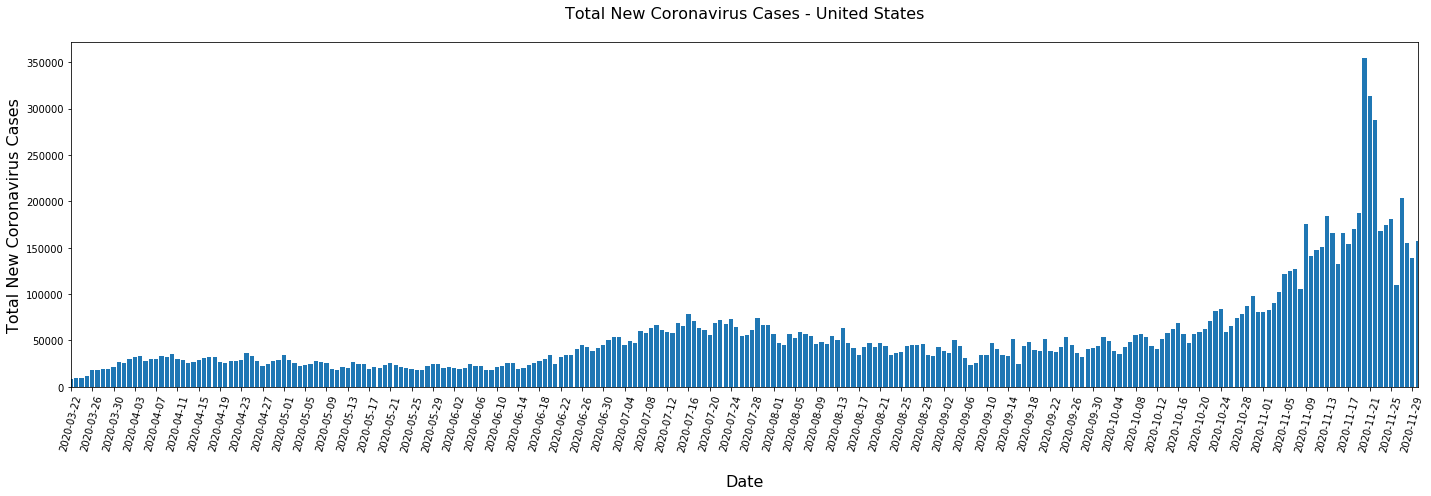

In [13]:
# Create a dataframe to show the trend of total US coronavirus cases by date
tot_us_cases_trend_df = covid_state_df.reset_index().set_index('Date')
tot_cases_gb = tot_us_cases_trend_df.groupby('Date')
tot_us_cases_trend_df = tot_cases_gb[['Total Cases', 'New Cases', 'Total Deaths', 'New Deaths']].sum()
#Export dataframe to .csv file
tot_us_cases_trend_df.to_csv('Resources/tot_us_cases_trend_df.csv')

# Plot the new cases US data as a bar chart
fig, ax = plt.subplots(figsize=(20, 7))
ax.bar(tot_us_cases_trend_df.index.values, tot_us_cases_trend_df['New Cases'])
max_date = tot_us_cases_trend_df.index.max()
ax.set_xlim(['2020-03-22',max_date])

# Set the x axis labels to show every 6th day
ax.set_xticks(ax.get_xticks()[::4])
plt.xticks(rotation=75)

# Set the plot titles and labels
# plt.grid(True)
plt.title('Total New Coronavirus Cases - United States\n', fontsize=16)
plt.xlabel('\nDate', fontsize=16)
plt.ylabel('Total New Coronavirus Cases', fontsize=16)
plt.tight_layout()

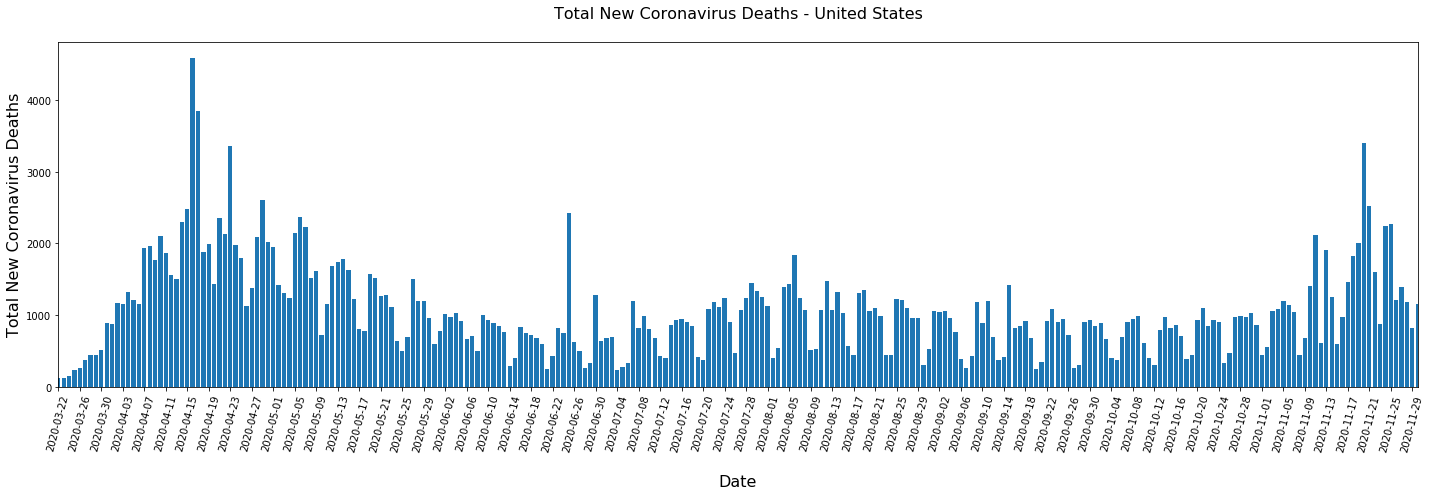

In [14]:
# Plot the new deaths US data as a bar chart
fig, ax = plt.subplots(figsize=(20, 7))
ax.bar(tot_us_cases_trend_df.index.values, tot_us_cases_trend_df['New Deaths'])
max_date = tot_us_cases_trend_df.index.max()
ax.set_xlim(['2020-03-22',max_date])

# Set the x axis labels to show every 6th day
ax.set_xticks(ax.get_xticks()[::4])
plt.xticks(rotation=75)

# Set the plot titles and labels
# plt.grid(True)
plt.title('Total New Coronavirus Deaths - United States\n', fontsize=16)
plt.xlabel('\nDate', fontsize=16)
plt.ylabel('Total New Coronavirus Deaths', fontsize=16)
plt.tight_layout()

### Total New Cases and New Deaths in The United States

In [15]:
state_group = covid_state_df.groupby('State')
covid_state_df=covid_state_df.sort_values(by='Date', ascending=False)
last_state_date_df = state_group.last()

# Show the total cases in the US
total_us_cases = last_state_date_df['Total Cases'].sum()
new_us_cases = last_state_date_df['New Cases'].sum()
total_us_deaths = last_state_date_df['Total Deaths'].sum()
new_us_deaths = last_state_date_df['New Deaths'].sum()
date = last_state_date_df['Date'].max()

print(f'Coronavirus stats for The United States as of: {date}')
print("\n"f'Total US Cases: {total_us_cases:,}')
print(f'Total New US Cases: {new_us_cases:,}')
print(f'Total US Deaths: {total_us_deaths:,}')
print(f'Total New US Deaths: {new_us_deaths:,}')

Coronavirus stats for The United States as of: 2020-11-30

Total US Cases: 13,480,022
Total New US Cases: 156,973
Total US Deaths: 266,799
Total New US Deaths: 1,160


### Seven Day Average of New Cases and New Deaths in The United States

In [16]:
us_avg = covid_state_df.reset_index()[['Date', 'New Cases', 'New Deaths']]
us_avg = us_avg.sort_values('Date', ascending=False)
us_avg_gb = us_avg.groupby('Date')
us_avg = us_avg_gb[['Date', 'New Cases', 'New Deaths']].sum()
us_avg = us_avg.sort_index(ascending=False)
us_avg = us_avg.reset_index().head(7)
date = us_avg['Date'].max()

us_avg_new_cases = round(us_avg['New Cases'].mean(),0)
us_avg_new_deaths = round(us_avg['New Deaths'].mean(),0)
print(f'7 Day average as of {date}:\n')
print(f'The seven day average for New Cases in the United States: {us_avg_new_cases:,}')
print(f'The seven day average for New Deaths in the United States: {us_avg_new_deaths:,}')

7 Day average as of 2020-11-30:

The seven day average for New Cases in the United States: 160,057.0
The seven day average for New Deaths in the United States: 1,470.0


### Top 10 States With the Most New Coronavirus Cases

In [17]:
# Show the top 5 states having the most coronavirus cases
last_state_date_df.sort_values(by=['Date', 'New Cases'], ascending=[False,False], inplace=True)
last_state_date_df.head(10)

,Total Cases,New Cases,Total Deaths,New Deaths,Fatality Rate,Latitude,Longitude,Date
State,,,,,,,,
California,1230264,14809,19173,22,0.0156,36.1162,-119.6816,2020-11-30
Texas,1238752,13634,21896,53,0.0177,31.0545,-97.5635,2020-11-30
Michigan,388942,10790,9564,97,0.0246,43.3266,-84.5361,2020-11-30
Tennessee,374493,7975,4602,48,0.0123,35.7478,-86.6923,2020-11-30
New York,647980,6819,34605,44,0.0534,42.1657,-74.9481,2020-11-30
Florida,999319,6659,18597,97,0.0186,27.7663,-81.6868,2020-11-30
Ohio,421063,6631,6429,30,0.0153,40.3888,-82.7649,2020-11-30
Illinois,726304,6190,12985,103,0.0179,40.3495,-88.9861,2020-11-30
Pennsylvania,366835,5891,10335,38,0.0282,40.5908,-77.2098,2020-11-30


### Total Cases by County Heatmap

In [18]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

In [19]:
# Store Lat and lng into locations
locations = map_county_df[['Latitude', "Longitude"]].astype(float)
total_cases=map_county_df['Total Cases'].astype(float)

In [20]:
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=total_cases,
                                 dissipating=False, max_intensity=.85,
                                 point_radius=3)                           
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

### Total Coronavirus cases in California

In [21]:
cal_plots_df=state_plots_df[['State', 'Total Cases']]
mask1 = cal_plots_df['State']=='California'
mask2 = cal_plots_df['State'] == 'Indiana'

cal_plots_df = cal_plots_df[mask1]

Text(0, 0.5, 'Total Covid Cases')

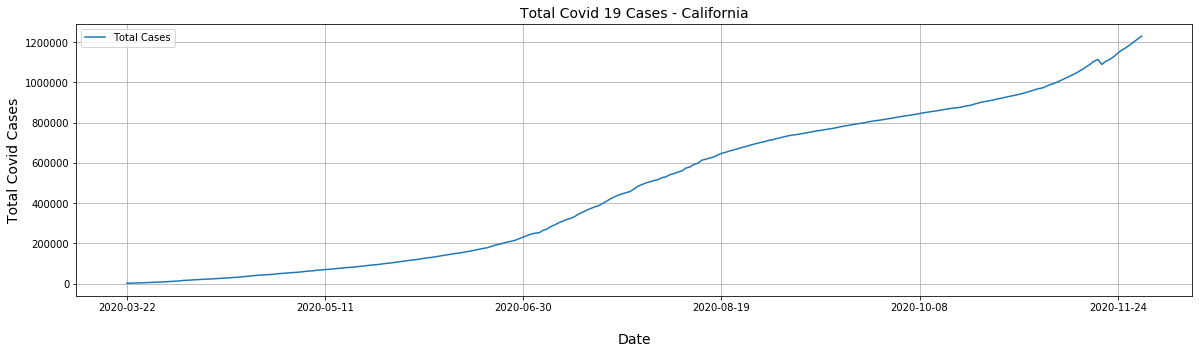

In [22]:
cal_plots_df.plot.line( y='Total Cases', figsize=(20,5), grid=True)

plt.title("Total Covid 19 Cases - California", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('Total Covid Cases', fontsize=14)

In [23]:
tot_cases_today = last_state_date_df.loc['California']['Total Cases']
date = last_state_date_df.loc['California']['Date']
print(f'Total number of coronavirus cases reported as of {date}: {tot_cases_today:,}')

Total number of coronavirus cases reported as of 2020-11-30: 1,230,264


### Plot New Coronavirus cases in California

In [24]:
cal_plots_df=state_plots_df[['State', 'New Cases']]
mask1 = cal_plots_df['State']=='California'

cal_plots_df = cal_plots_df[mask1]

Text(0, 0.5, 'New Covid Cases')

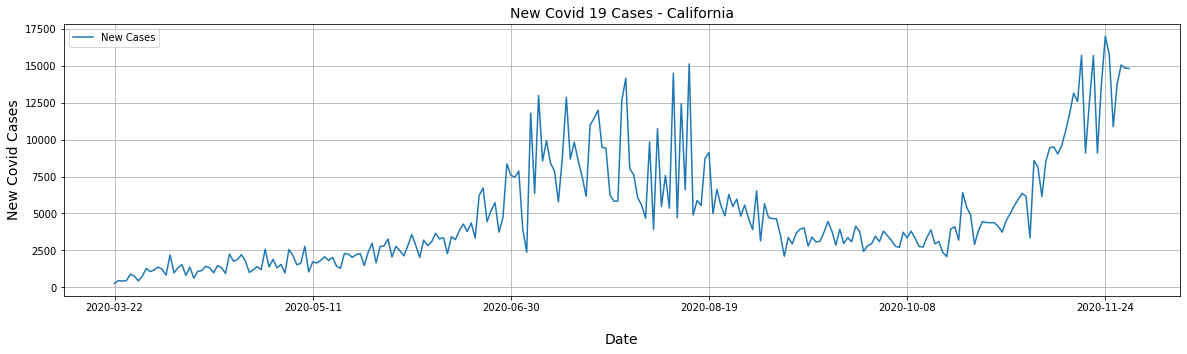

In [25]:
cal_plots_df.plot.line( y='New Cases', figsize=(20,5), grid=True)

# Label plot
plt.title("New Covid 19 Cases - California", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('New Covid Cases', fontsize=14)

In [26]:
new_cases_today = last_state_date_df.loc['California']['New Cases']
date = last_state_date_df.loc['California']['Date']
print(f'Total number of new coronavirus cases reported on {date}: {new_cases_today:,}')

Total number of new coronavirus cases reported on 2020-11-30: 14,809


### Plot Total Coronavirus Deaths in California

In [27]:
cal_plots_df=state_plots_df[['State', 'Total Deaths']]
mask1 = cal_plots_df['State']=='California'

cal_plots_df = cal_plots_df[mask1]

Text(0, 0.5, 'Total Covid Deaths')

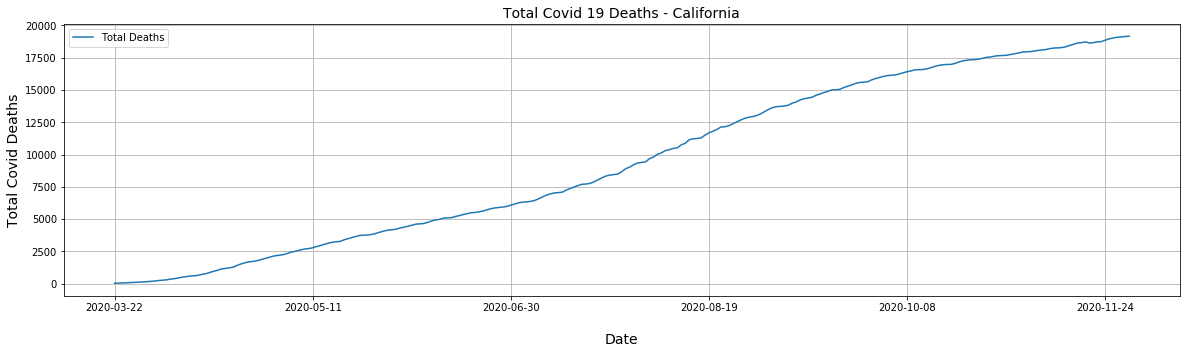

In [28]:
cal_plots_df.plot.line( y='Total Deaths', figsize=(20,5), grid=True)

# Label plot
plt.title("Total Covid 19 Deaths - California", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('Total Covid Deaths', fontsize=14)

In [29]:
tot_deaths = last_state_date_df.loc['California']['Total Deaths']
date = last_state_date_df.loc['California']['Date']
print(f'Total number of coronavirus deaths as of {date}: {tot_deaths:,}')

Total number of coronavirus deaths as of 2020-11-30: 19,173


### Plot New Coronavirus Deaths in California

In [30]:
cal_plots_df=state_plots_df[['State', 'New Deaths']]
mask1 = cal_plots_df['State']=='California'

cal_plots_df = cal_plots_df[mask1]

Text(0, 0.5, 'New Covid Deaths')

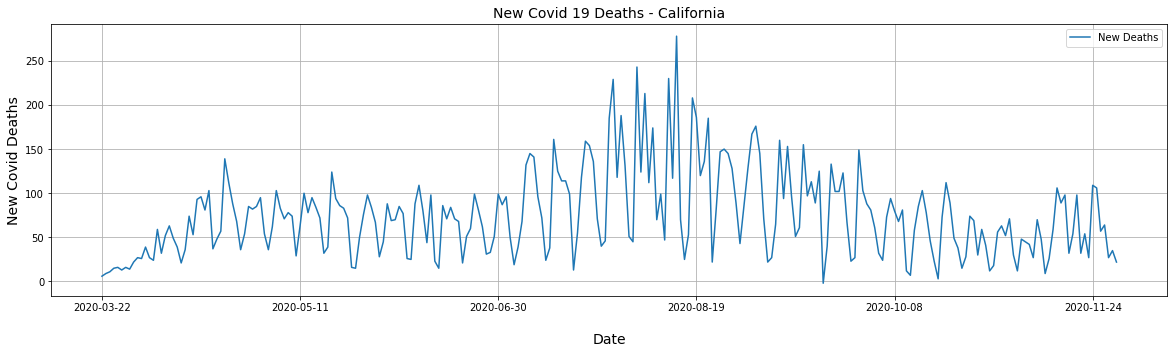

In [31]:
cal_plots_df.plot.line( y='New Deaths', figsize=(20,5), grid=True)

# Label plot
plt.title("New Covid 19 Deaths - California", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('New Covid Deaths', fontsize=14)

In [32]:
new_deaths = last_state_date_df.loc['California']['New Deaths']
date = last_state_date_df.loc['California']['Date']
print(f'Total number of new coronavirus deaths reported on {date}: {new_deaths:,}')

Total number of new coronavirus deaths reported on 2020-11-30: 22


### Seven Day Average of New Cases and New Deaths in California

In [33]:
my_idx = covid_state_df.index.name
avg_sev_ca_df = covid_state_df.sort_values(by=[my_idx, 'Date'], ascending = [True, False])
avg_seven_ca_df = avg_sev_ca_df.loc['California'].head(7)
ca_date = avg_seven_ca_df['Date'].max()

avg_seven_ca_df = avg_seven_ca_df[['New Cases', 'New Deaths']].mean()
avg_seven_ca_df = pd.DataFrame(avg_seven_ca_df)

new_cases_avg = round(avg_seven_ca_df.loc['New Cases'][0],0)
new_deaths_avg = round(avg_seven_ca_df.loc['New Deaths'][0],0)
print(f'7 day avg as of: {ca_date}\n')
print(f'The 7 day average of New Cases in CA is {new_cases_avg:,}')
print(f'The 7 day average of New Deaths in CA is {new_deaths_avg:,}')

7 day avg as of: 2020-11-30

The 7 day average of New Cases in CA is 14,578.0
The 7 day average of New Deaths in CA is 60.0


### Total Coronavirus Cases - Los Angeles County, CA

In [34]:
# Create a dataframe based on county information
covid_county_df.sort_values(by='Date', ascending=False, inplace=True)
county_group = covid_county_df.groupby(['State', 'County'])
covid_county_last_df = county_group.first()
covid_county_last_df.sort_values(by=['State', 'New Cases'], ascending=[False, False], inplace=True)

# Show the total coronavirus cases by county in California
california_cases_by_county_df = covid_county_last_df.loc['California']
california_cases_by_county_df

,Total Cases,New Cases,Total Deaths,New Deaths,Date,Latitude,Longitude
County,,,,,,,
Los Angeles,400919,5076,7655,16,2020-11-30,34.308284,-118.228241
San Diego,82043,959,997,0,2020-11-30,33.034846,-116.736533
Santa Clara,35085,793,476,0,2020-11-30,37.231049,-121.697046
Orange,78553,734,1577,0,2020-11-30,33.701475,-117.764600
San Bernardino,93671,652,1129,0,2020-11-30,34.840603,-116.177469
Riverside,87383,529,1437,0,2020-11-30,33.743150,-115.993358
Sacramento,37415,510,576,0,2020-11-30,38.451068,-121.342537
Kern,41827,499,448,0,2020-11-30,35.343294,-118.727780
Stanislaus,22162,448,426,2,2020-11-30,37.558625,-120.997072


### Plot Total Coronavirus Cases in Los Angeles County, CA

Text(0, 0.5, 'Total Coronavirus Cases')

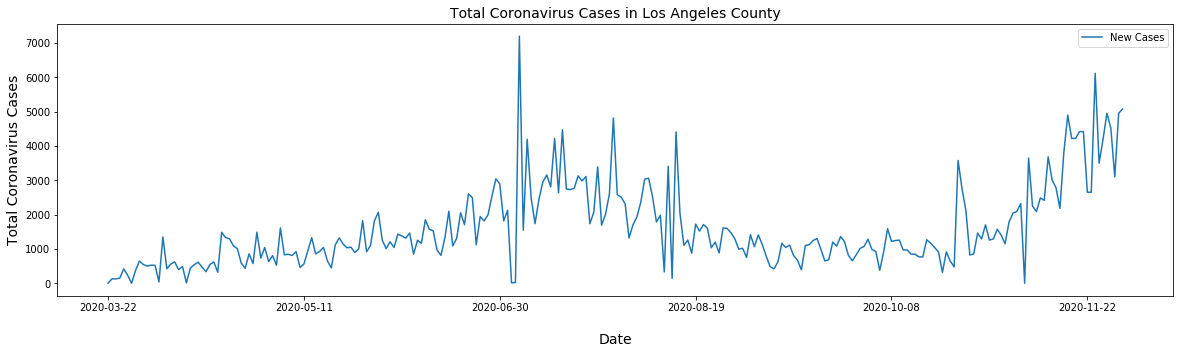

In [35]:
# Plot the number of cases for LA County
la_county_df = covid_county_df.loc['California'][['County','New Cases','Date']]
mask1 = la_county_df['County']=='Los Angeles'
la_county_df=la_county_df[mask1]
la_county_df.sort_values(by='Date', inplace=True)

la_county_df.plot(kind='line', x='Date', y='New Cases', figsize=(20,5))
plt.title("Total Coronavirus Cases in Los Angeles County", fontsize=14)
plt.xlabel("\nDate", fontsize=14)
plt.ylabel("Total Coronavirus Cases", fontsize=14)

In [36]:
new_cases_df = la_county_df.sort_values(by='Date', ascending=False).head(1)
new_cases = new_cases_df.loc['California']['New Cases']
date = new_cases_df.loc['California']['Date']
tot_cases = california_cases_by_county_df.loc['Los Angeles']['Total Cases']
print(f'There were {new_cases:,} new cases reported for a total of {tot_cases:,} cases on {date} in LA County, CA.')

There were 5,076 new cases reported for a total of 400,919 cases on 2020-11-30 in LA County, CA.


### Seven Day Average of New Cases and New Deaths in Los Angeles County, CA

In [37]:
la_avg_df = covid_county_df.loc['California']
map_county = la_avg_df['County'] == 'Los Angeles'
la_avg_df = la_avg_df[map_county].reset_index().set_index('County').sort_values(by='Date', ascending=False).head(7)
lac_date = la_avg_df['Date'].max()

la_avg_df = la_avg_df[['New Cases', 'New Deaths']].mean()
la_avg_df = pd.DataFrame(la_avg_df)

la_new_cases_avg = round(la_avg_df.loc['New Cases'][0],0)
la_new_deaths_avg = round(la_avg_df.loc['New Deaths'][0],0)

print(f'7 Day Average as of: {lac_date}\n')
print(f'The 7 day average of New Cases in Los Angeles County, CA: {la_new_cases_avg:,}')
print(f'The 7 day average of New Deaths in Los Angeles County, CA: {la_new_deaths_avg:,}')

7 Day Average as of: 2020-11-30

The 7 day average of New Cases in Los Angeles County, CA: 4,326.0
The 7 day average of New Deaths in Los Angeles County, CA: 30.0


### Total Coronavirus cases in Indiana

In [38]:
ind_plots_df=state_plots_df[['State', 'Total Cases']]
mask1 = ind_plots_df['State'] == 'Indiana'

ind_plots_df = ind_plots_df[mask1]

Text(0, 0.5, 'Total Covid Cases')

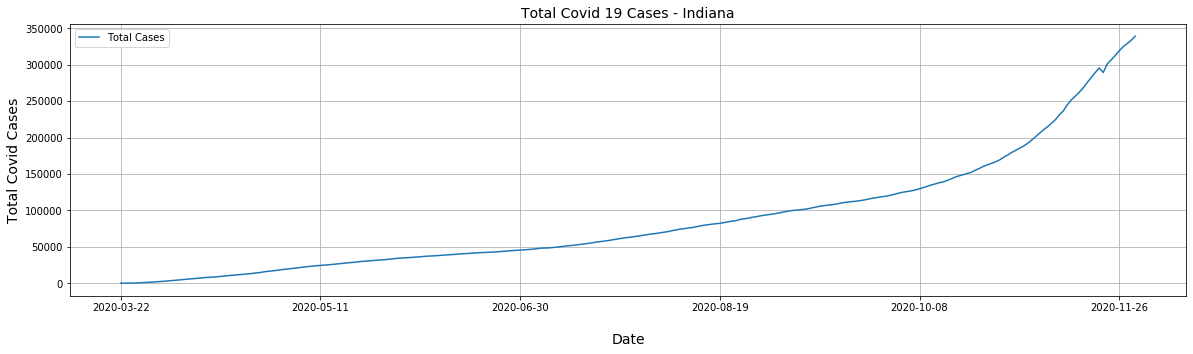

In [39]:
ind_plots_df.plot.line( y='Total Cases', figsize=(20,5), grid=True)

# Label plot
plt.title("Total Covid 19 Cases - Indiana", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('Total Covid Cases', fontsize=14)

In [40]:
tot_cases_today = last_state_date_df.loc['Indiana']['Total Cases']
date = last_state_date_df.loc['Indiana']['Date']
print(f'Total number of coronavirus cases reported as of {date}: {tot_cases_today:,}')

Total number of coronavirus cases reported as of 2020-11-30: 338,977


### Plot New Coronavirus cases in Indiana

In [41]:
ind_plots_df=state_plots_df[['State', 'New Cases']]
mask1 = ind_plots_df['State'] == 'Indiana'

ind_plots_df = ind_plots_df[mask1]

Text(0, 0.5, 'New Covid Cases')

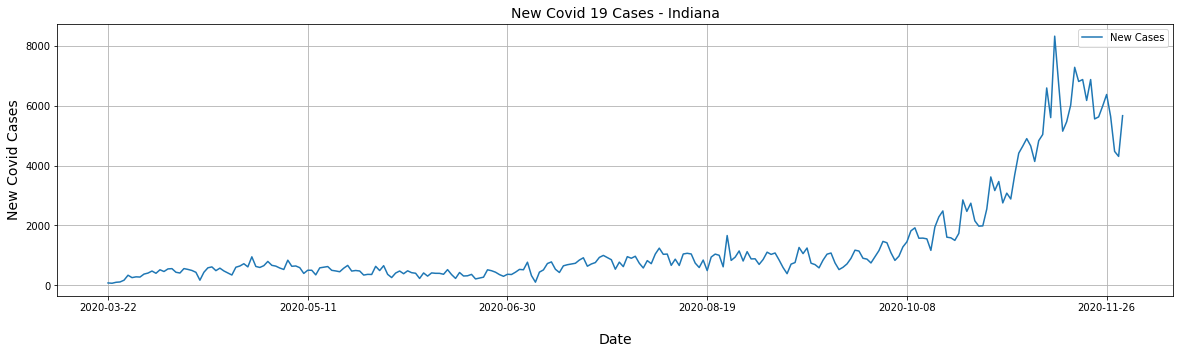

In [42]:
ind_plots_df.plot.line( y='New Cases', figsize=(20,5), grid=True)

# Label plot
plt.title("New Covid 19 Cases - Indiana", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('New Covid Cases', fontsize=14)

In [43]:
new_cases_today = last_state_date_df.loc['Indiana']['New Cases']
date = last_state_date_df.loc['Indiana']['Date']
print(f'Total number of new coronavirus cases reported on {date}: {new_cases_today:,}')

Total number of new coronavirus cases reported on 2020-11-30: 5,665


### Plot Total Coronavirus Deaths in Indiana

In [44]:
ind_plots_df=state_plots_df[['State', 'Total Deaths']]
mask1 = ind_plots_df['State'] == 'Indiana'

ind_plots_df = ind_plots_df[mask1]

Text(0, 0.5, 'Total Covid Deaths')

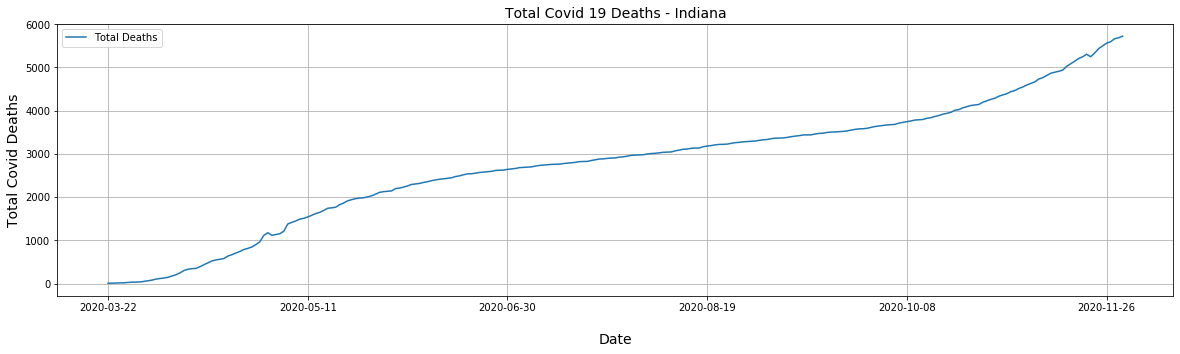

In [45]:
ind_plots_df.plot.line( y='Total Deaths', figsize=(20,5), grid=True)

# Label plot
plt.title("Total Covid 19 Deaths - Indiana", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('Total Covid Deaths', fontsize=14)

In [46]:
tot_deaths = last_state_date_df.loc['Indiana']['Total Deaths']
date = last_state_date_df.loc['Indiana']['Date']
print(f'Total number of coronavirus deaths as of {date}: {tot_deaths:,}')

Total number of coronavirus deaths as of 2020-11-30: 5,723


### Plot New Coronavirus Deaths in Indiana

In [47]:
ind_plots_df=state_plots_df[['State', 'New Deaths']]
mask1 = ind_plots_df['State'] == 'Indiana'

ind_plots_df = ind_plots_df[mask1]

Text(0, 0.5, 'New Covid Deaths')

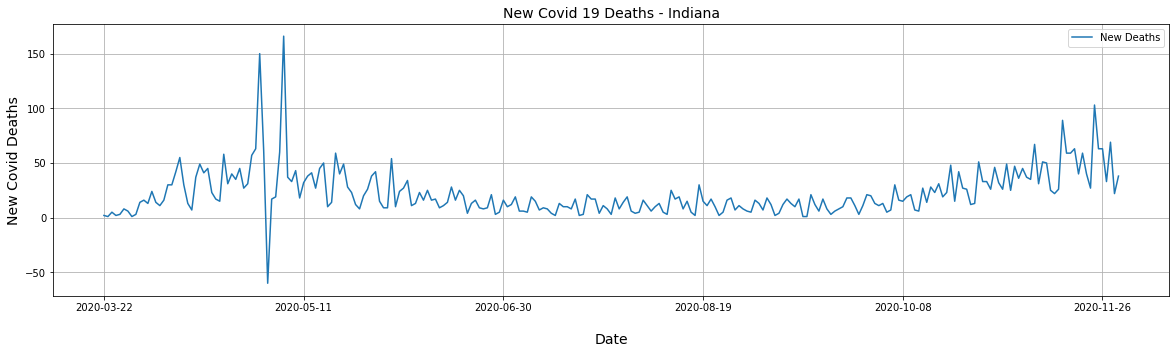

In [48]:
ind_plots_df.plot.line( y='New Deaths', figsize=(20,5), grid=True)

# Label plot
plt.title("New Covid 19 Deaths - Indiana", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('New Covid Deaths', fontsize=14)

In [49]:
new_deaths = last_state_date_df.loc['Indiana']['New Deaths']
date = last_state_date_df.loc['Indiana']['Date']
print(f'Total number of new coronavirus deaths reported on {date}: {new_deaths:,}')

Total number of new coronavirus deaths reported on 2020-11-30: 38


### Seven Day Average of New Cases and New Deaths in Indiana

In [50]:
my_idx = covid_state_df.index.name
avg_sev_in_df = covid_state_df.sort_values(by=[my_idx, 'Date'], ascending = [True, False])
avg_seven_in_df = avg_sev_in_df.loc['Indiana'].head(7)
in_date = avg_seven_in_df['Date'].max()

avg_seven_in_df = avg_seven_in_df[['New Cases', 'New Deaths']].mean()
avg_seven_in_df = pd.DataFrame(avg_seven_in_df)
# avg_seven_ca_df

new_cases_avg = round(avg_seven_in_df.loc['New Cases'][0],0)
new_deaths_avg = round(avg_seven_in_df.loc['New Deaths'][0],0)
print(f'7 day avg as of: {in_date}\n')
print(f'The 7 day average of New Cases in IN is {new_cases_avg:,}')
print(f'The 7 day average of New Deaths in IN is {new_deaths_avg:,}')

7 day avg as of: 2020-11-30

The 7 day average of New Cases in IN is 5,438.0
The 7 day average of New Deaths in IN is 56.0


### Coronavirus in Fulton County, IN

In [62]:
# Show the total coronavirus cases by county in Indiana
indiana_cases_by_county_df = covid_county_last_df.loc['Indiana']
indiana_cases_by_county_df

,Total Cases,New Cases,Total Deaths,New Deaths,Date,Latitude,Longitude
County,,,,,,,
Marion,46131,760,870,5,2020-11-30,39.781636,-86.138263
Lake,29183,461,469,0,2020-11-30,41.418743,-87.382776
Hamilton,14364,303,172,1,2020-11-30,40.073065,-86.052447
Tippecanoe,9481,279,30,0,2020-11-30,40.388727,-86.894140
Vanderburgh,10546,266,128,1,2020-11-30,38.026588,-87.587631
...,...,...,...,...,...,...,...
Martin,386,4,6,0,2020-11-30,38.709992,-86.803732
Crawford,325,3,1,0,2020-11-30,38.288144,-86.445188
Ohio,245,2,7,0,2020-11-30,38.955305,-84.965160


### Plot Total Coronavirus Cases in Fulton County, IN

Text(0, 0.5, 'Total New Coronavirus Cases')

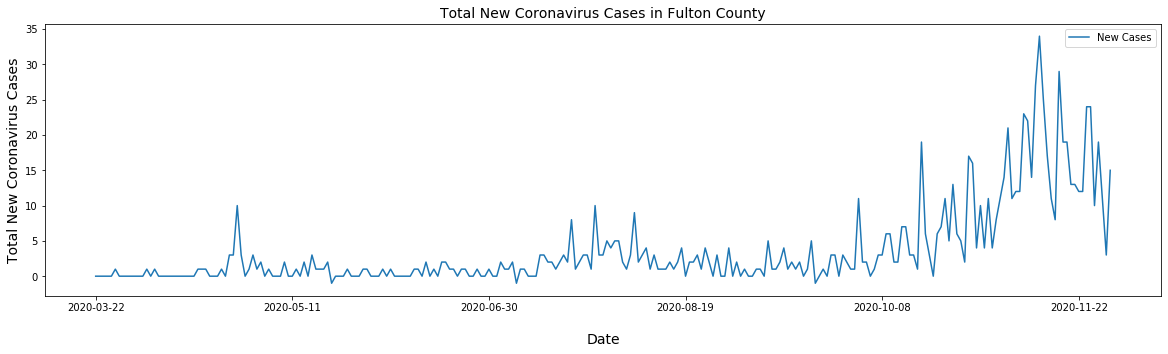

In [52]:
# Plot the number of cases for Fulton County
fulton_county_df = covid_county_df.loc['Indiana'][['County','New Cases','Date']]
mask1 = fulton_county_df['County']=='Fulton'
fulton_county_df=fulton_county_df[mask1]
fulton_county_df.sort_values(by='Date', inplace=True)

fulton_county_df.plot(kind='line', x='Date', y='New Cases', figsize=(20,5))
plt.title("Total New Coronavirus Cases in Fulton County", fontsize=14)
plt.xlabel("\nDate", fontsize=14)
plt.ylabel("Total New Coronavirus Cases", fontsize=14)

In [53]:
new_cases_df = fulton_county_df.sort_values(by='Date', ascending=False).head(1)
new_cases = new_cases_df.loc['Indiana']['New Cases']
date = new_cases_df.loc['Indiana']['Date']
tot_cases = indiana_cases_by_county_df.loc['Fulton']['Total Cases']
print(f'There were {new_cases:,} new cases reported for a total of {tot_cases} cases on {date} in Fulton County, IN.')

There were 15 new cases reported for a total of 901 cases on 2020-11-30 in Fulton County, IN.


### Seven Day Average of New Cases and New Deaths in Fulton County, IN

In [54]:
fc_avg_df = covid_county_df.loc['Indiana']
map_county = fc_avg_df['County'] == 'Fulton'
fc_avg_df = fc_avg_df[map_county].reset_index().set_index('County').sort_values(by='Date', ascending=False).head(7)
fc_date = fc_avg_df['Date'].max()

fc_avg_df = fc_avg_df[['New Cases', 'New Deaths']].mean()
fc_avg_df = pd.DataFrame(fc_avg_df)

fc_new_cases_avg = round(fc_avg_df.loc['New Cases'][0],0)
fc_new_deaths_avg = round(fc_avg_df.loc['New Deaths'][0],2)
print(f'7 day average as of: {fc_date}\n')
print(f'The 7 day average of New Cases in Fulton County, IN is {fc_new_cases_avg:,}')
print(f'The 7 day average of New Deaths in Fulton County, IN is {fc_new_deaths_avg:,}')

7 day average as of: 2020-11-30

The 7 day average of New Cases in Fulton County, IN is 15.0
The 7 day average of New Deaths in Fulton County, IN is 0.29


### New Covid Case Data for Santa Clarita Valley, CA

In [55]:
scv_data_path=('Resources/Covid_19_Santa_Clarita_Valley.xlsx')
scv_covid_df = pd.read_excel(scv_data_path)
scv_covid_df.set_index('Date', inplace = True)

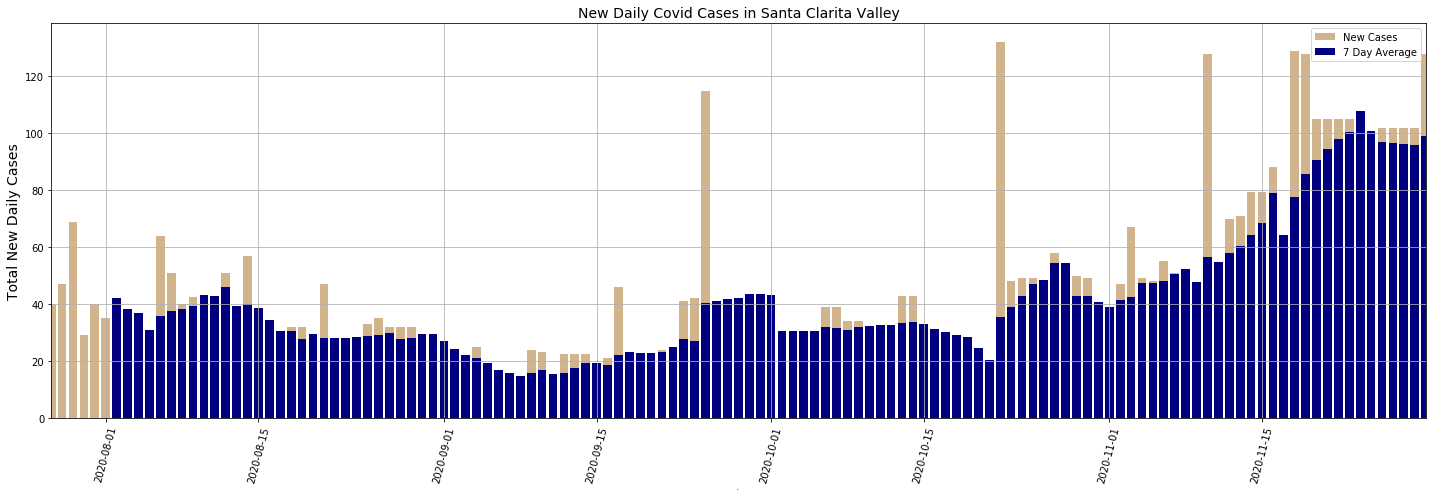

In [56]:
# import the Santa Clarita data into a line chart

# Plot the new cases SCV as a bar chart
fig, ax = plt.subplots(figsize=(20, 7))
ax.bar(scv_covid_df.index.values, scv_covid_df['New Cases'], color='tan')
ax.bar(scv_covid_df.index.values, scv_covid_df['7 Day Average'], color='navy')
min_date = scv_covid_df.index.min()
max_date = scv_covid_df.index.max()
ax.set_xlim([min_date,max_date])
ax.legend(['New Cases', '7 Day Average'], loc='best')
ax.grid(True)

# Set the x axis labels to show every 6th day
ax.set_xticks(ax.get_xticks()[::1])
plt.xticks(rotation=75)

# ax.set_xticklabels('date_list')

plt.title('New Daily Covid Cases in Santa Clarita Valley', fontsize=14)
plt.xlabel('Date', fontsize=1)
plt.ylabel('Total New Daily Cases', fontsize=14)
plt.tight_layout()

In [57]:
scv_covid_df = scv_covid_df.sort_index(ascending=False)
scv_covid_avg_df = scv_covid_df.head(7)
date_val = scv_covid_df.index.max().date()
date_val = (f'{date_val.year}-{date_val.month}-{date_val.day}')

tot_cases = scv_covid_avg_df.loc[date_val]['Total Cases'][0]
new_cases = scv_covid_avg_df.loc[date_val]['New Cases'][0]
avg_cases = round(scv_covid_avg_df['New Cases'].mean(),0)

print(f'Covid data in Santa Clarita Valley as of: {date_val}:\n')
print(f'Total covid cases in Santa Clarita Valley: {tot_cases}')
print(f'New covid cases in Santa Clarita Valley: {new_cases}')
print(f'Seven day average of new covid cases in Santa Clarita Valley: {avg_cases}')

Covid data in Santa Clarita Valley as of: 2020-11-30:

Total covid cases in Santa Clarita Valley: 9572.0
New covid cases in Santa Clarita Valley: 128.0
Seven day average of new covid cases in Santa Clarita Valley: 99.0


# Adhoc County Analysis

Text(0, 0.5, 'Total Coronavirus Cases')

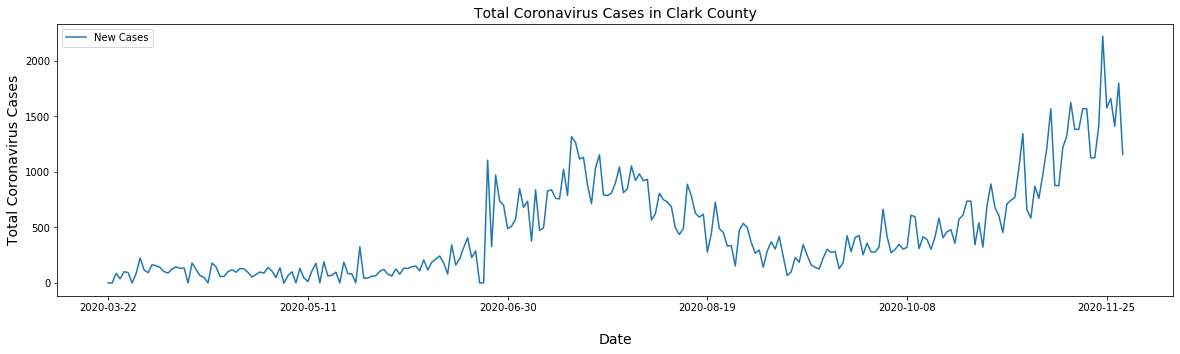

In [58]:
# Plot the number of cases for Clark County
la_county_df = covid_county_df.loc['Nevada'][['County','New Cases','Date']]
mask1 = la_county_df['County']=='Clark'
la_county_df=la_county_df[mask1]
la_county_df.sort_values(by='Date', inplace=True)

la_county_df.plot(kind='line', x='Date', y='New Cases', figsize=(20,5))
plt.title("Total Coronavirus Cases in Clark County", fontsize=14)
plt.xlabel("\nDate", fontsize=14)
plt.ylabel("Total Coronavirus Cases", fontsize=14)

### Seven Day Average of New Cases and New Deaths in Clark County, NV

In [59]:
cc_avg_df = covid_county_df.loc['Nevada']
map_county = cc_avg_df['County'] == 'Clark'
cc_avg_df = cc_avg_df[map_county].reset_index().set_index('County').sort_values(by='Date', ascending=False).head(7)
cc_date = cc_avg_df['Date'].max()

cc_avg_df = cc_avg_df[['New Cases', 'New Deaths']].mean()
cc_avg_df = pd.DataFrame(cc_avg_df)

cc_new_cases_avg = round(cc_avg_df.loc['New Cases'][0],0)
cc_new_deaths_avg = round(cc_avg_df.loc['New Deaths'][0],2)
print(f'7 day average as of: {cc_date}\n')
print(f'The 7 day average of New Cases in Clark County, NV is {cc_new_cases_avg:,}')
print(f'The 7 day average of New Deaths in Clark County, NV is {cc_new_deaths_avg:,}')

7 day average as of: 2020-11-30

The 7 day average of New Cases in Clark County, NV is 1,603.0
The 7 day average of New Deaths in Clark County, NV is 9.29


### Plot Coronavirus Cases in Mohave County, AZ

Text(0, 0.5, 'Total New Coronavirus Cases')

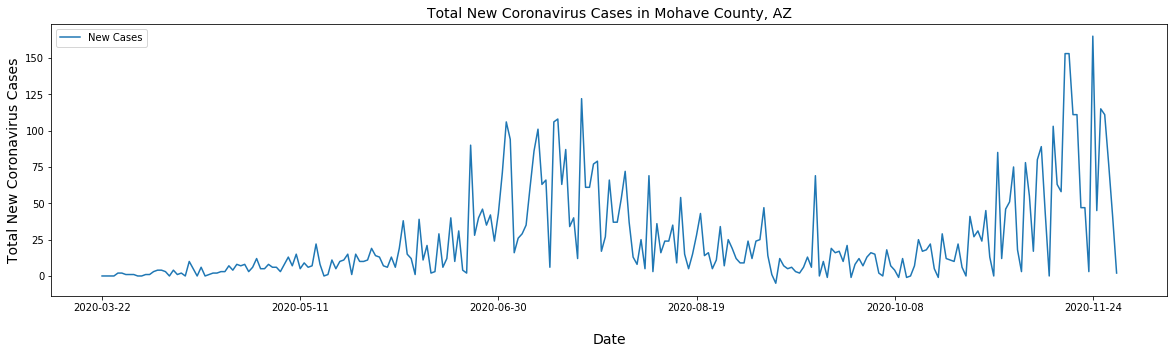

In [60]:
# Plot the number of cases for Mohave County
mohave_county_df = covid_county_df.loc['Arizona'][['County','New Cases','Date']]
mask1 = mohave_county_df['County']=='Mohave'
mohave_county_df=mohave_county_df[mask1]
mohave_county_df.sort_values(by='Date', inplace=True)

mohave_county_df.plot(kind='line', x='Date', y='New Cases', figsize=(20,5))
plt.title("Total New Coronavirus Cases in Mohave County, AZ", fontsize=14)
plt.xlabel("\nDate", fontsize=14)
plt.ylabel("Total New Coronavirus Cases", fontsize=14)

### Seven Day Average of New Cases and New Deaths in Mohave County, AZ

In [61]:
mc_avg_df = covid_county_df.loc['Arizona']
map_county = mc_avg_df['County'] == 'Mohave'
mc_avg_df = mc_avg_df[map_county].reset_index().set_index('County').sort_values(by='Date', ascending=False).head(7)
mc_date = mc_avg_df['Date'].max()

mc_avg_df = mc_avg_df[['New Cases', 'New Deaths']].mean()
mc_avg_df = pd.DataFrame(mc_avg_df)

mc_new_cases_avg = round(mc_avg_df.loc['New Cases'][0],0)
mc_new_deaths_avg = round(mc_avg_df.loc['New Deaths'][0],2)
print(f'7 day average as of: {mc_date}\n')
print(f'The 7 day average of New Cases in Mohave County, AZ is {mc_new_cases_avg:,}')
print(f'The 7 day average of New Deaths in Mohave County, AZ is {mc_new_deaths_avg:,}')

7 day average as of: 2020-11-30

The 7 day average of New Cases in Mohave County, AZ is 79.0
The 7 day average of New Deaths in Mohave County, AZ is 1.29
